<a href="https://colab.research.google.com/github/mishra-shriya/mishra-shriya-DataScience-GenAI-Submissions/blob/main/Mock_Assignments/EDAMock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we're going to load the data into a dataframe. We will be using GenAI to accomplish this task efficiently. We will use the prompt "Please load the EDA-DP.csv data file into a dataframe".

In [ ]:
import pandas as pd
df = pd.read_csv('EDA-DP.csv')
print(df.head())

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location company_size  
0               US            M  
1           

First, we noticed that there are two columns "salary" and "salary_in_usd". We will first find out how many salaries are not in USD - to do this, we will use GenAI with the prompt "please output the number of cells with "salary_currency" != USD". We will be doing this instead of comparing "salary" to "salary_usd" in case the Exchange rate is 1:1.

In [ ]:
non_usd_salaries = df[df['salary_currency'] != 'USD']
num_non_usd = len(non_usd_salaries)
print(f"Number of salaries not in USD: {num_non_usd}")

Number of salaries not in USD: 1240


Now we are going to find out the number of currencies in this data sets. we are doing this because we want to know if this data is baised towards one income currency group. Gen Ai promt = "Please make a bar chart using the data from salary_currency. Where the X axis is the type of currency and the Y Axis is the number of times it appears in the dataframe."

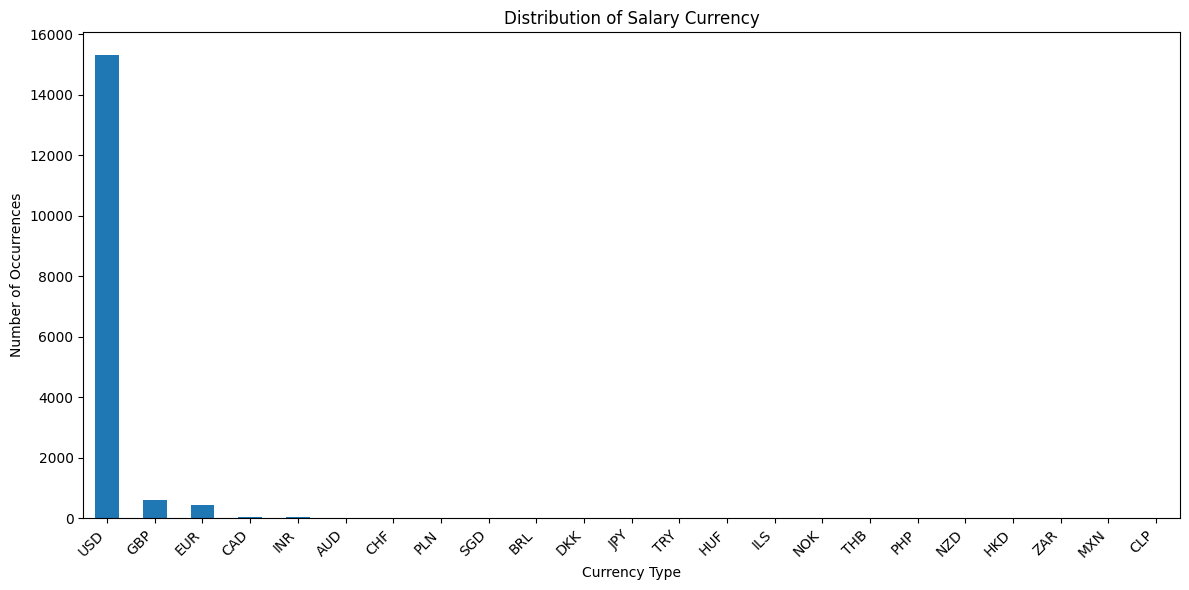

In [ ]:
import matplotlib.pyplot as plt

currency_counts = df['salary_currency'].value_counts()

plt.figure(figsize=(12, 6))
currency_counts.plot(kind='bar')
plt.title('Distribution of Salary Currency')
plt.xlabel('Currency Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Because we aqre both from india we got curious to knnow the incomes there so just for a little curiosity break we will be asking gen Ai to make a table on just indian salaries using the prompt "please display the data for only IND salaries and make a table"

In [ ]:
ind_salaries_df = df[df['salary_currency'] == 'INR']
print(ind_salaries_df.to_string())

       work_year experience_level employment_type                           job_title   salary salary_currency  salary_in_usd employee_residence  remote_ratio company_location company_size
885         2024               SE              FL             Manager Data Management  3000000             INR          36014                 IN           100               IN            S
1547        2024               SE              FT                      Data Scientist  4000000             INR          48019                 IN           100               IN            L
2401        2024               MI              FT                   Big Data Engineer  2300000             INR          27611                 IN           100               IN            L
5225        2024               MI              FT                   Lead Data Analyst  3300000             INR          39615                 IN            50               IN            L
8447        2023               EN              FT      

Now that our curiousty is satiated, we will find out how many of the USD salaries are actually located in the US, since we very clearly have a bias towards this currency type. If they are all located within the US, we could potentially ignore the other currencies as they are a very small percentage of the dataset, because we want to model which engineering type in the US is the most financially successful. We will be using GenAI and the prompt "Please count the number of cells with salary_currency == USD and employee_residence == US, and also output the total number of cells with salary_currency == USD".

In [ ]:
usd_salaries_in_us = df[(df['salary_currency'] == 'USD') & (df['employee_residence'] == 'US')]
num_usd_in_us = len(usd_salaries_in_us)

total_usd_salaries = df[df['salary_currency'] == 'USD']
num_total_usd = len(total_usd_salaries)

print(f"Number of salaries with currency USD and employee residence US: {num_usd_in_us}")
print(f"Total number of salaries with currency USD: {num_total_usd}")

Number of salaries with currency USD and employee residence US: 14449
Total number of salaries with currency USD: 15294


We can calearly see that the data is baised towards USC currency type and we are going to choose to ignore all the people with USD outside of US since we will be unable to accomodate for PPP (Purchasing Power Parity). To clean the data we will use gen ai prompt "please remove all the data excluing the people with salary_currency ==USD AND Employee_residence == US and output this cleaned data frame"

In [ ]:
df_cleaned = df[(df['salary_currency'] == 'USD') & (df['employee_residence'] == 'US')]
print(df_cleaned.head())

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location company_size  
0               US            M  
1           

Since we already know that the current data is focusing on employees that work in the US and earn in USD, we can remove the columns "salary", "salary_currency", and "employee_residence". AI prompt == "Please remove the columns "salary", "salary_currency", and "employee_residence" and output the cleaned dataset".

In [ ]:
df_cleaned = df_cleaned.drop(columns=['salary', 'salary_currency', 'employee_residence'])
print(df_cleaned.head())

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary_in_usd  remote_ratio company_location company_size  
0         202730             0               US            M  
1          92118             0               US            M  
2         130500             0               US            M  
3          96000             0               US            M  
4         190000             0               US            M  


Now that we have very lovely and clean data, we're going to find out how type of engineer affects salary. We will make a table focusing on the EDA mean, median, mode, and the range of salaries in every different job title, making a box and whisker plot for each type of engineer. AI prompt "please create a box and whisker plot for each different type of engineer using the data from job_title and clearly label each graph".

# Task
Import `matplotlib.pyplot` and `seaborn`, then iterate through each unique job title in `df_cleaned` to generate and display a box plot of `salary_in_usd` for each, with clear labels.

## Import Libraries

### Subtask:
Import `matplotlib.pyplot` for plotting and `seaborn` for enhanced visualization.


**Reasoning**:
To fulfill the subtask, I will import the specified libraries, `matplotlib.pyplot` as `plt` and `seaborn` as `sns`, in a code block.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries matplotlib.pyplot and seaborn imported successfully.")

Libraries matplotlib.pyplot and seaborn imported successfully.


## Get Unique Job Titles

### Subtask:
Extract all unique values from the `job_title` column in the `df_cleaned` DataFrame.


**Reasoning**:
To extract all unique values from the 'job_title' column, I will access the column, apply the `.unique()` method, and store the result in a variable as instructed.



In [ ]:
unique_job_titles = df_cleaned['job_title'].unique()
print(f"Number of unique job titles: {len(unique_job_titles)}")
print("Unique job titles:\n", unique_job_titles)

Number of unique job titles: 131
Unique job titles:
 ['AI Engineer' 'Data Engineer' 'Machine Learning Engineer' 'ML Engineer'
 'Data Analyst' 'NLP Engineer' 'Data Scientist' 'Applied Scientist'
 'Data Manager' 'Data Architect' 'Data Operations Manager'
 'Research Scientist' 'Data Science Manager'
 'Business Intelligence Engineer' 'Business Intelligence' 'Data Modeler'
 'Data Integration Specialist' 'Data Product Manager'
 'Data Visualization Specialist' 'Data Science'
 'Business Intelligence Lead' 'Research Analyst'
 'Business Intelligence Analyst' 'Machine Learning Scientist'
 'Data Science Engineer' 'Machine Learning Operations Engineer'
 'Analytics Engineer' 'Data Management Analyst'
 'Encounter Data Management Professional' 'Data Analytics Specialist'
 'Head of Data' 'Data Analytics Lead' 'Research Engineer' 'AI Scientist'
 'Business Intelligence Developer' 'Data Management Specialist'
 'Data Infrastructure Engineer' 'AI Software Engineer'
 'Admin & Data Analyst' 'Business Intellig

**Reasoning**:
Now that the unique job titles have been extracted, the next step is to iterate through each one and generate a box plot of `salary_in_usd` to visualize the salary distribution for each job title, as specified in the main task. I will use `seaborn.boxplot` for the plotting and `matplotlib.pyplot` to manage figure aesthetics and display.



<Figure size 1500x800 with 0 Axes>

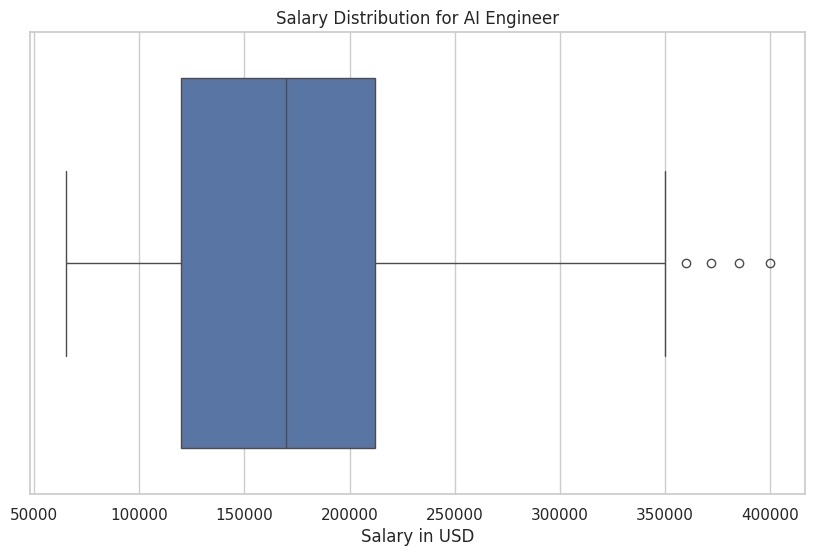

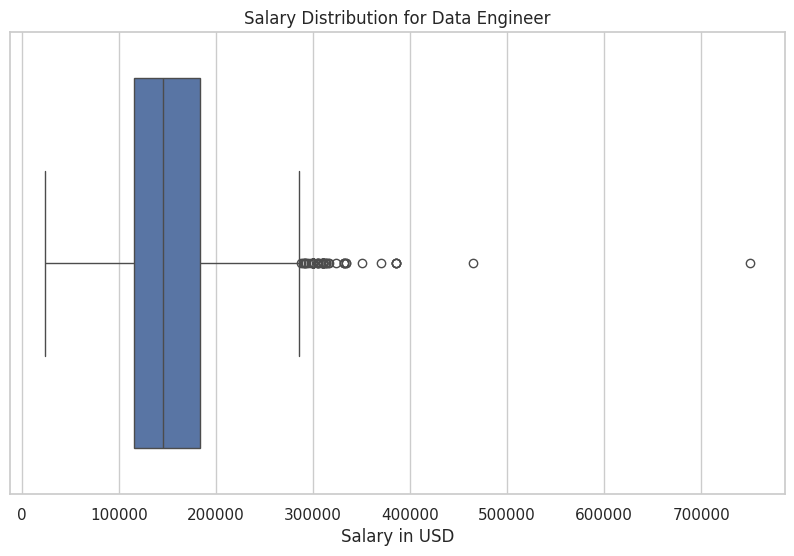

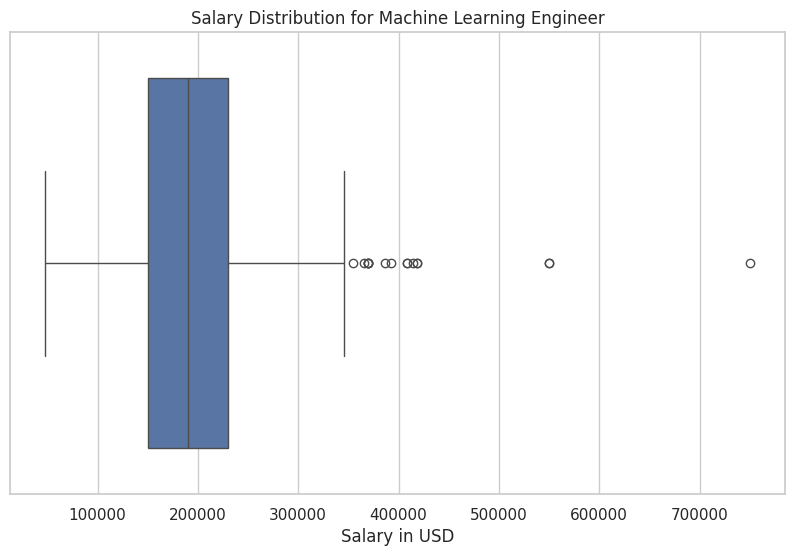

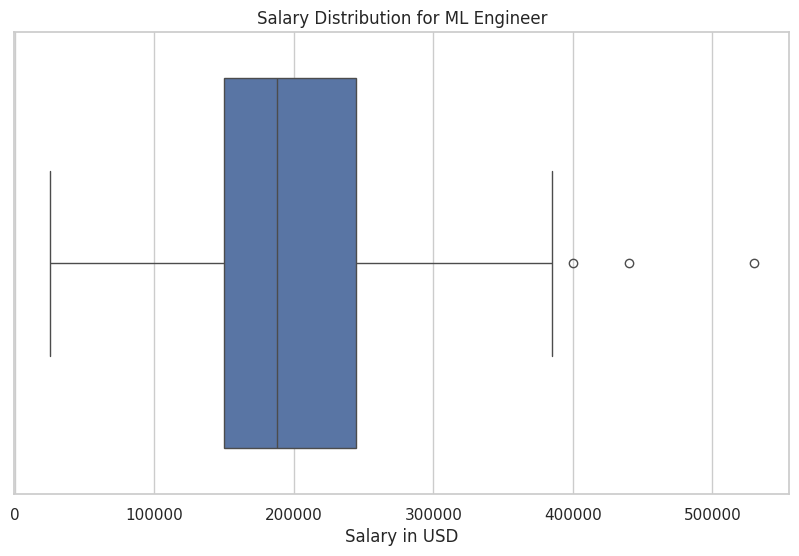

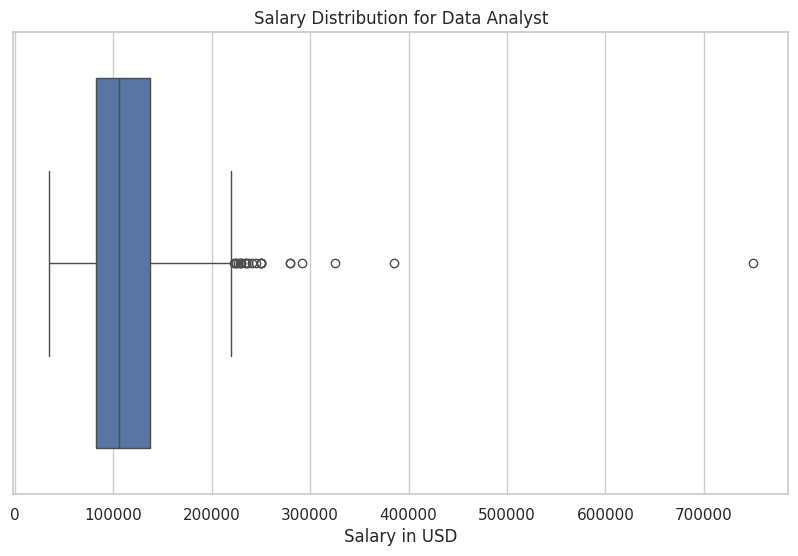

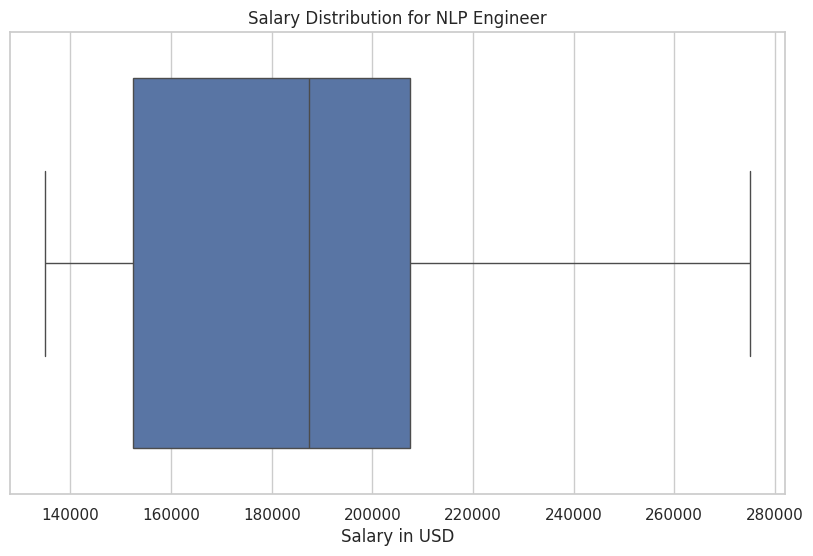

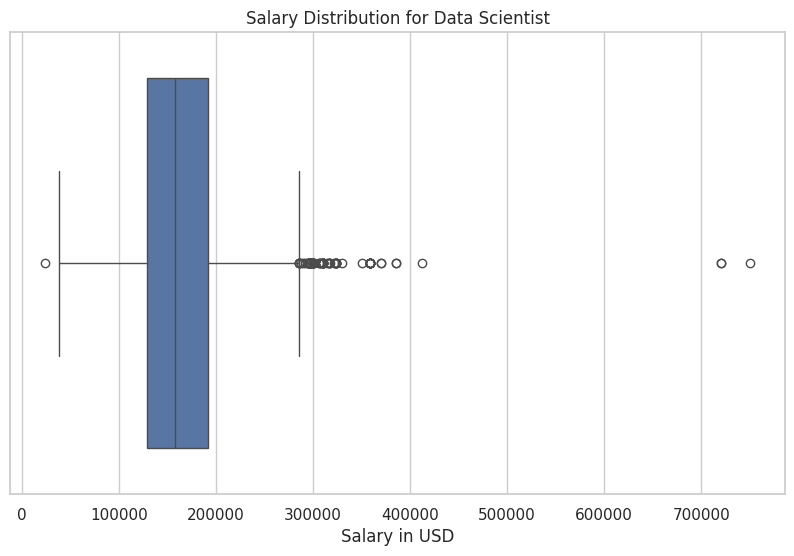

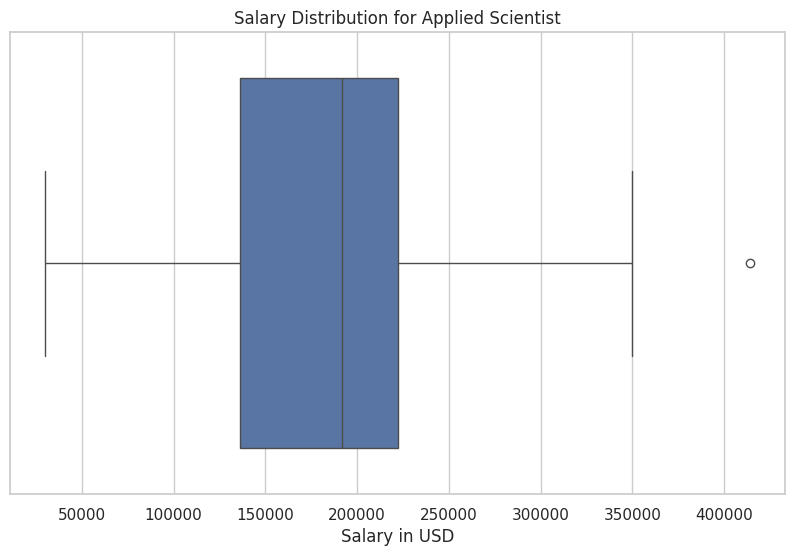

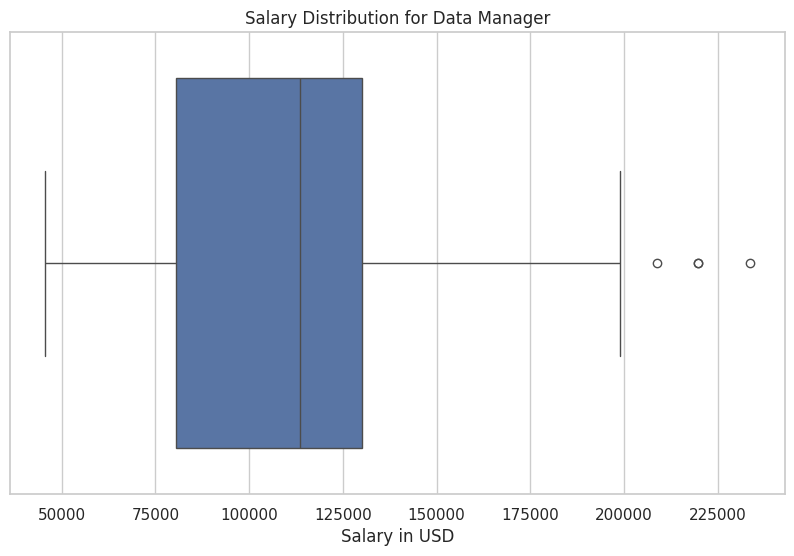

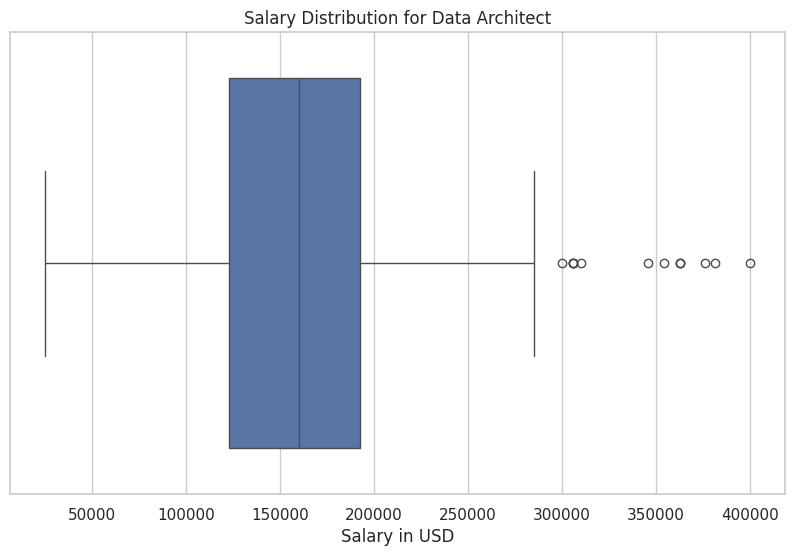

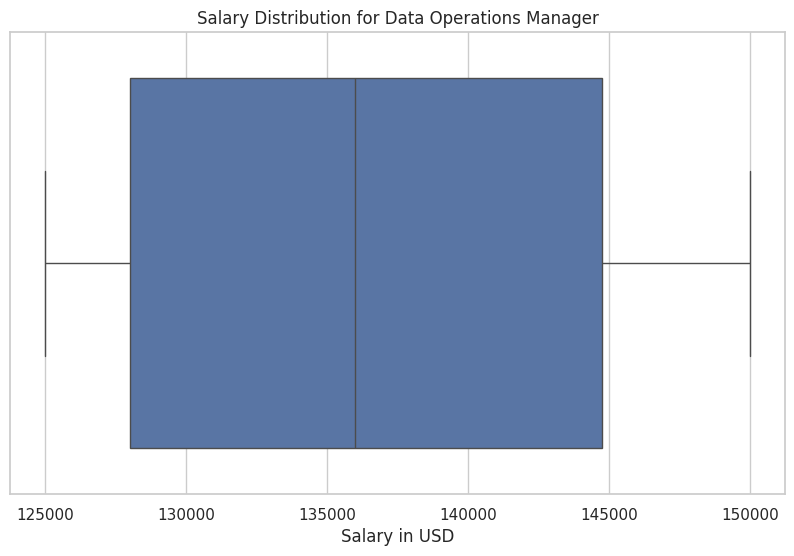

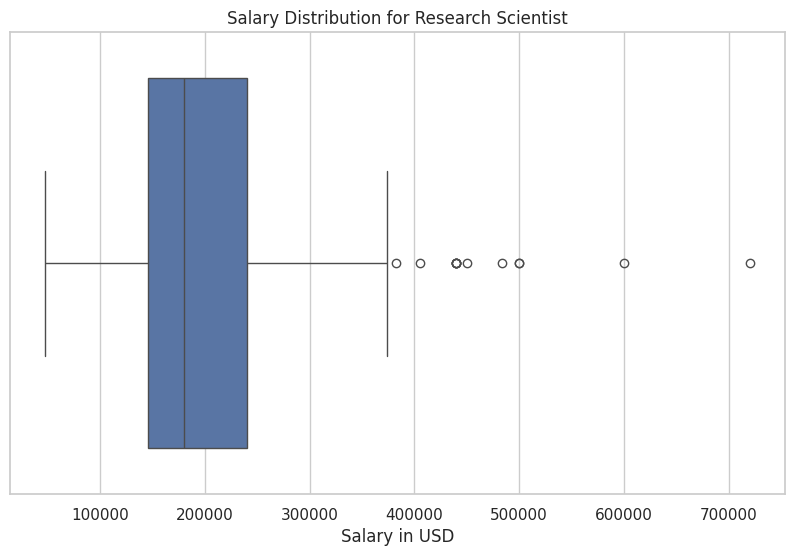

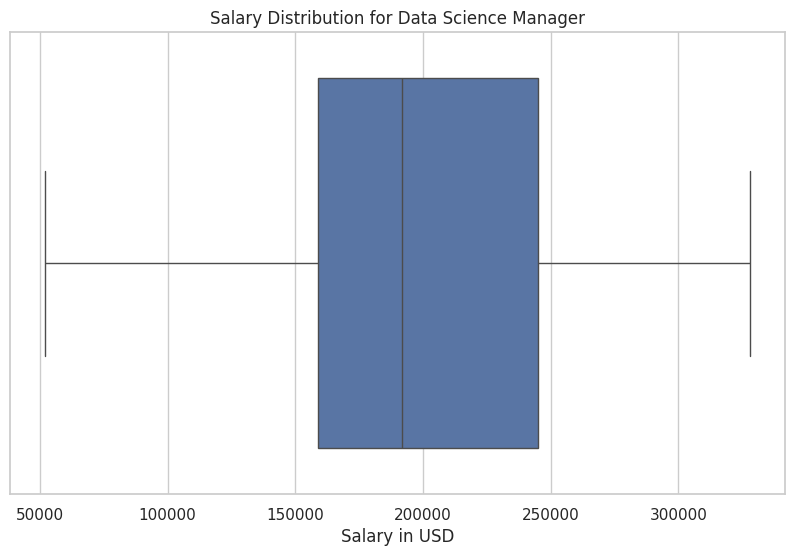

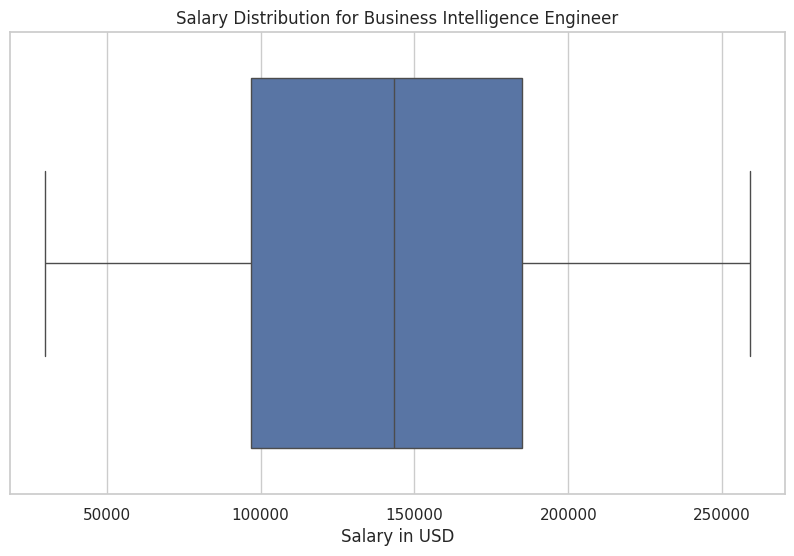

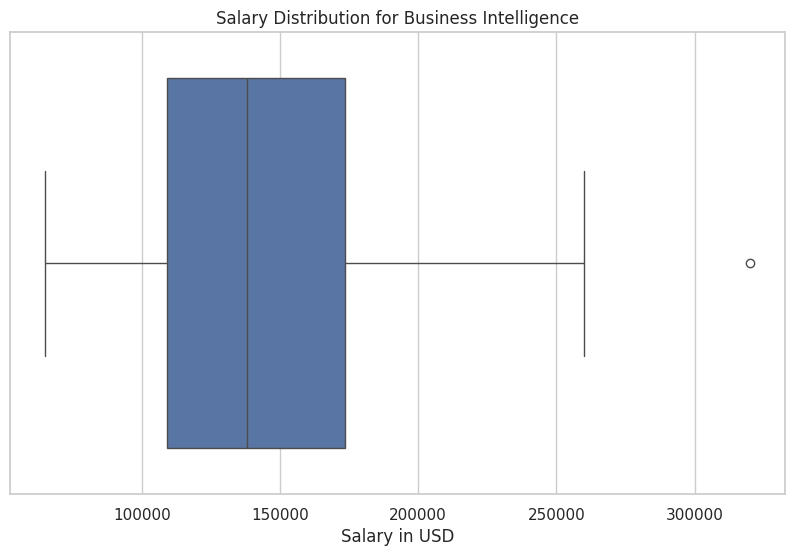

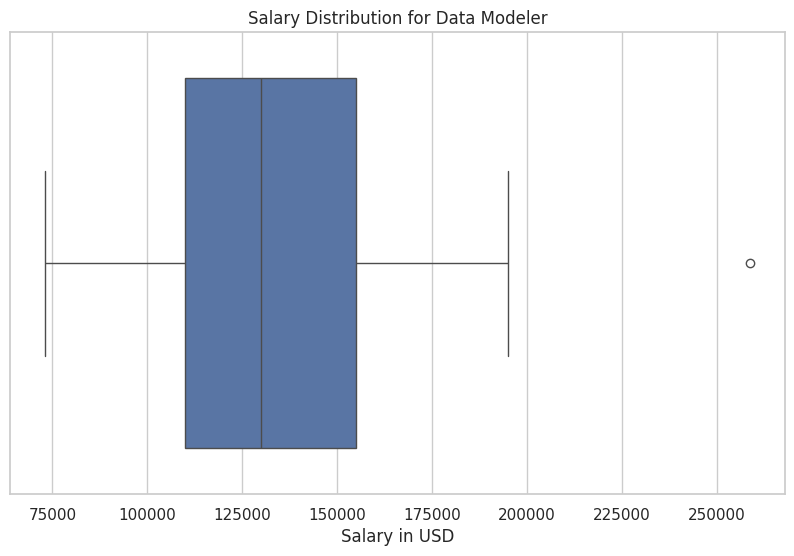

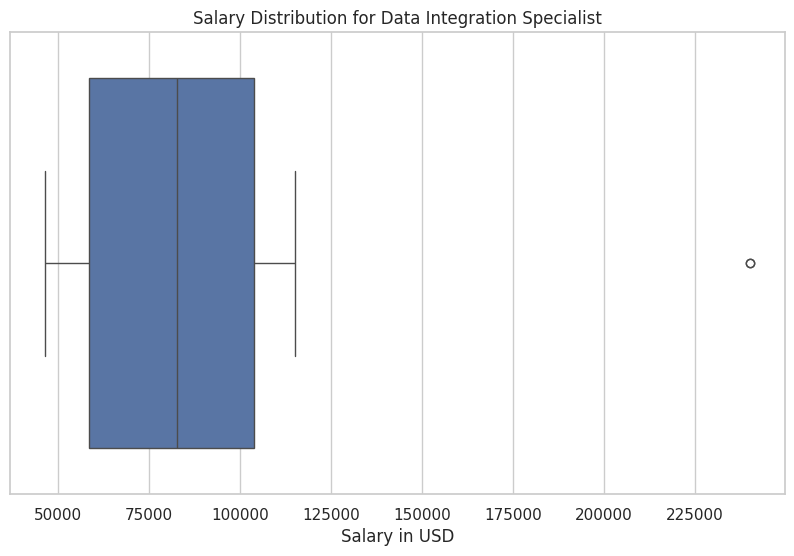

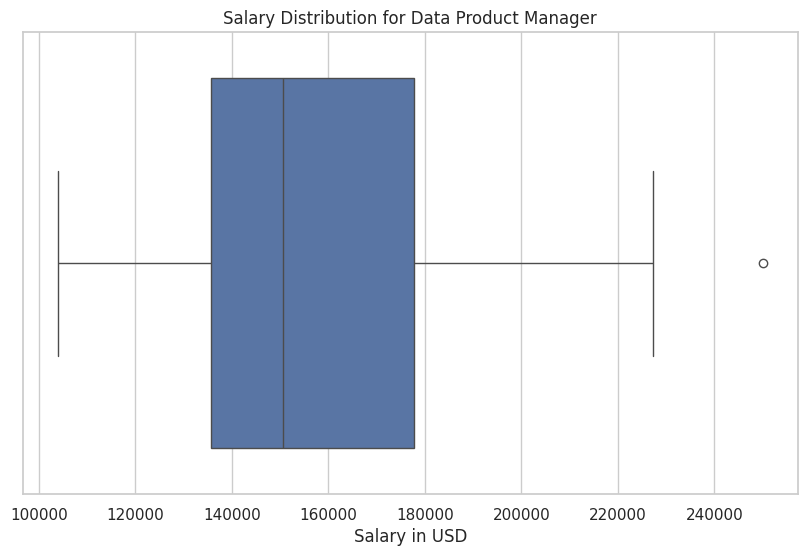

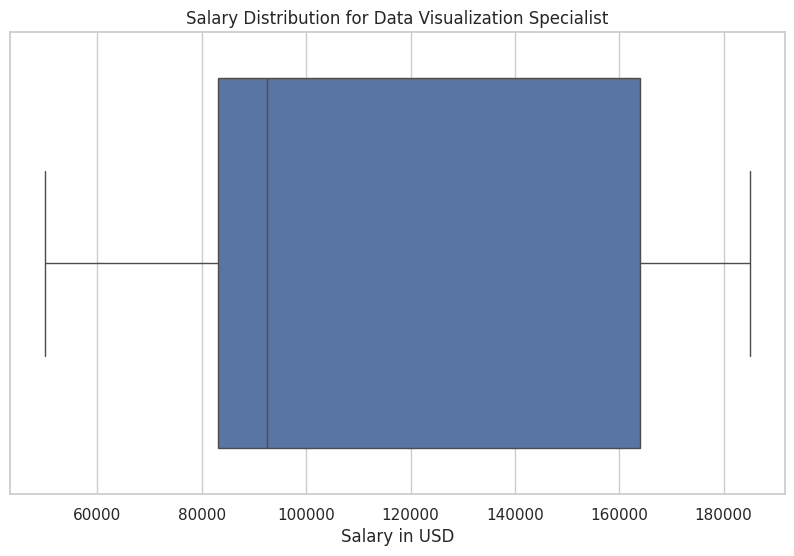

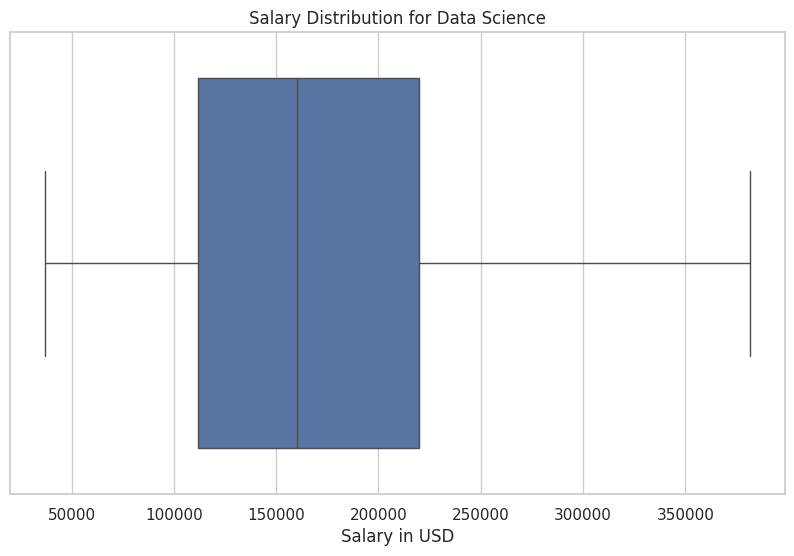

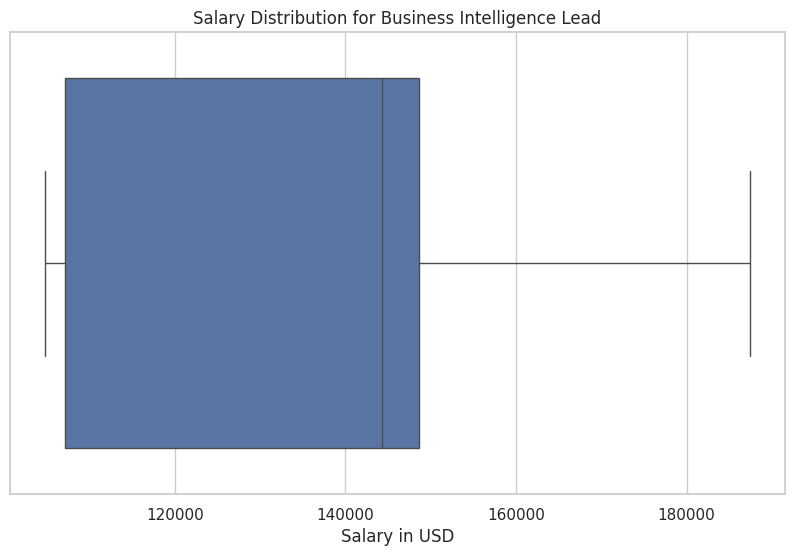

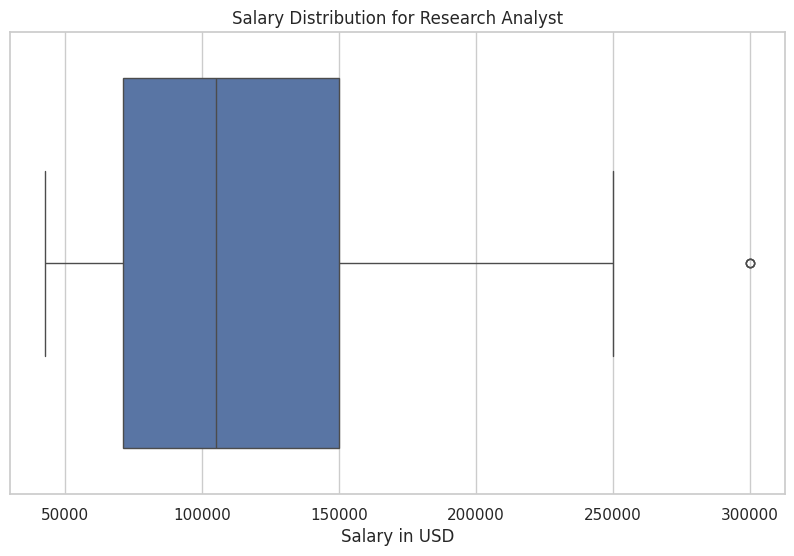

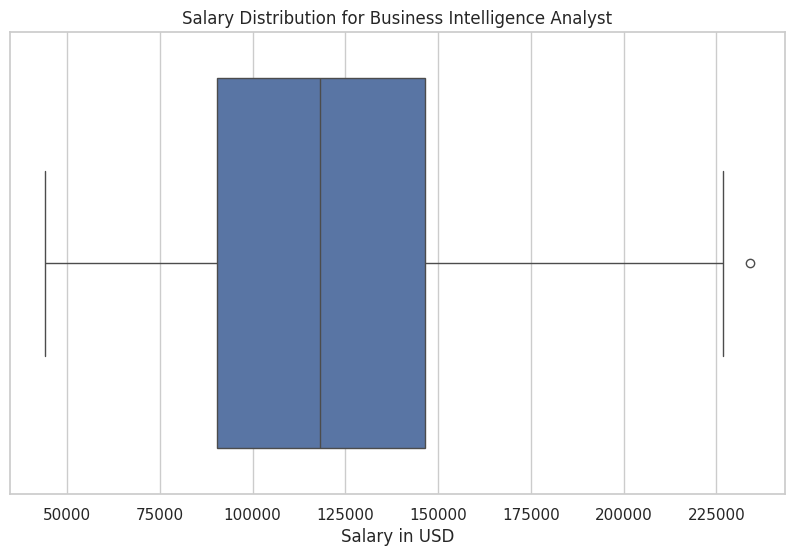

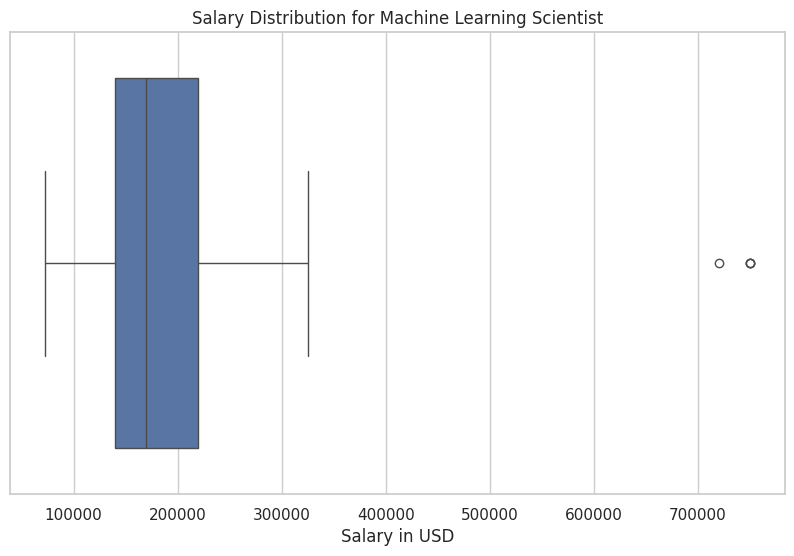

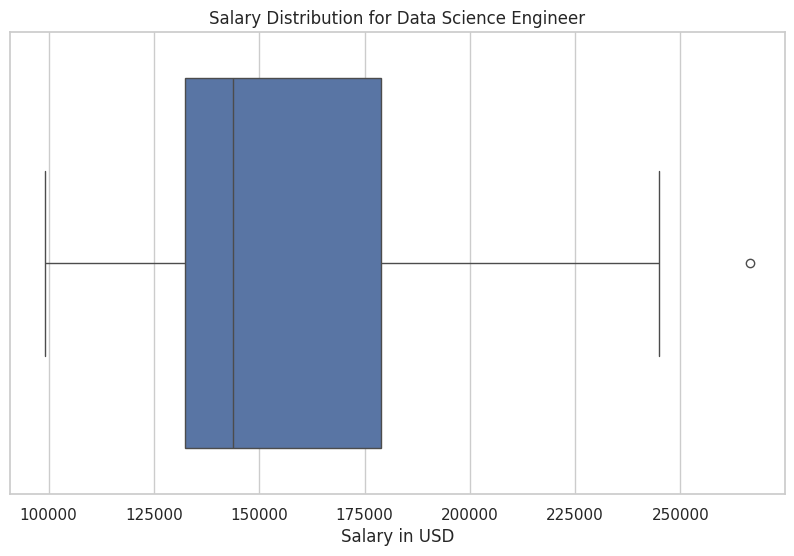

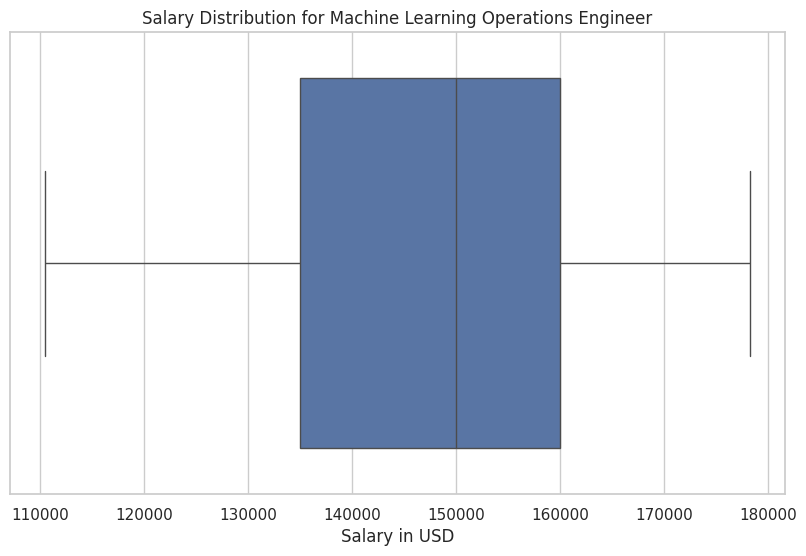

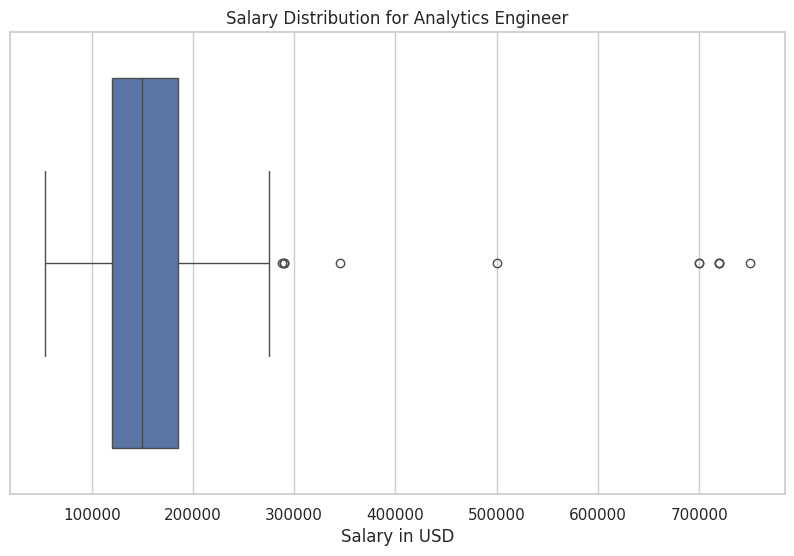

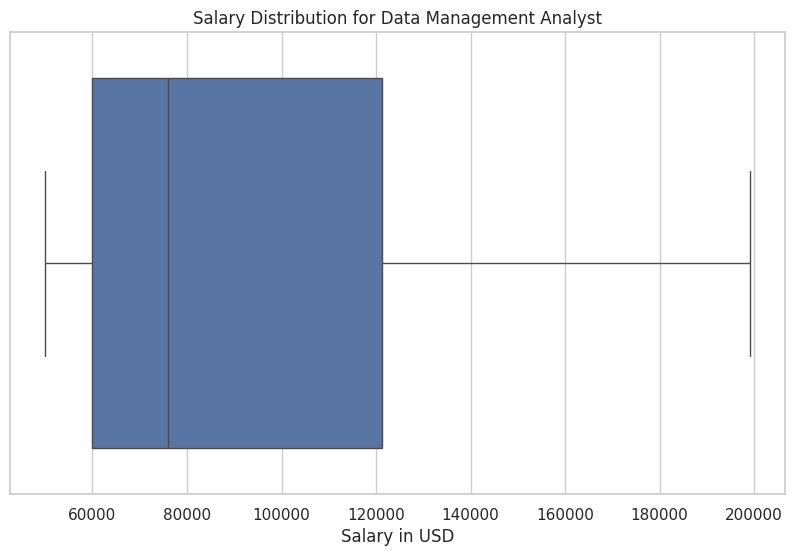

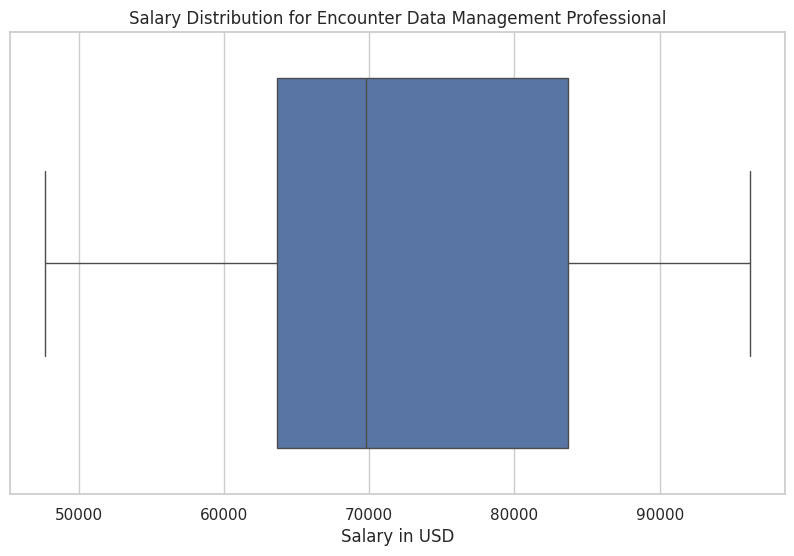

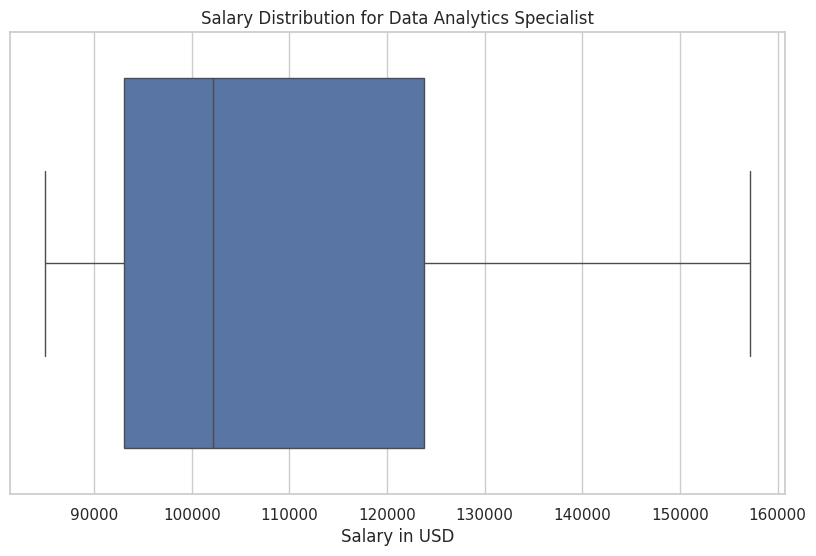

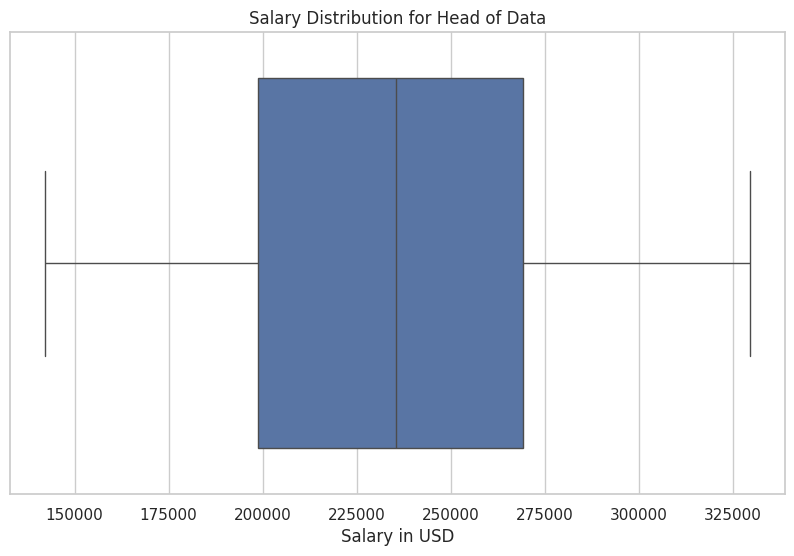

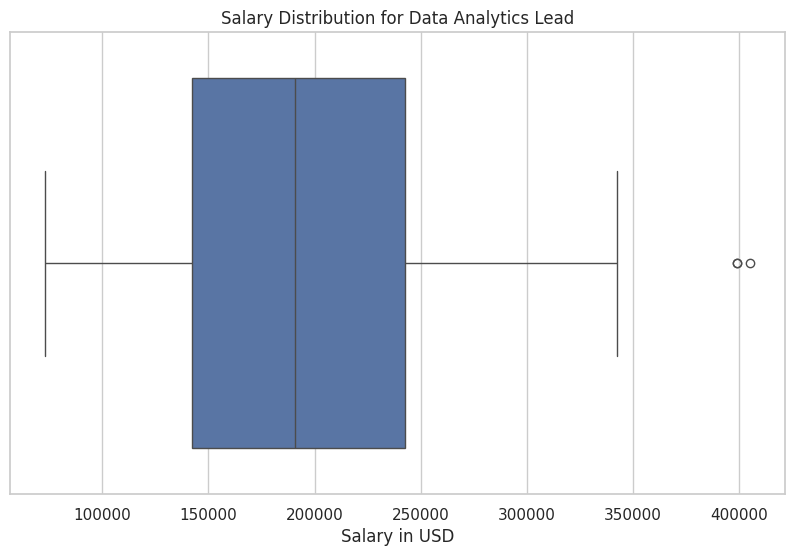

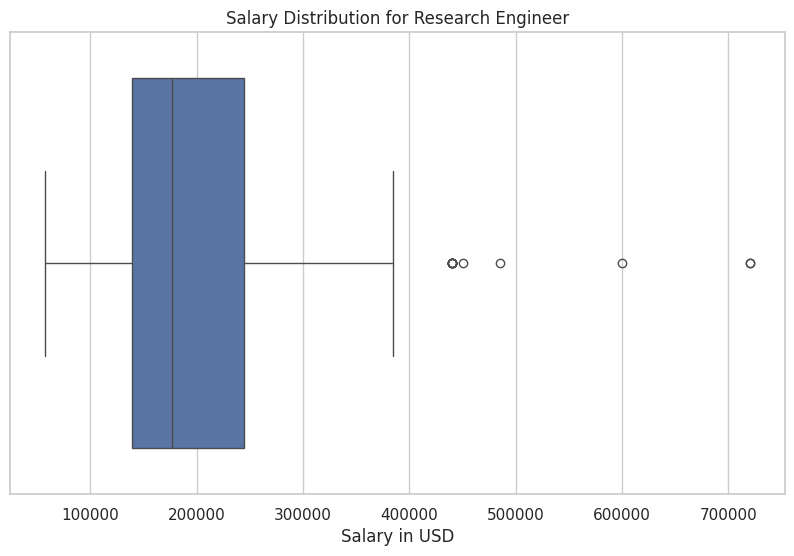

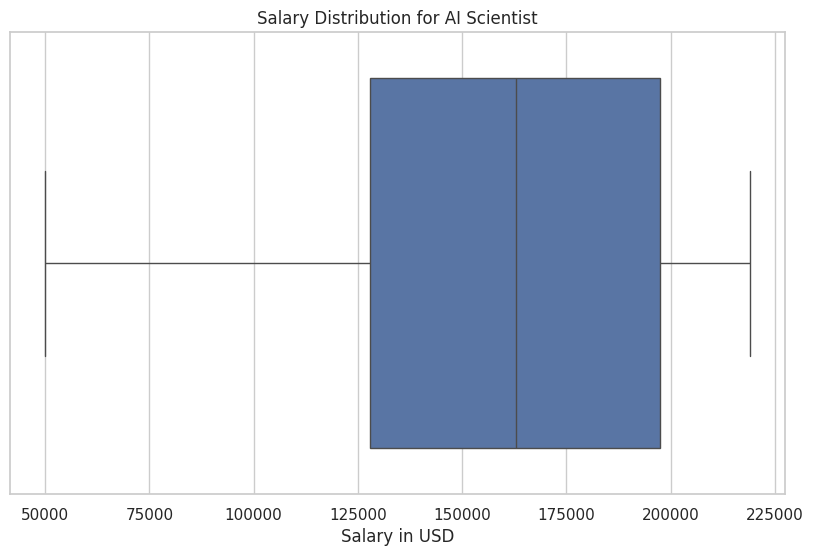

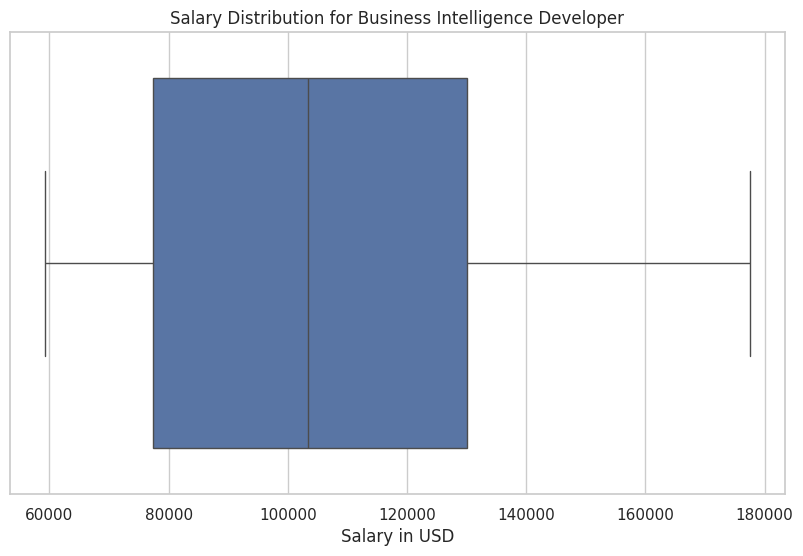

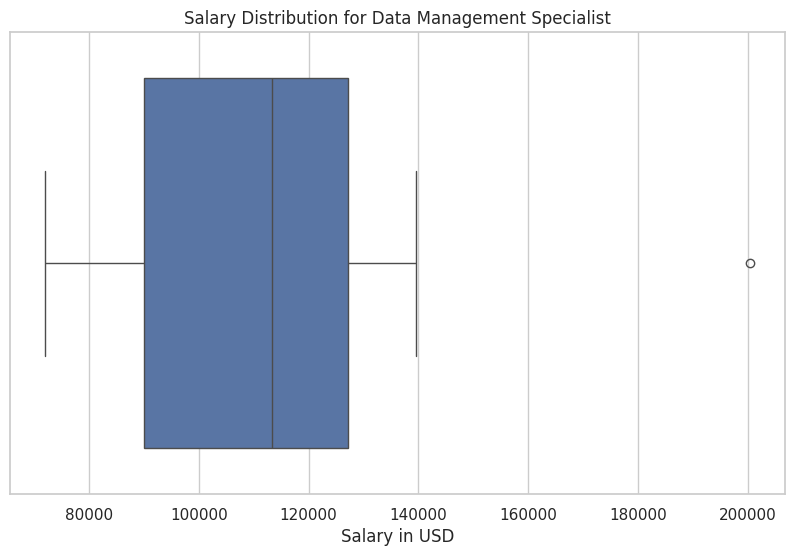

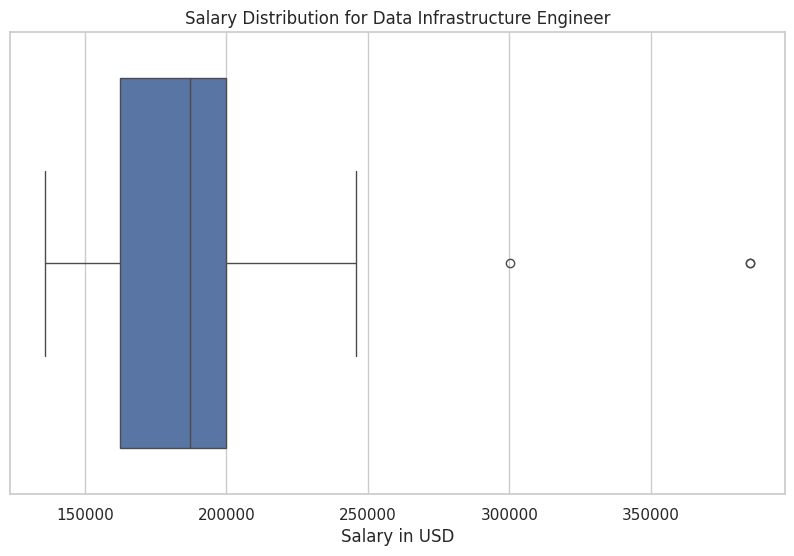

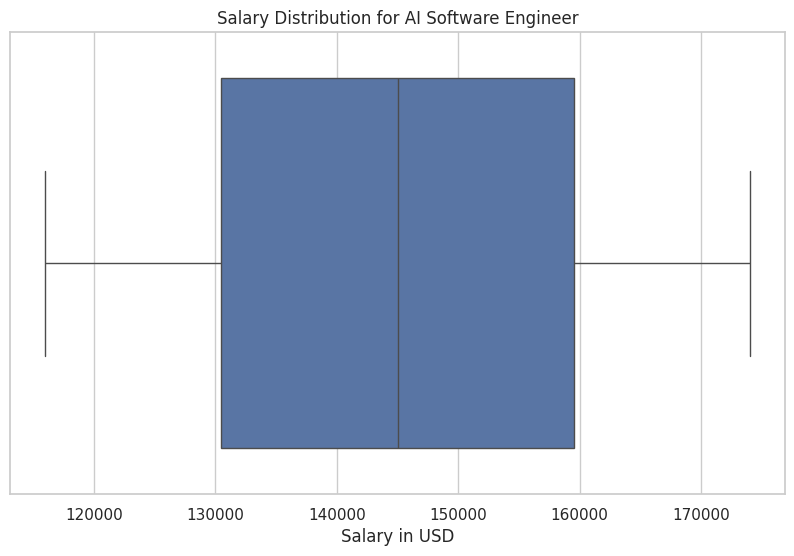

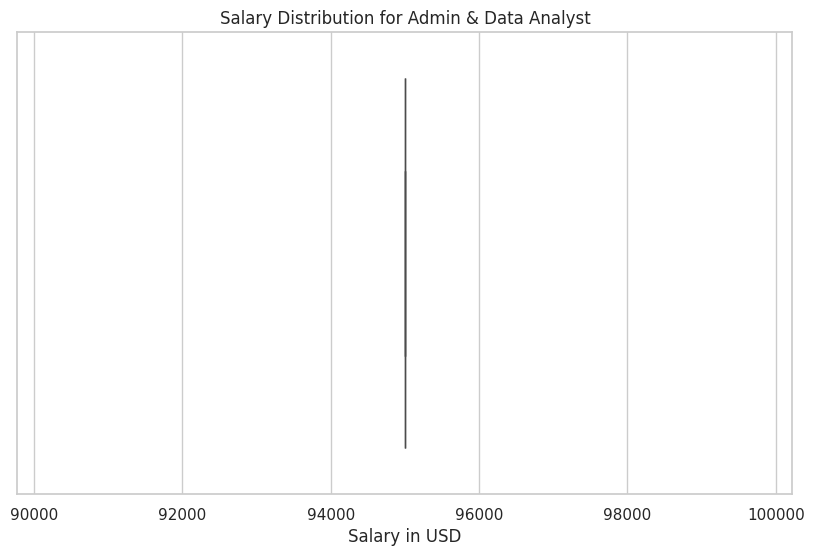

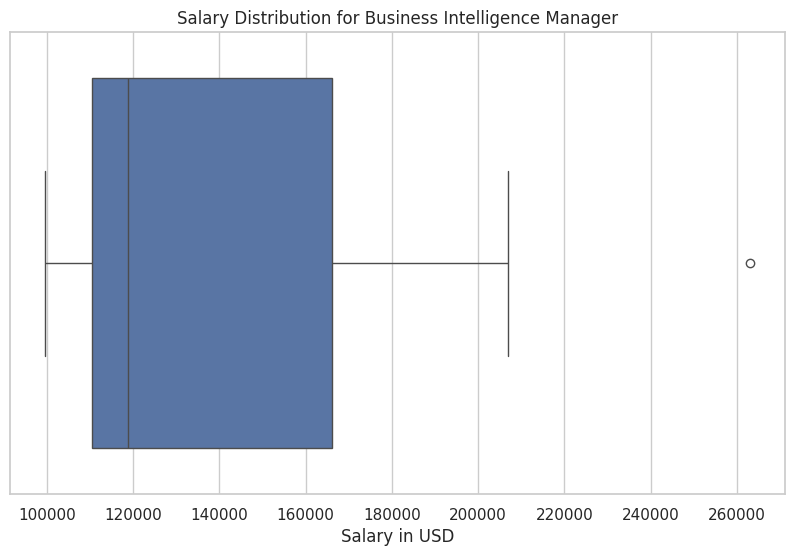

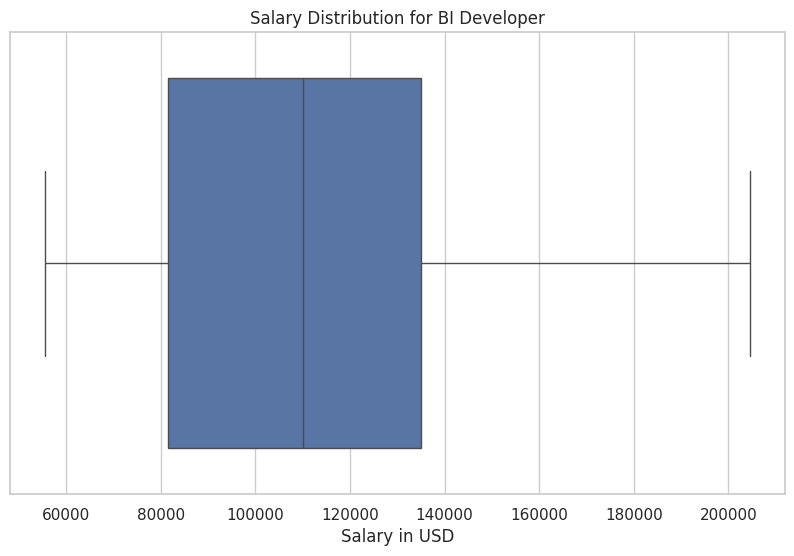

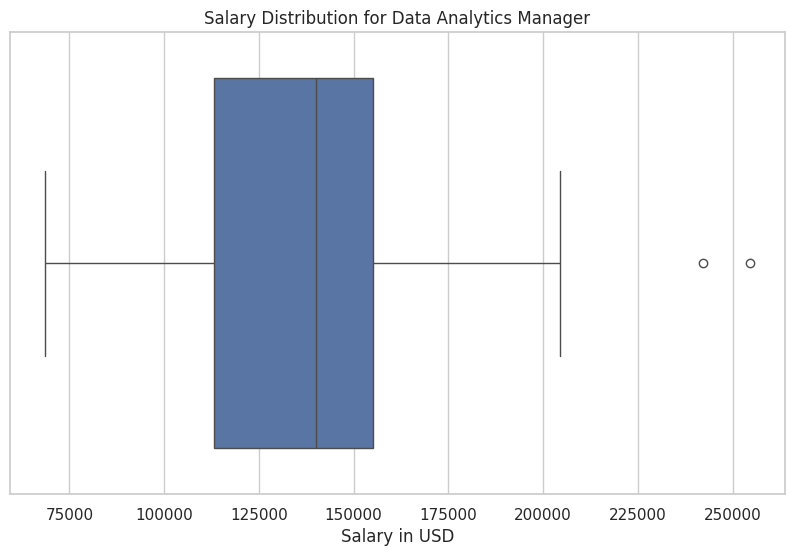

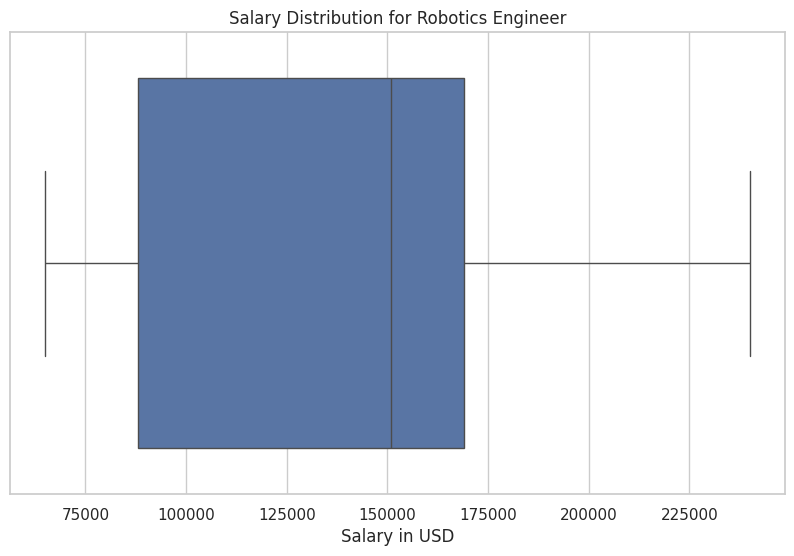

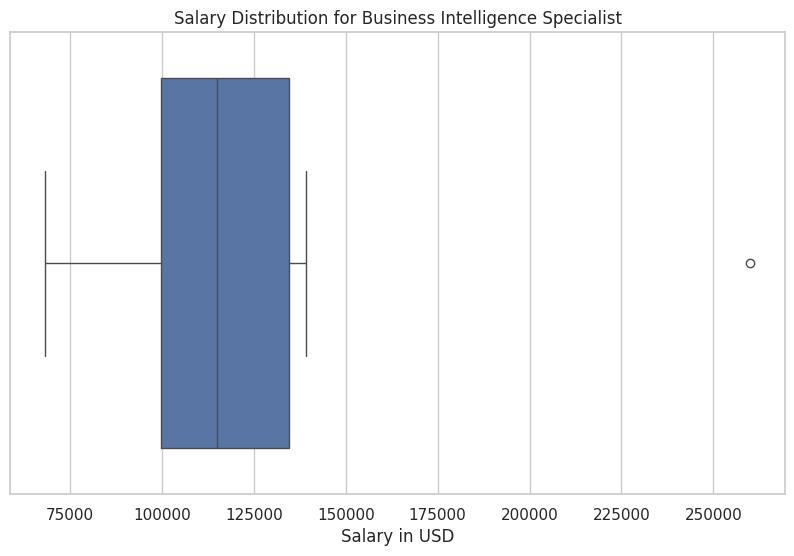

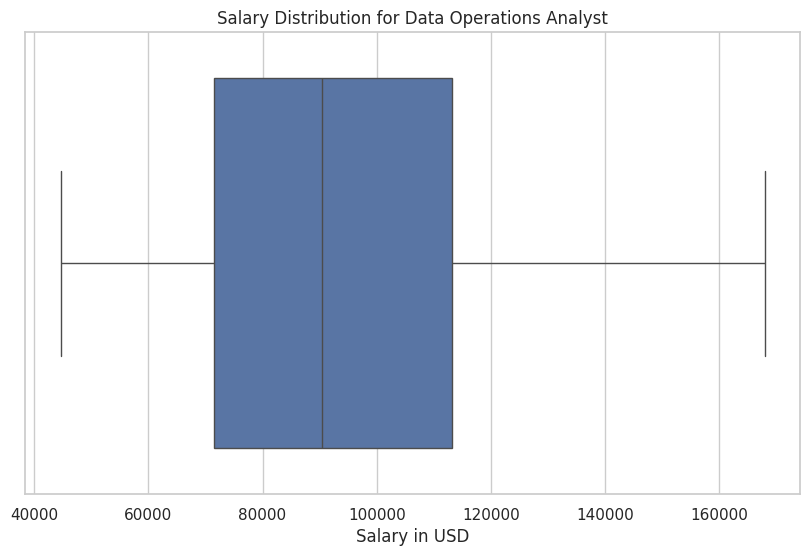

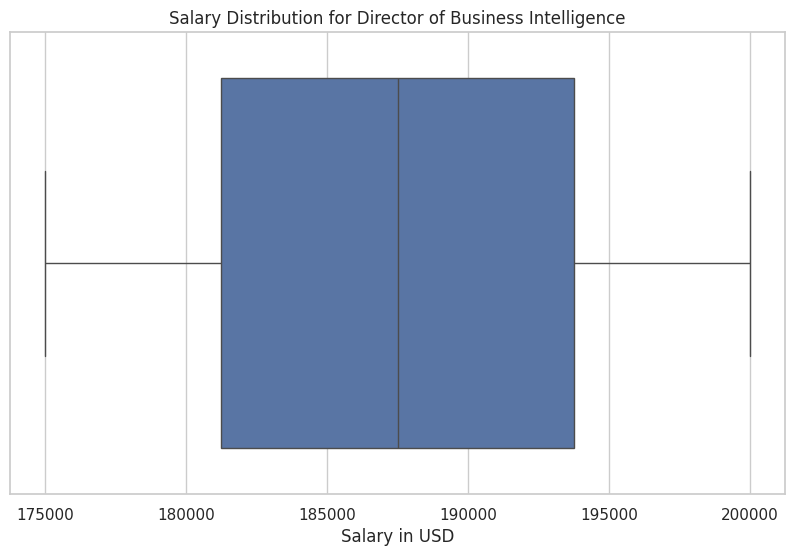

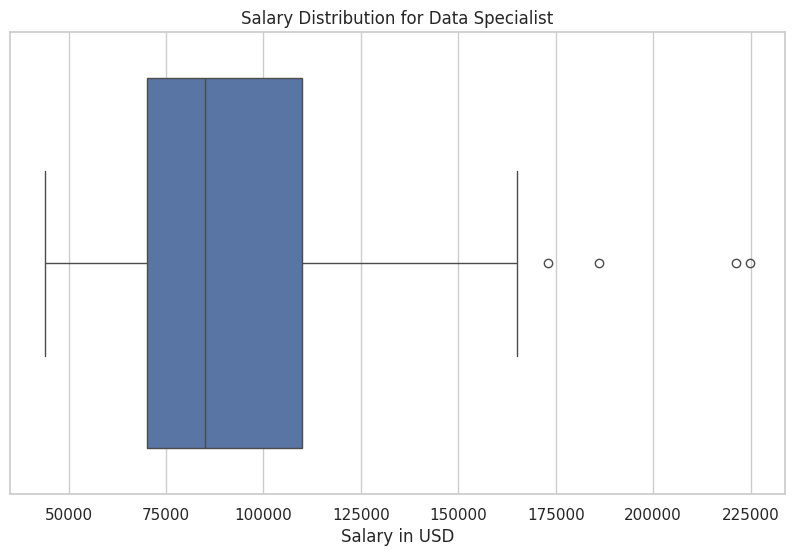

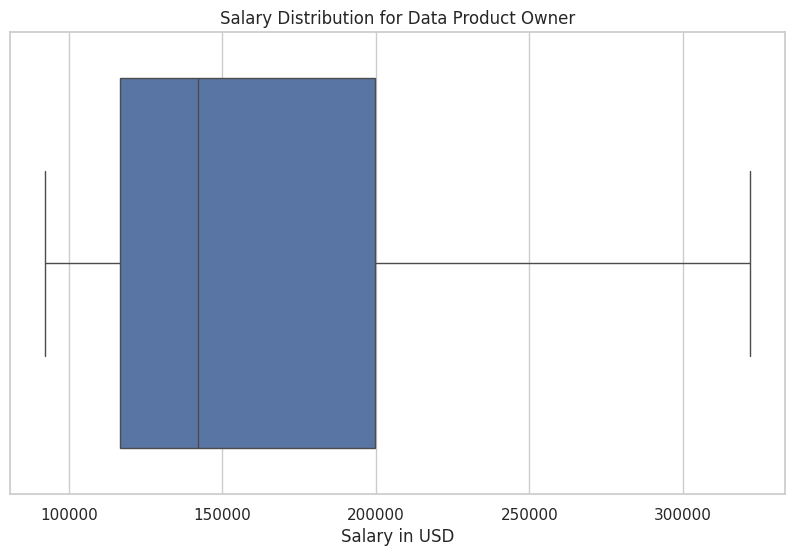

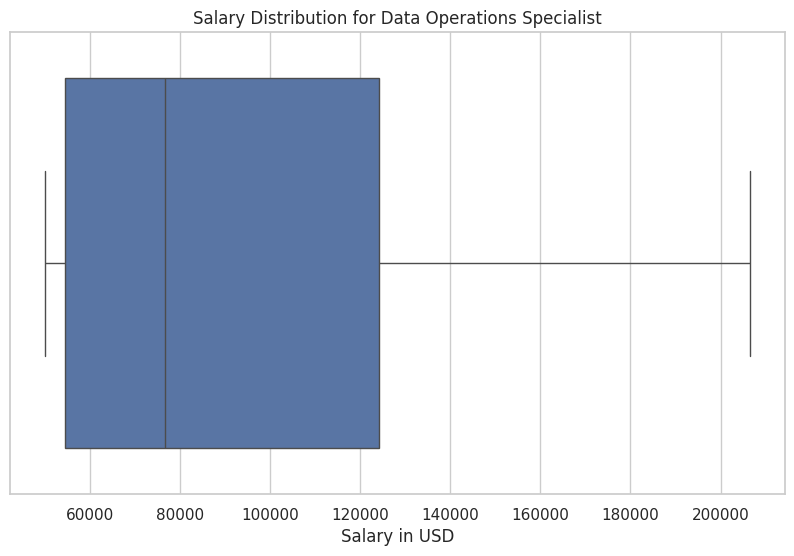

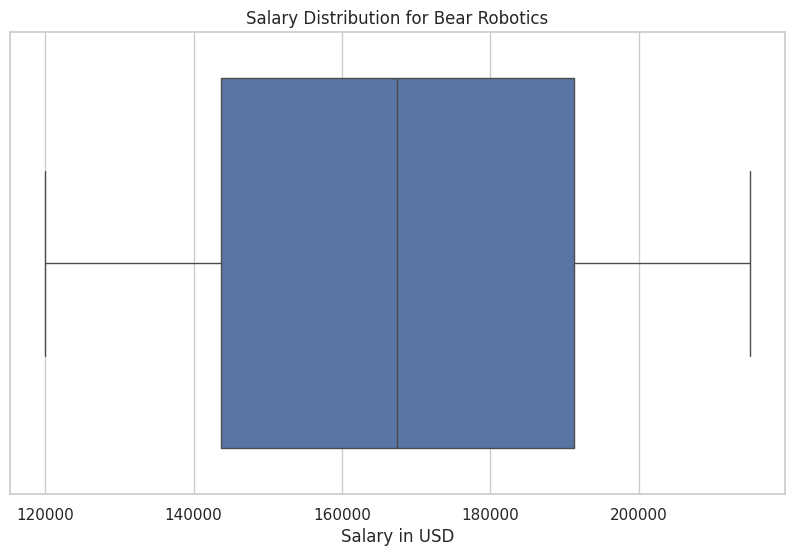

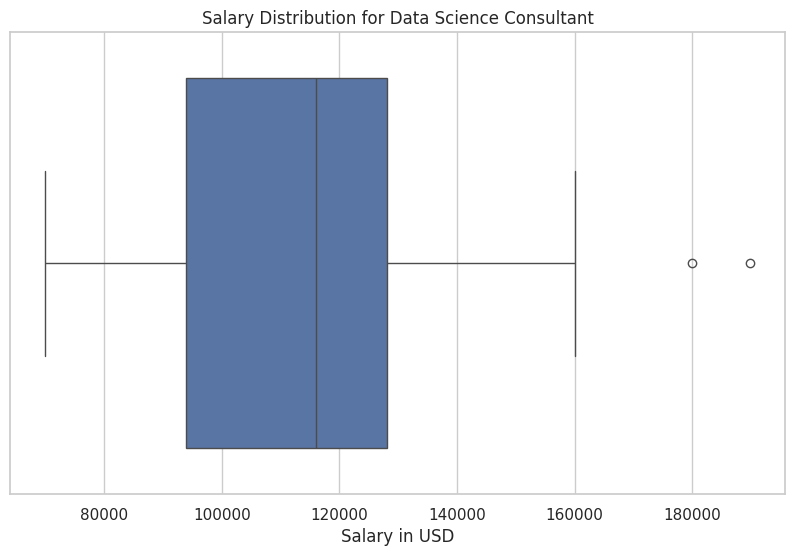

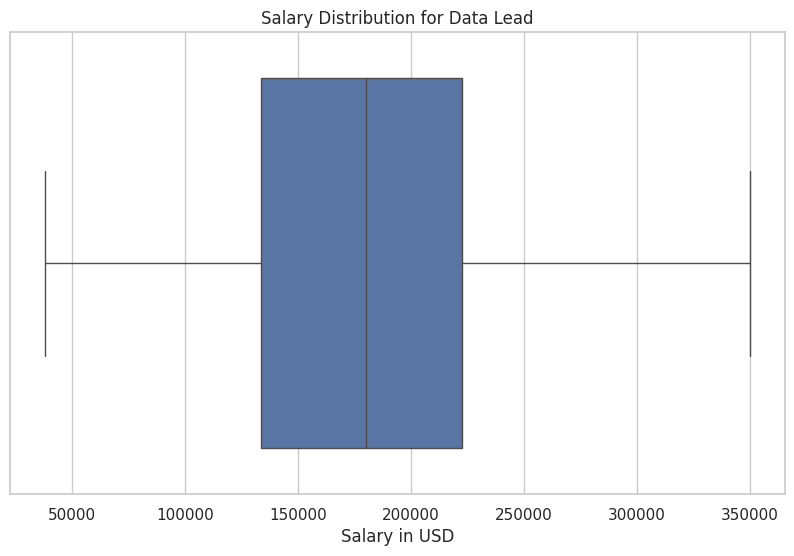

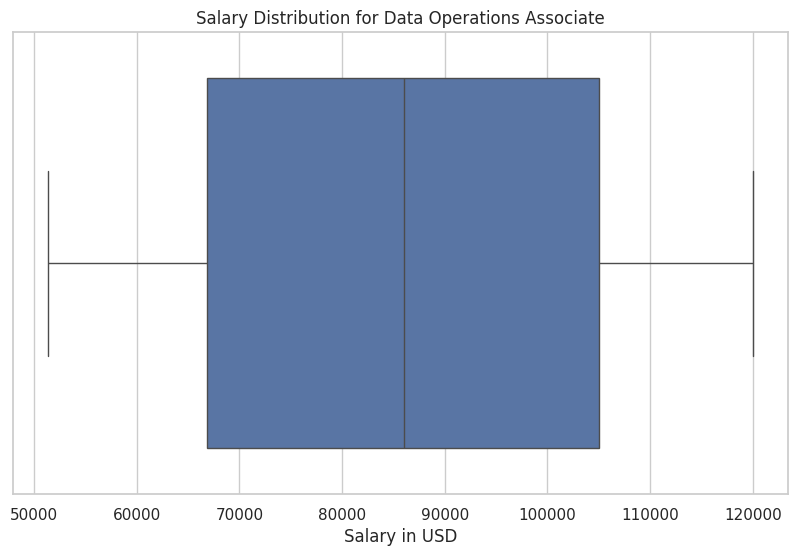

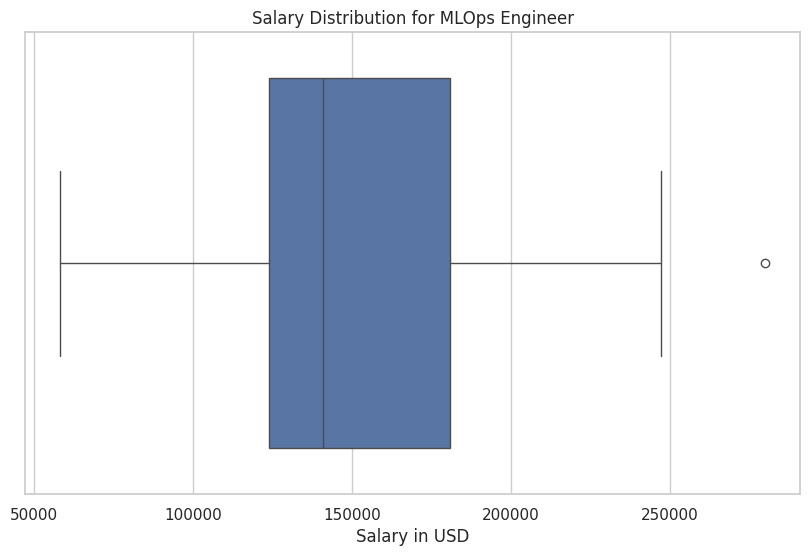

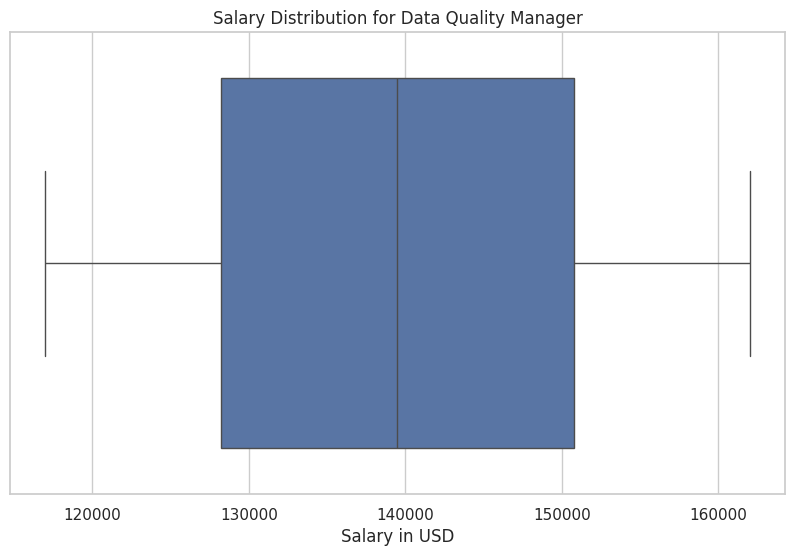

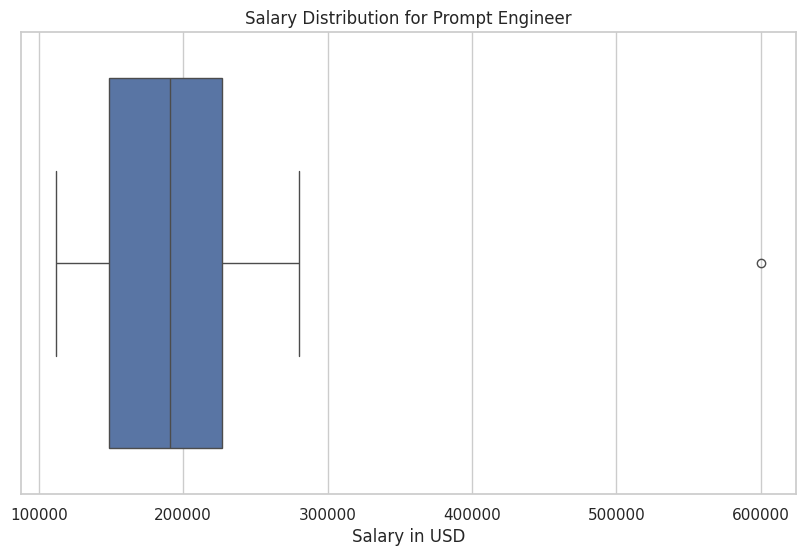

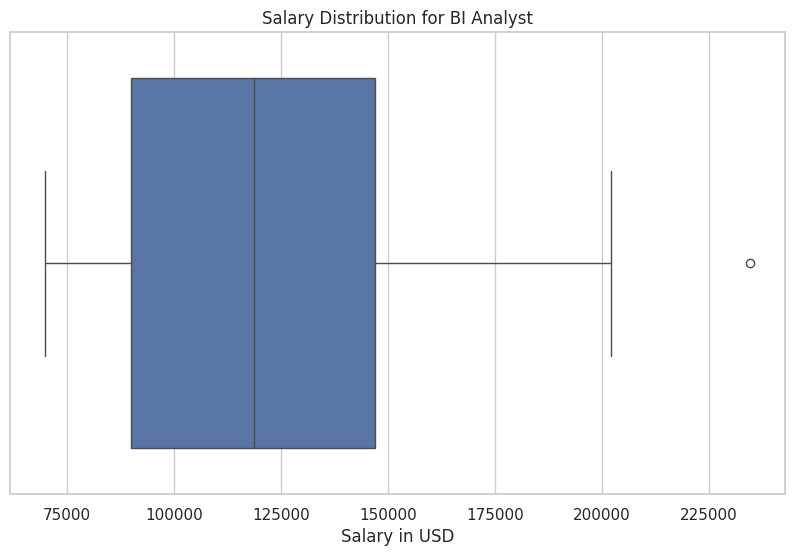

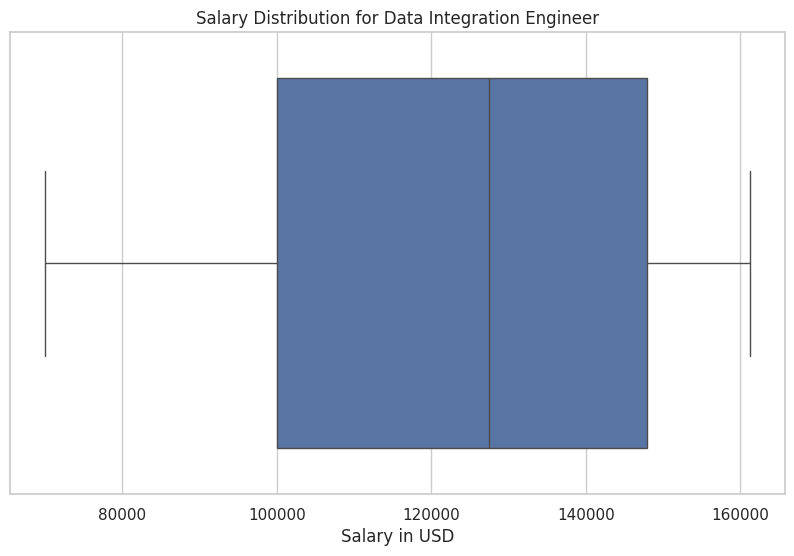

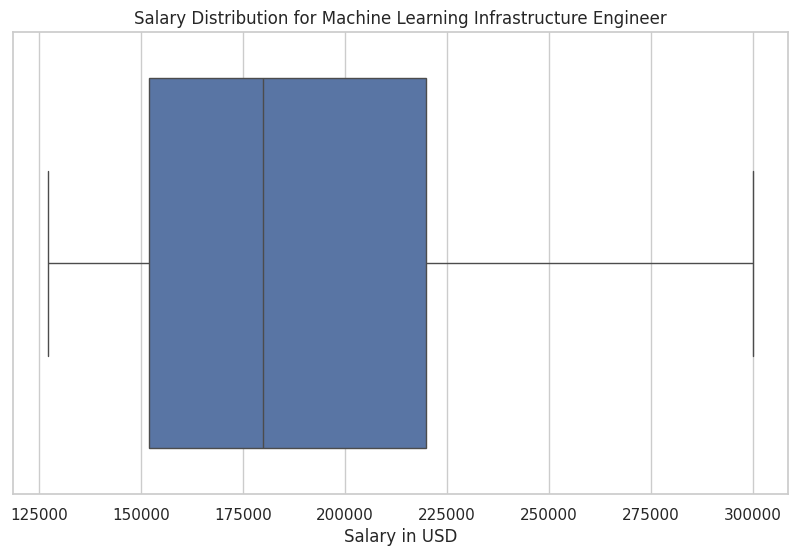

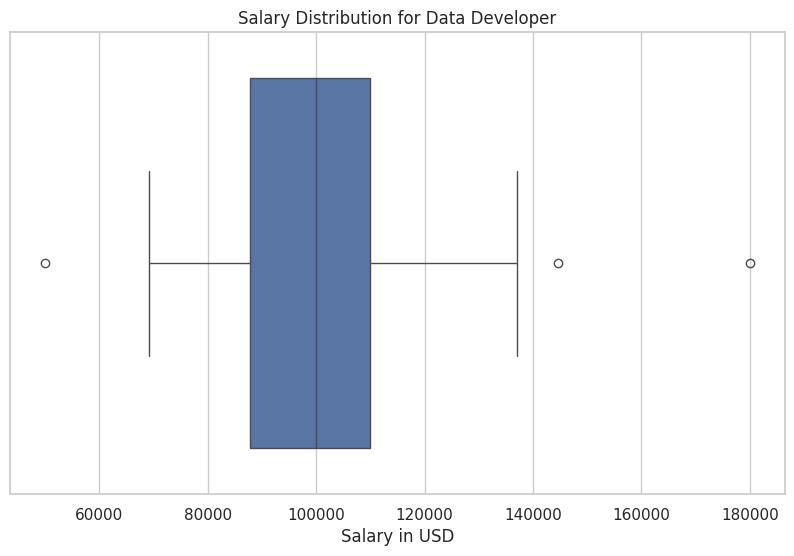

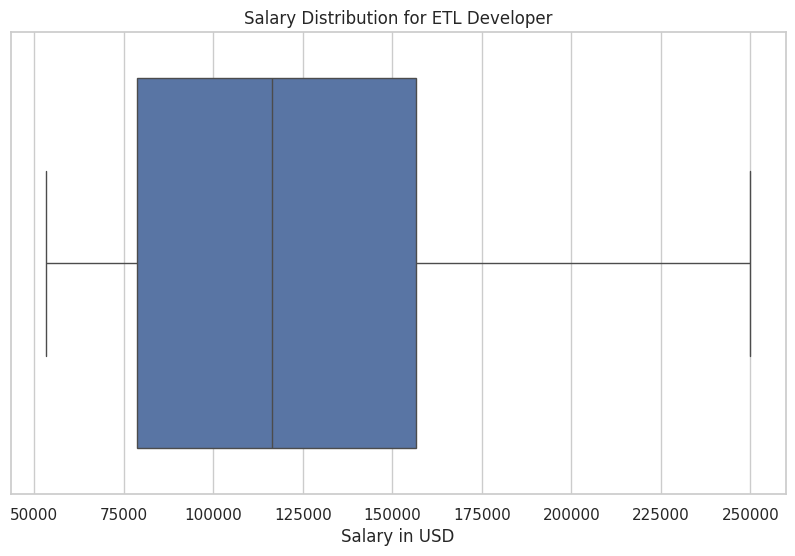

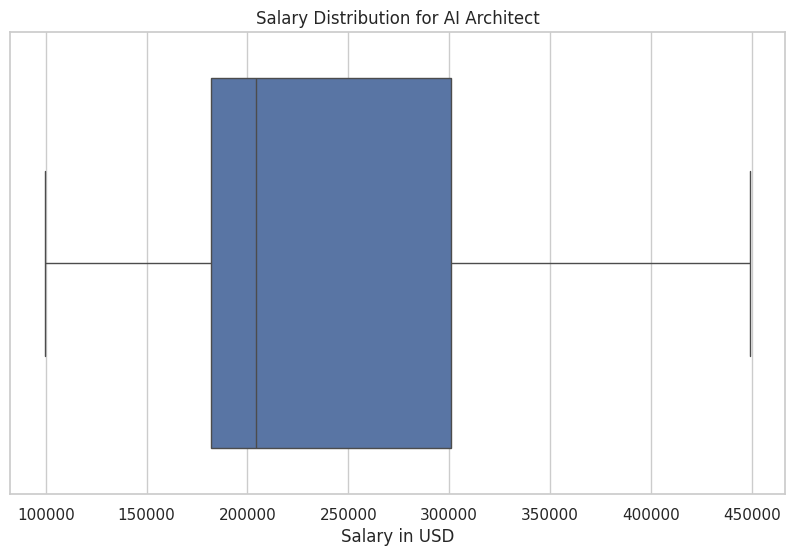

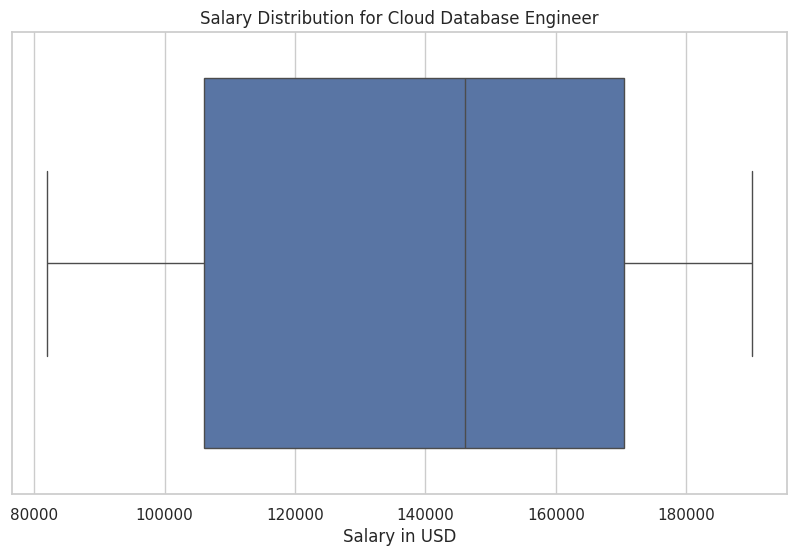

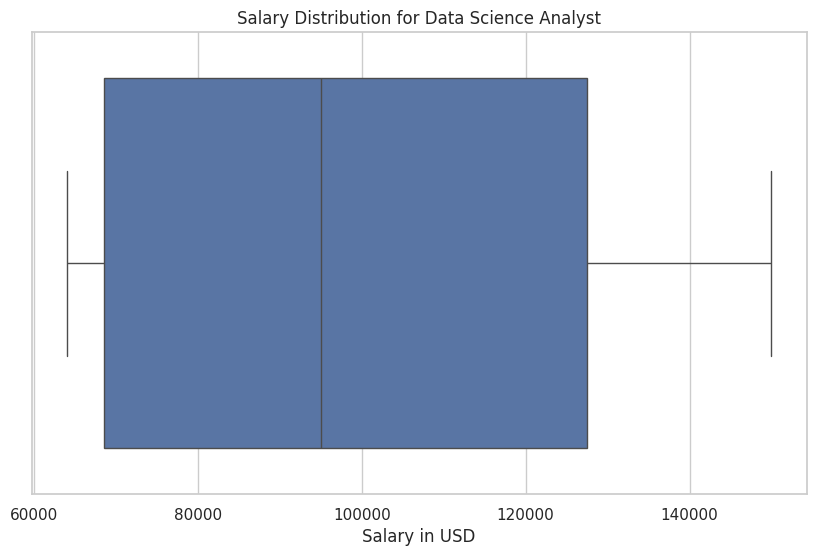

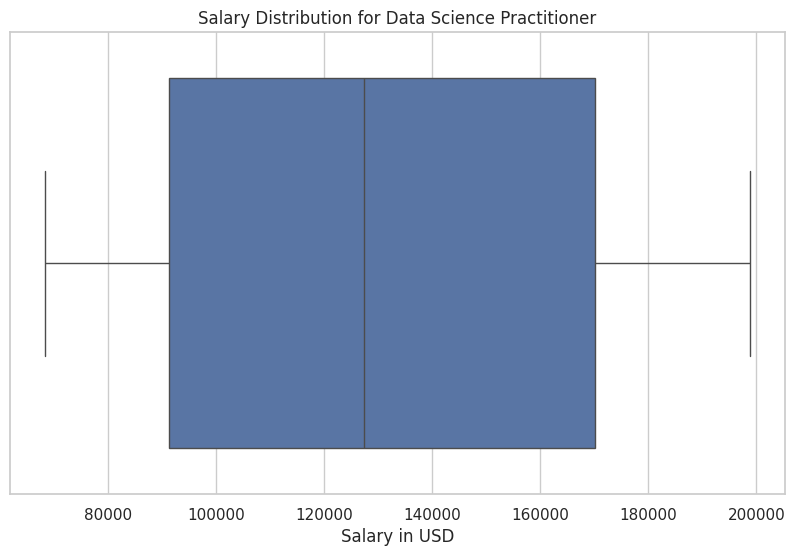

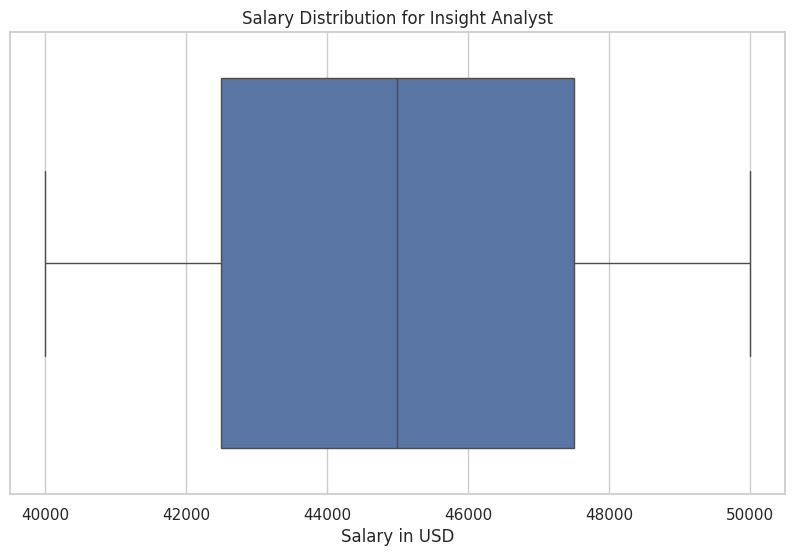

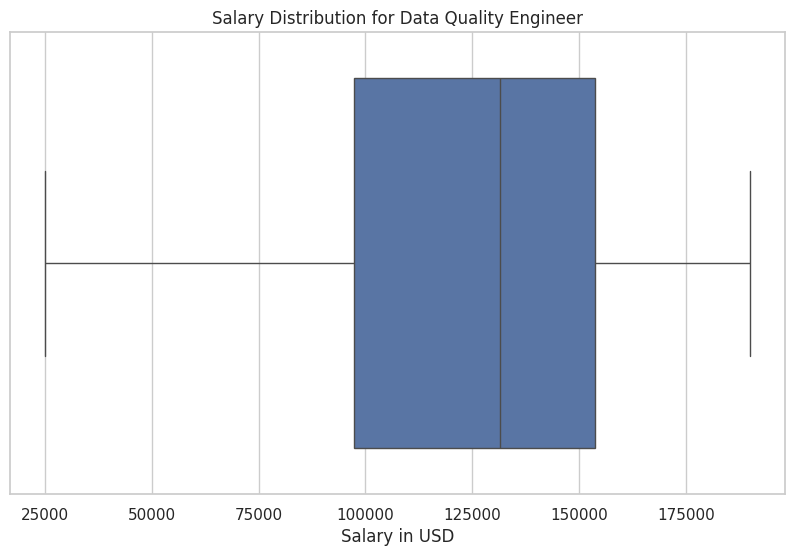

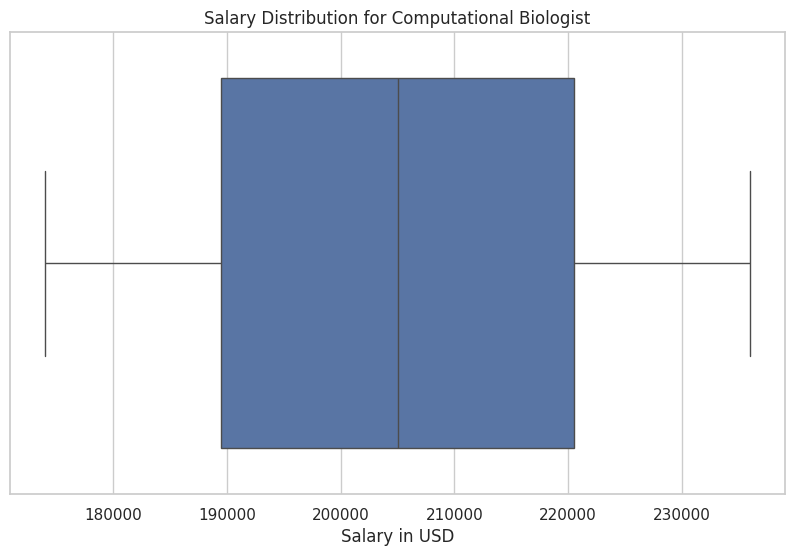

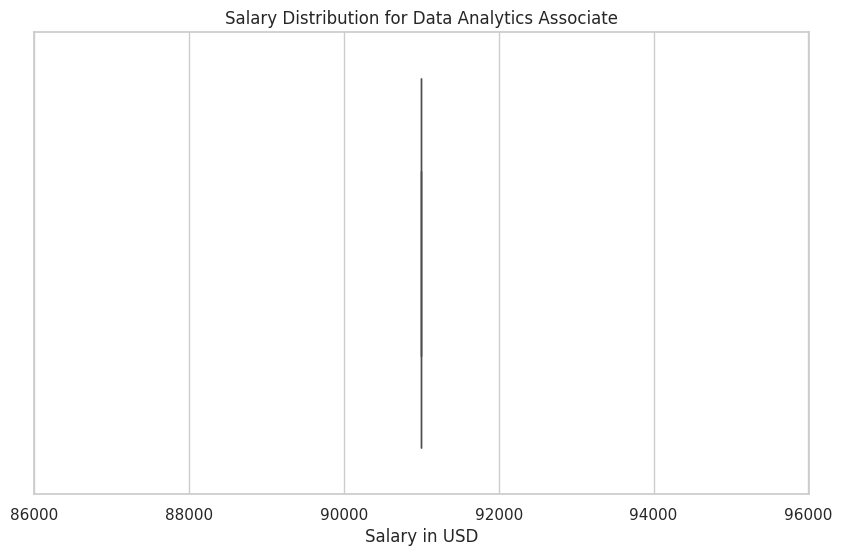

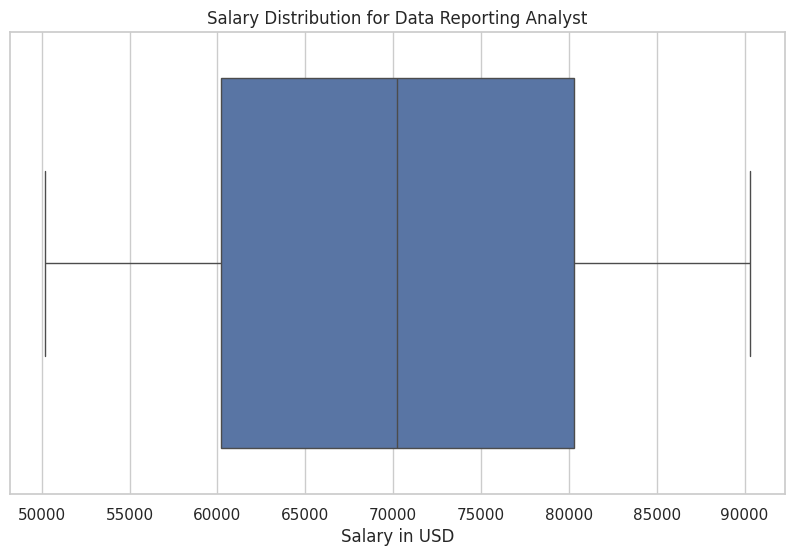

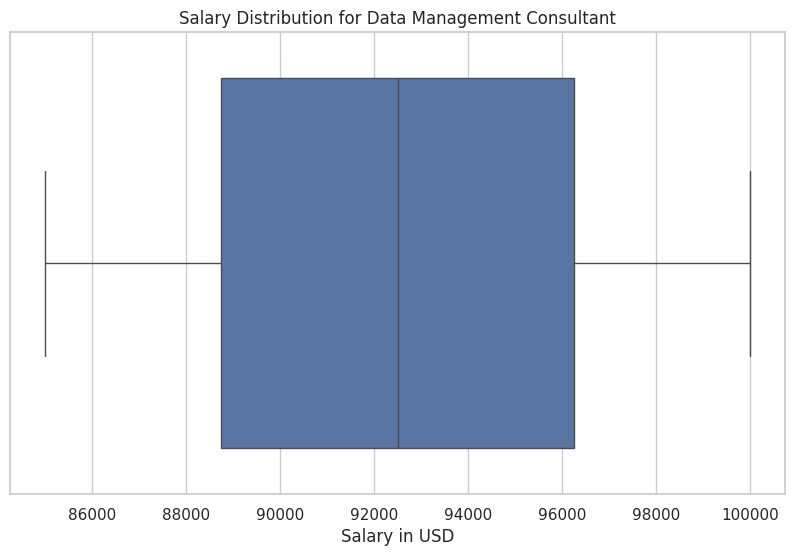

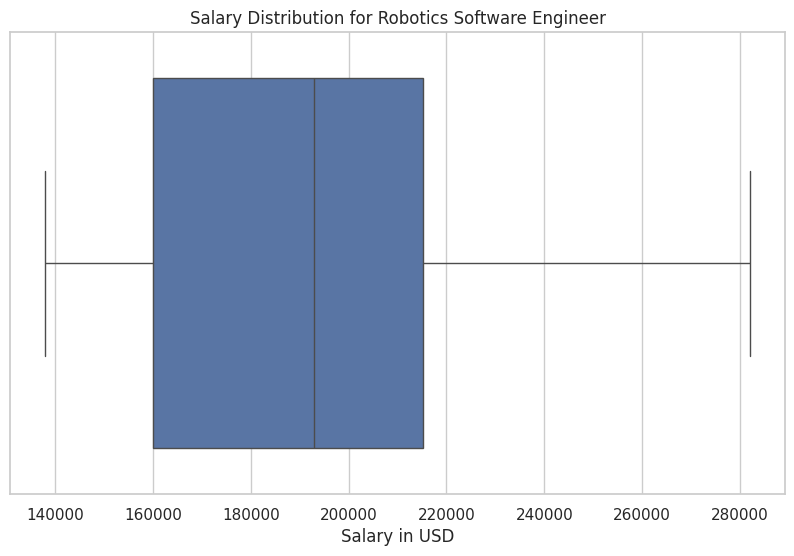

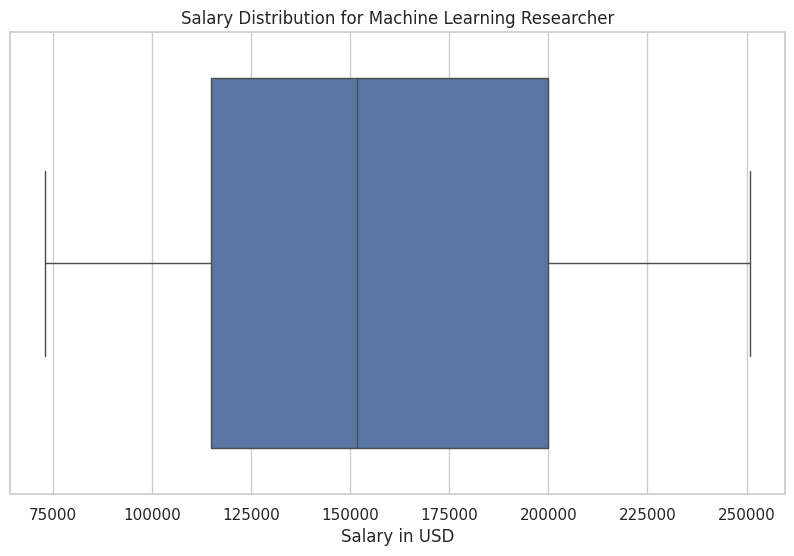

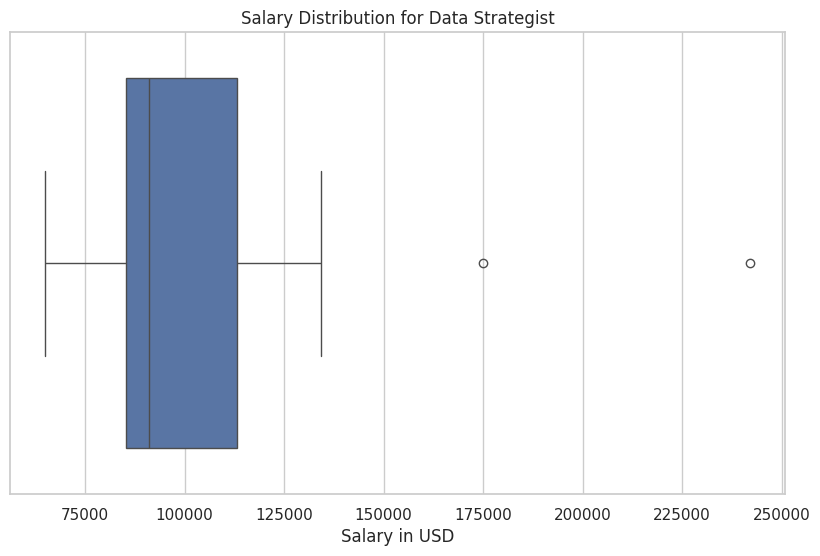

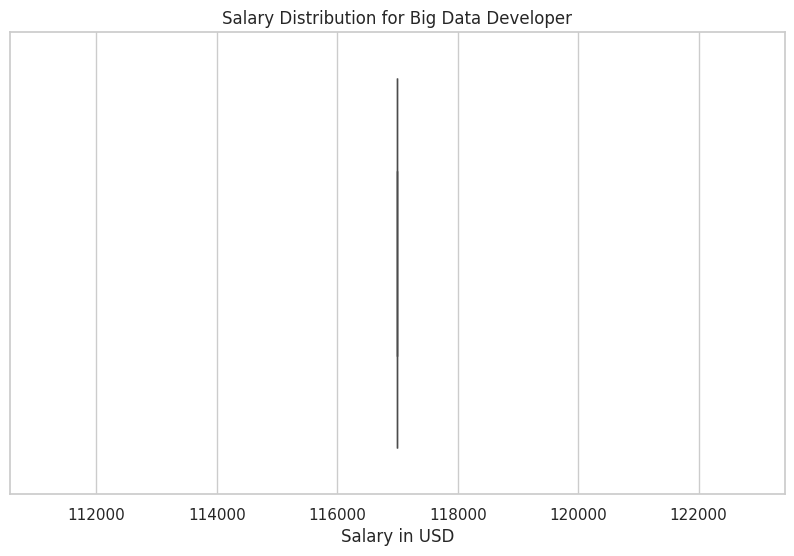

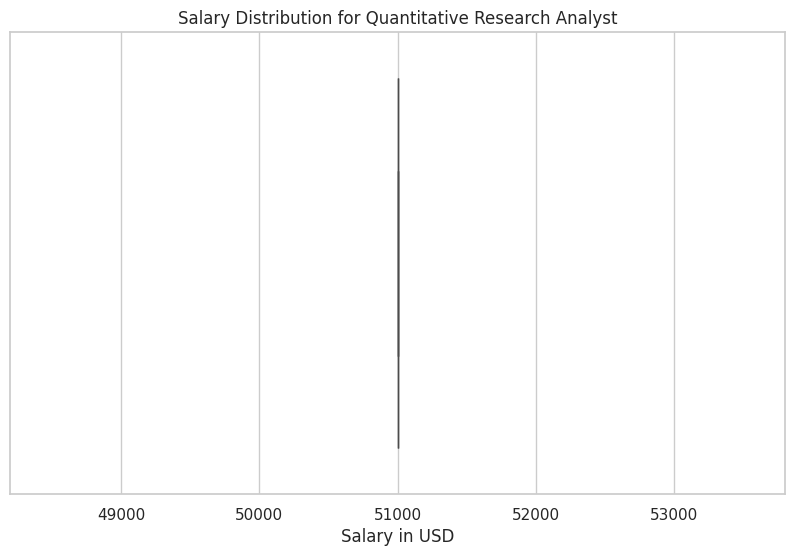

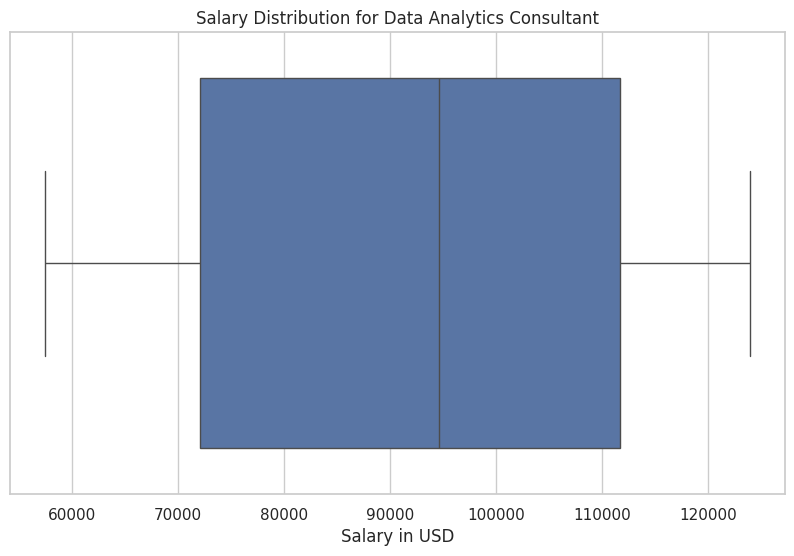

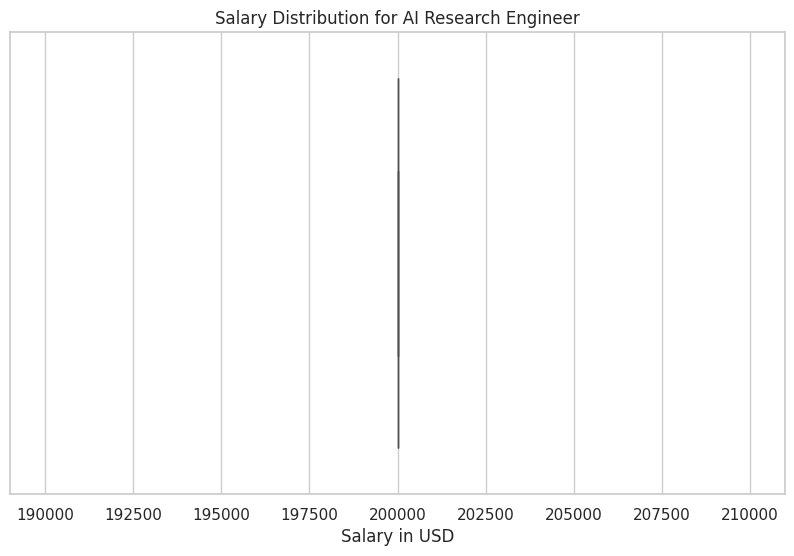

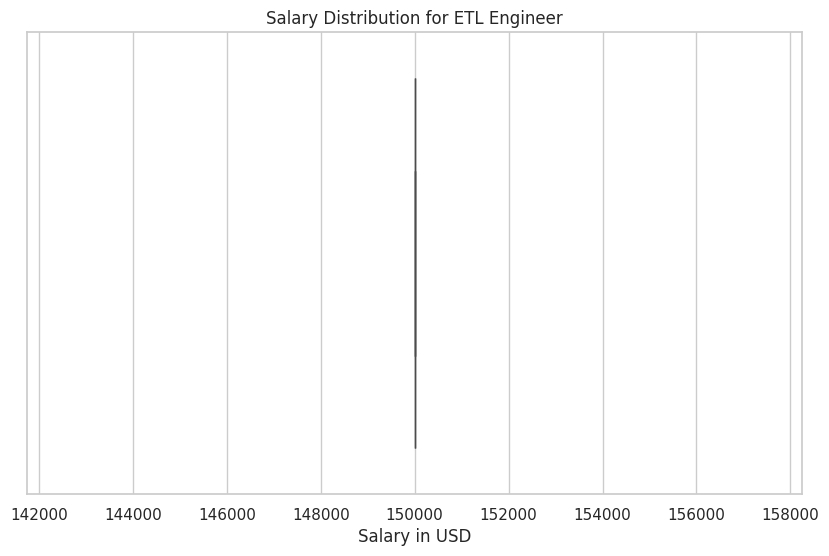

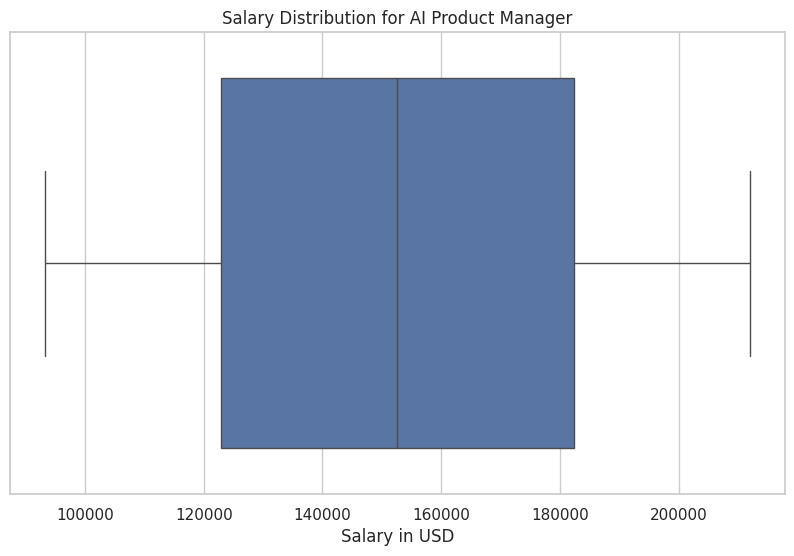

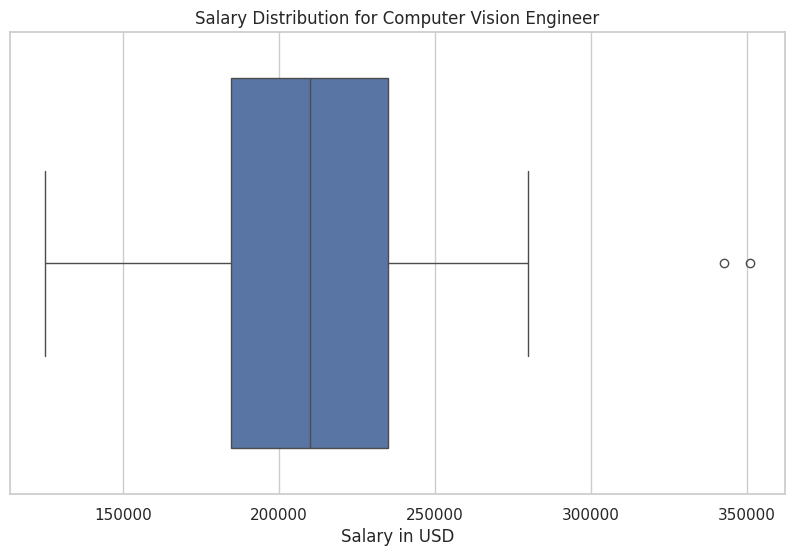

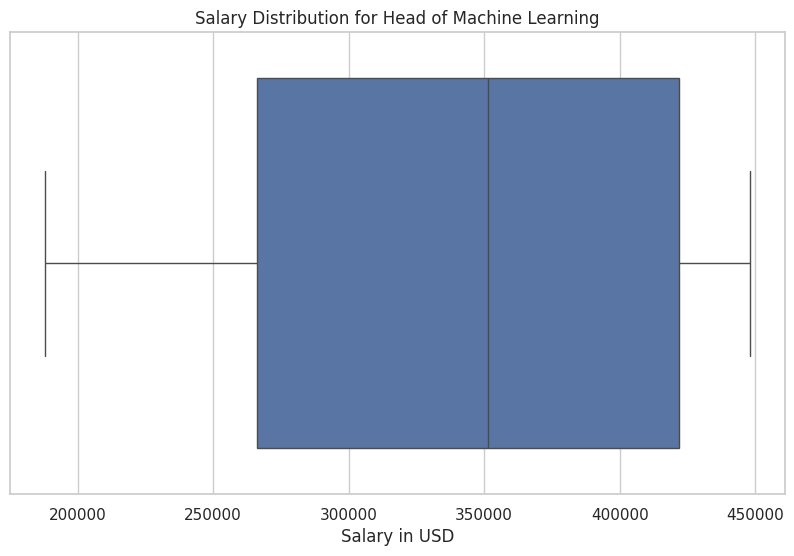

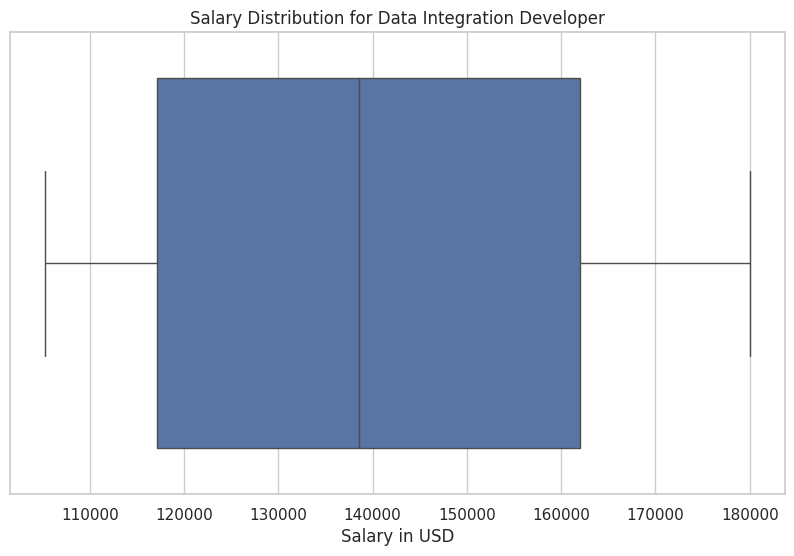

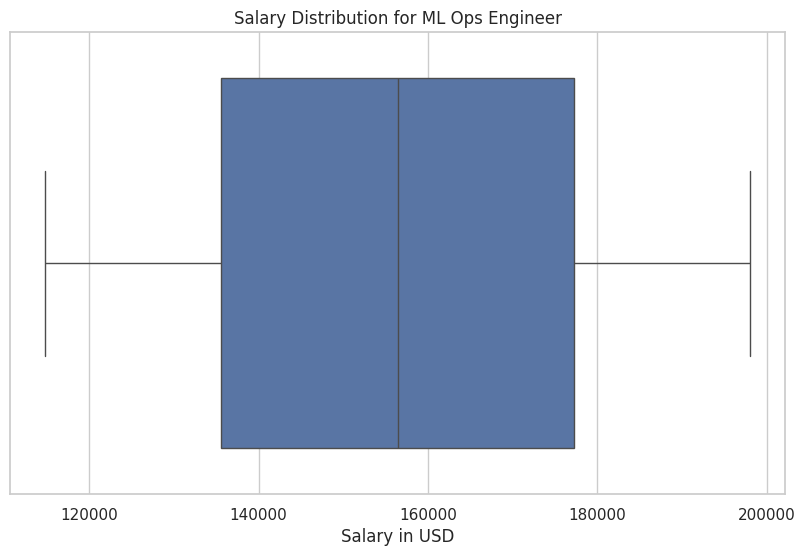

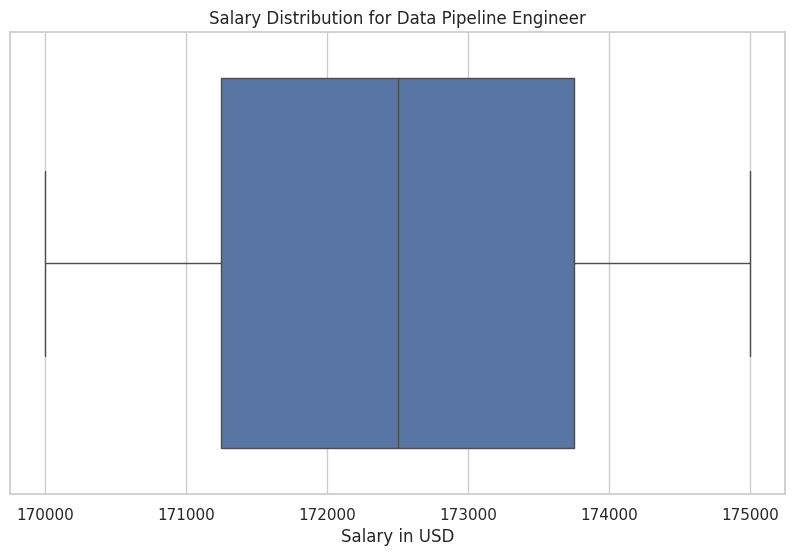

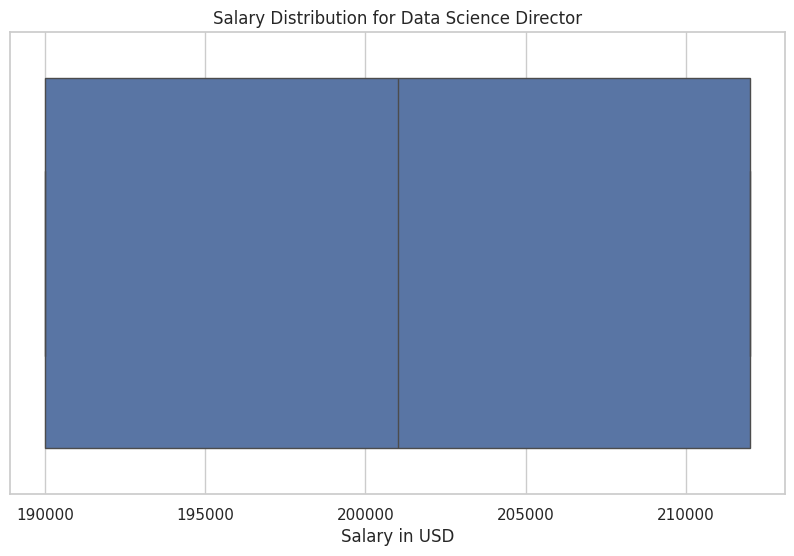

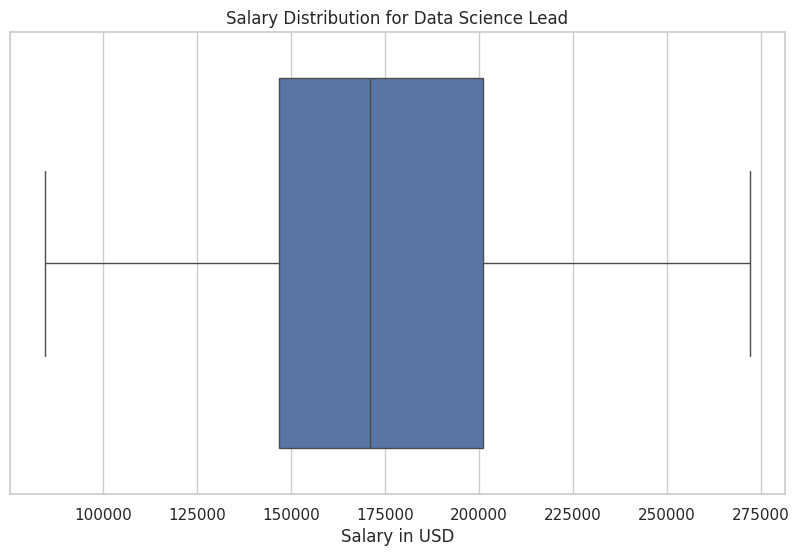

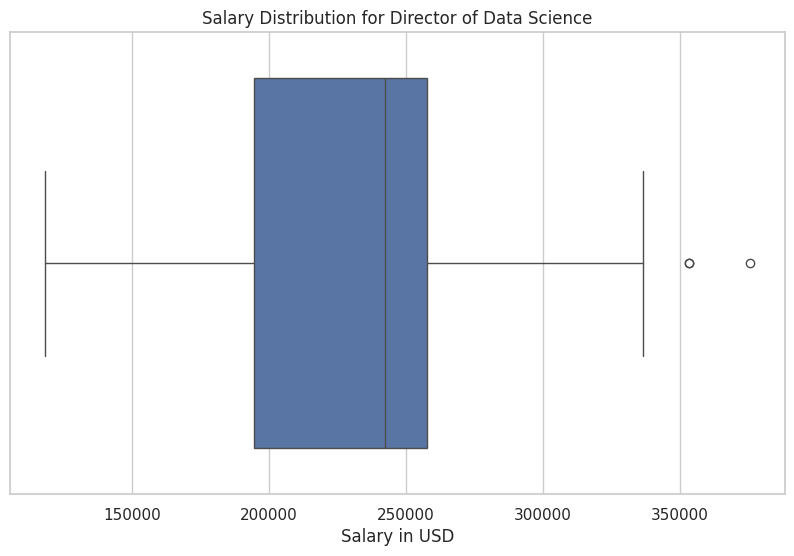

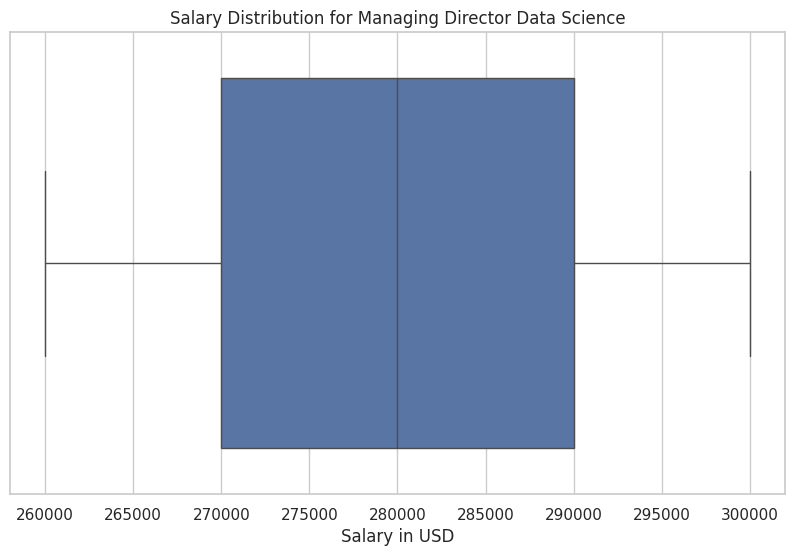

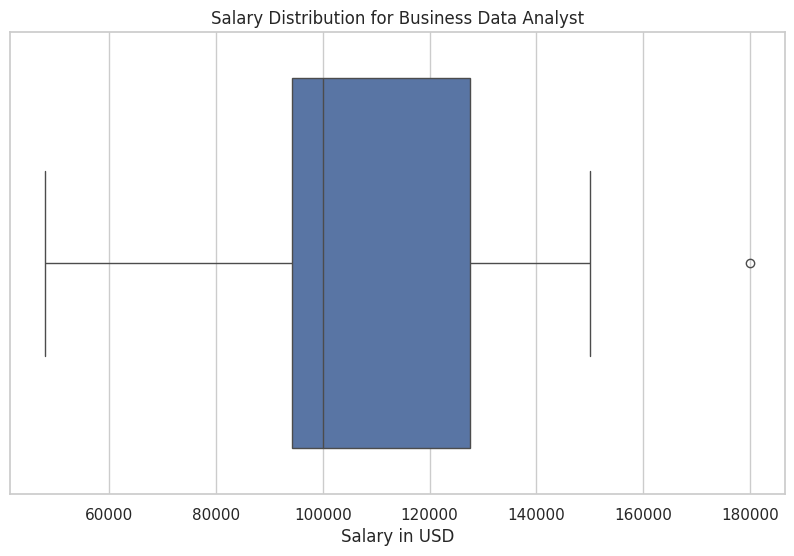

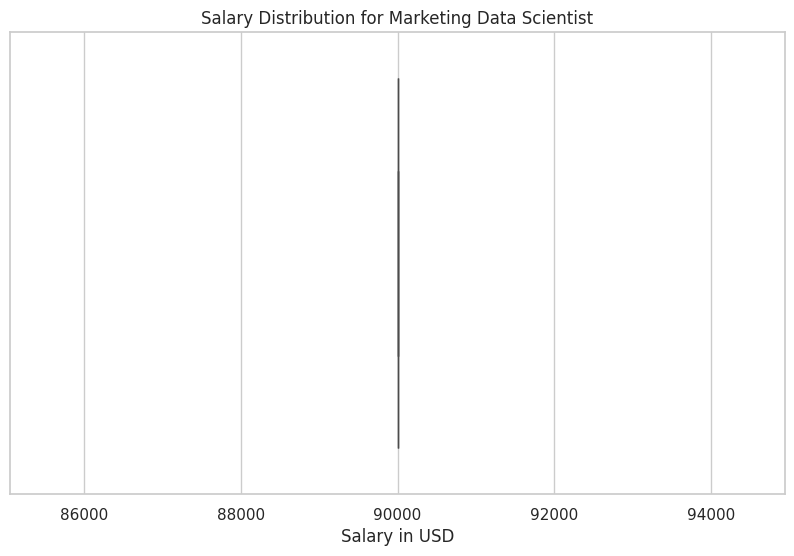

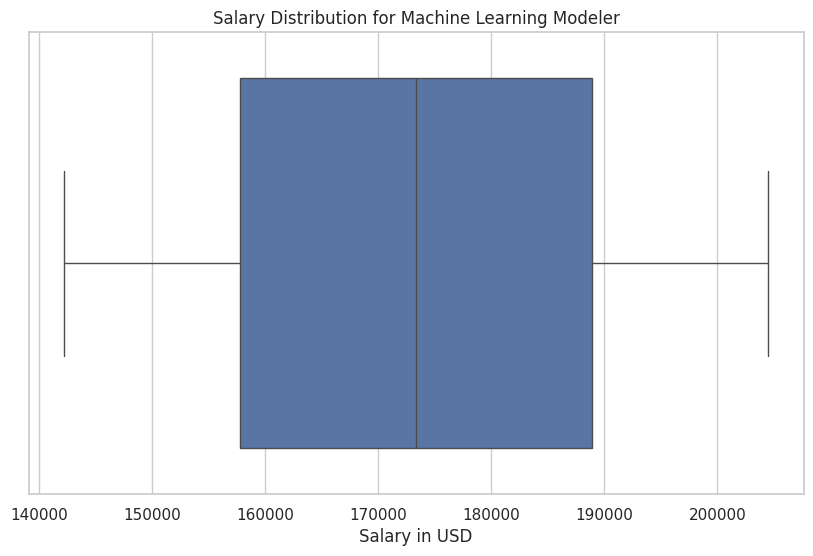

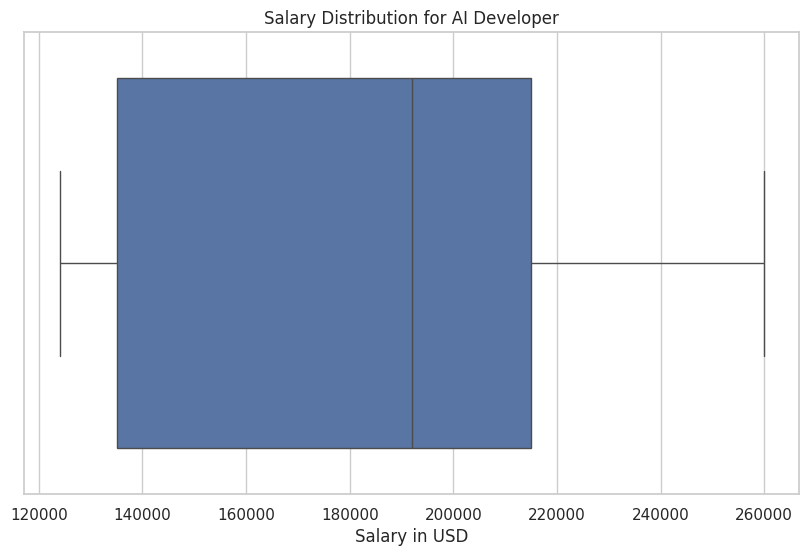

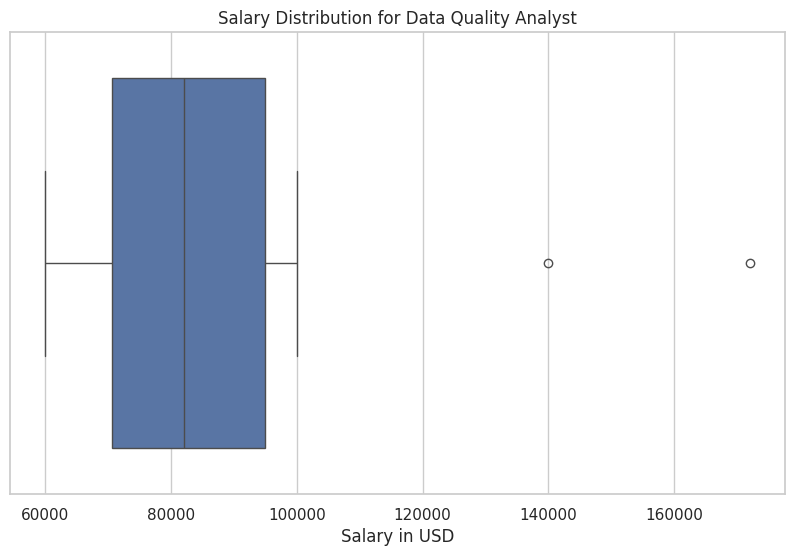

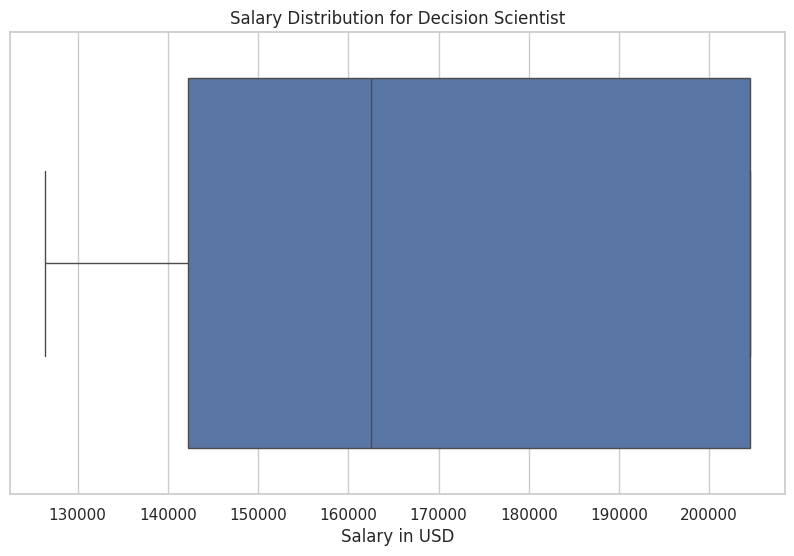

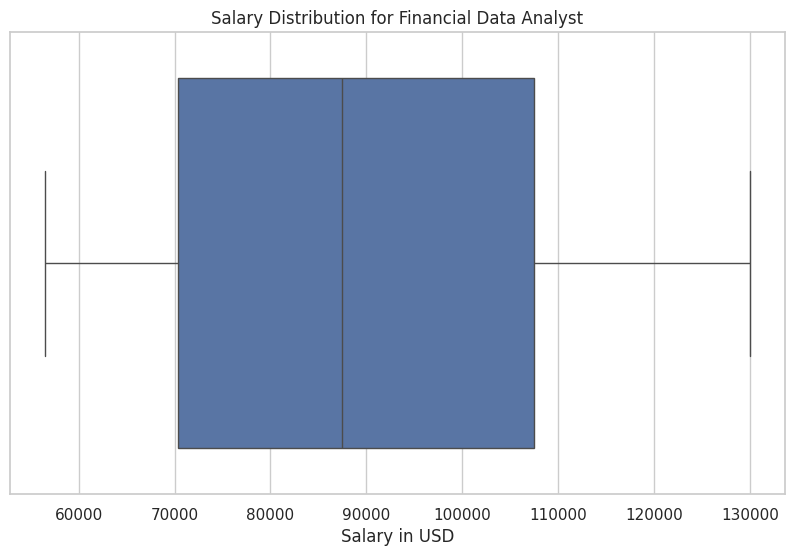

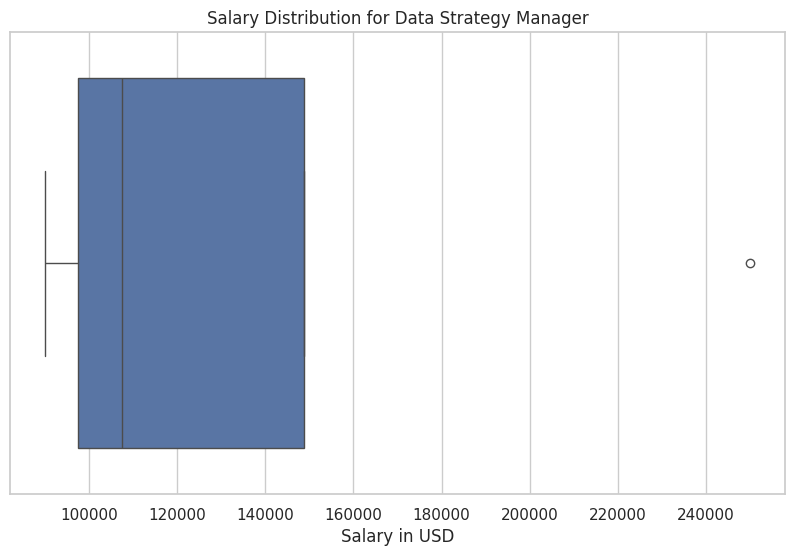

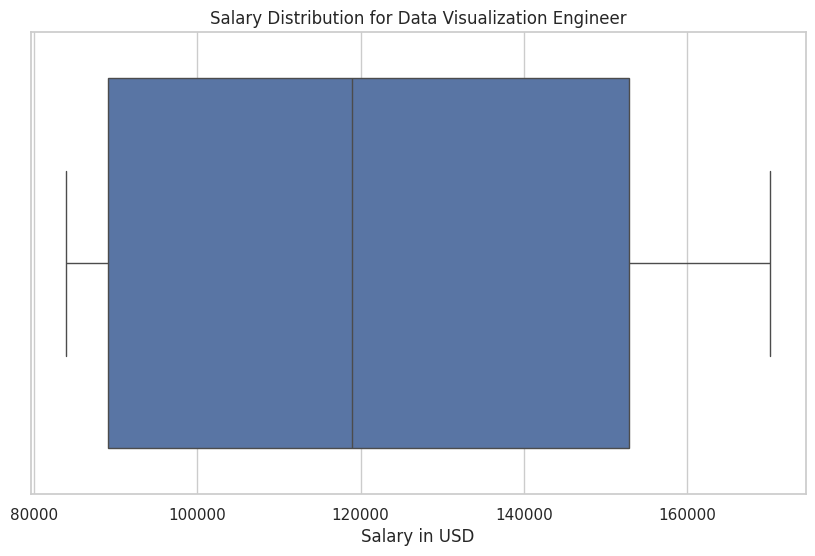

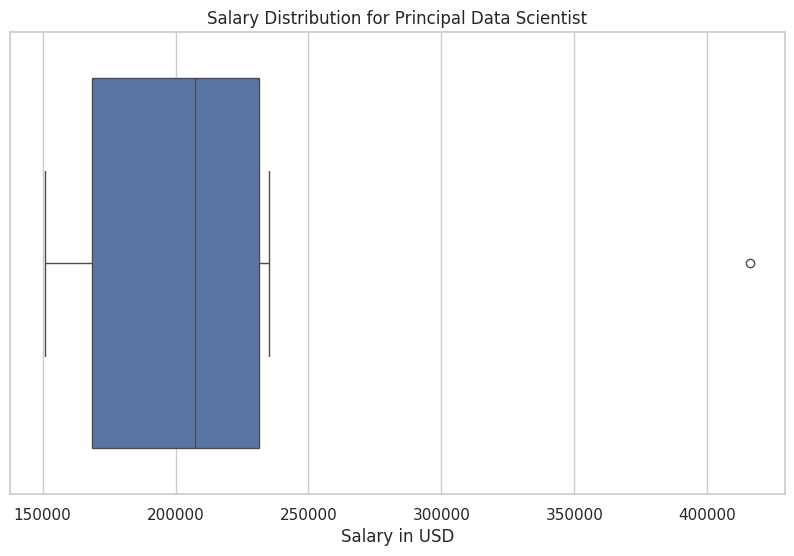

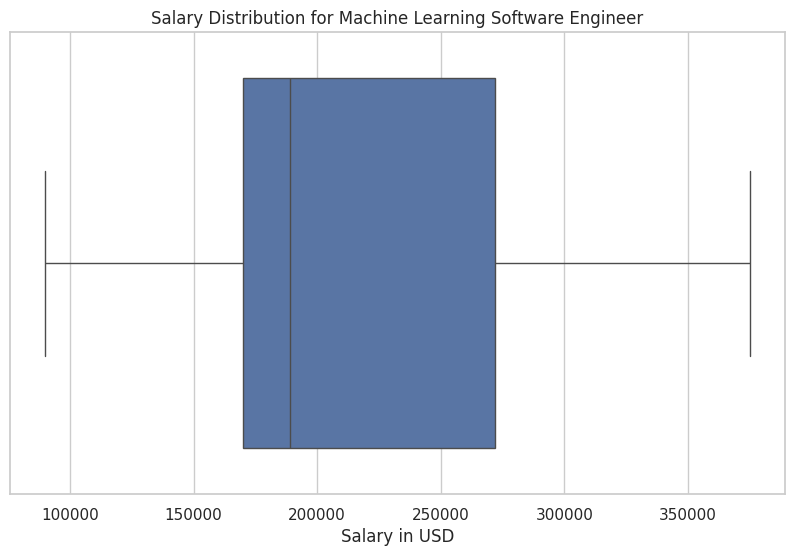

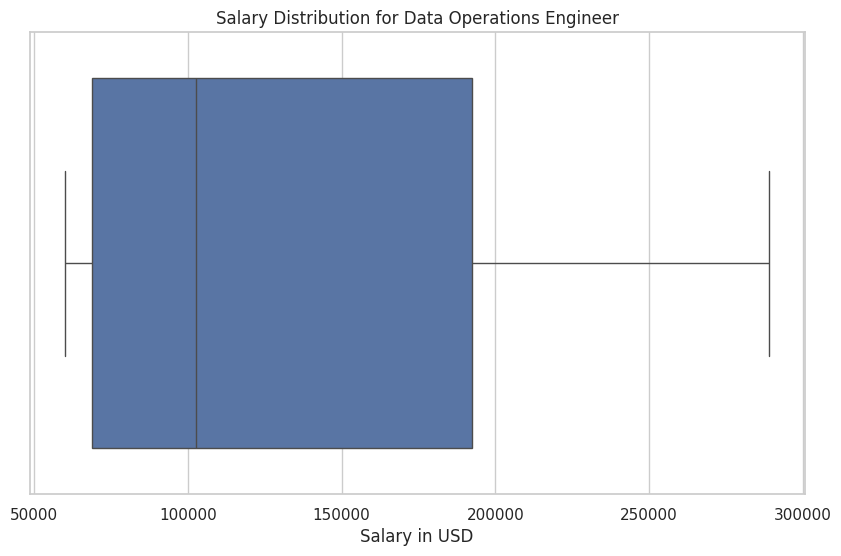

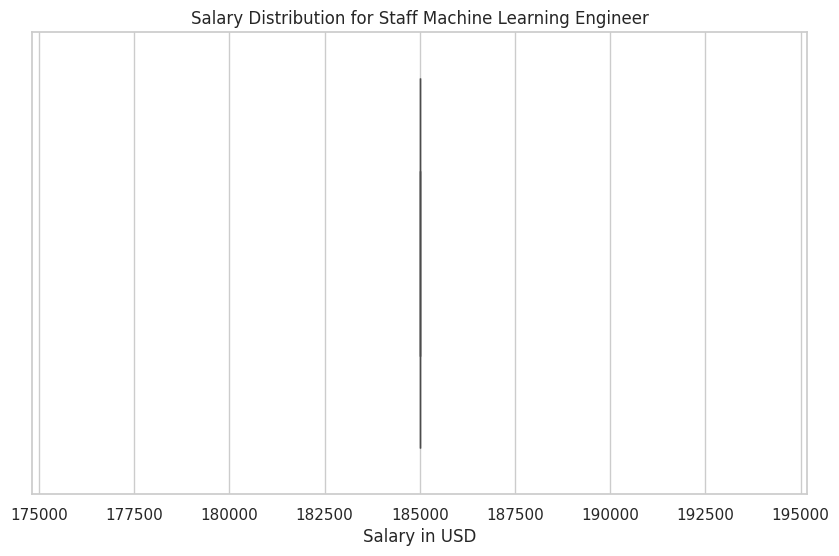

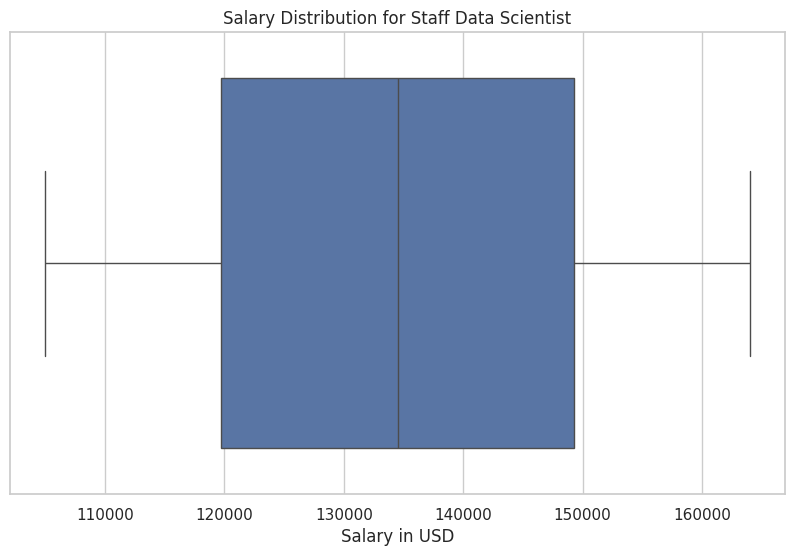

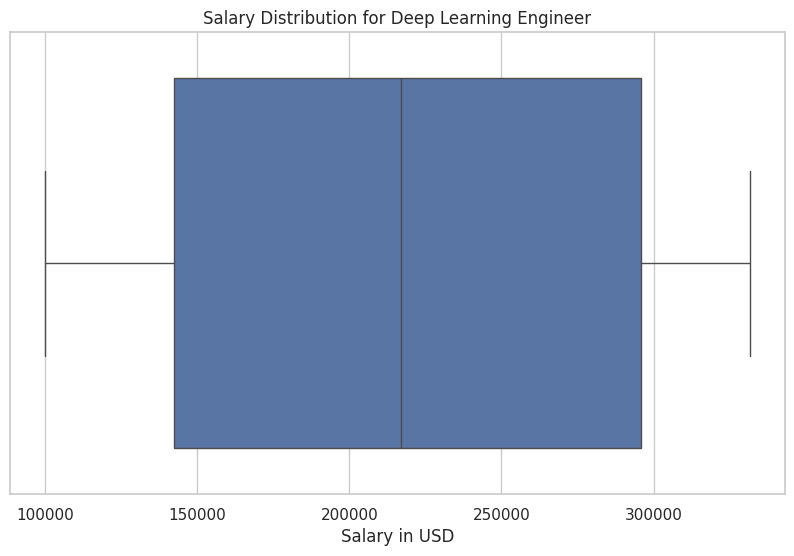

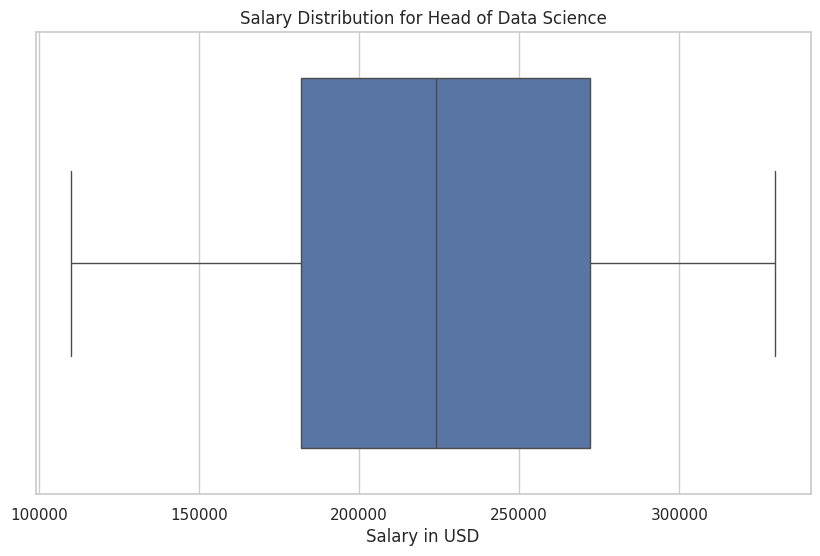

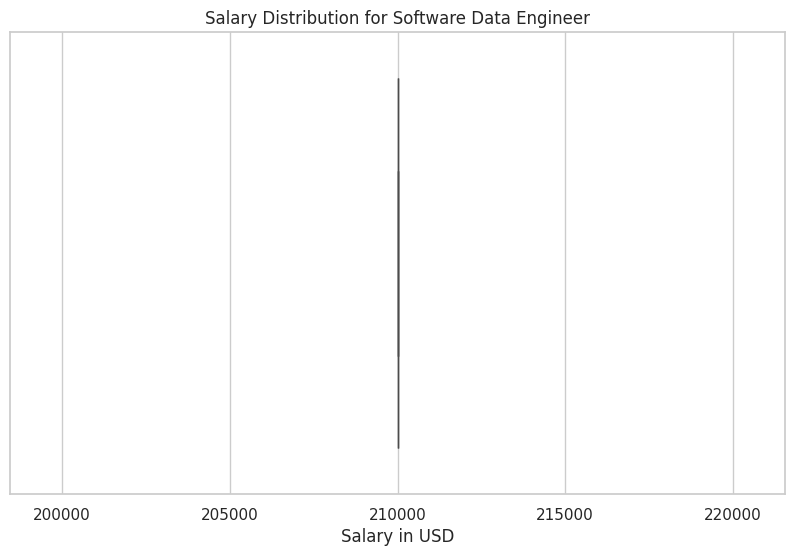

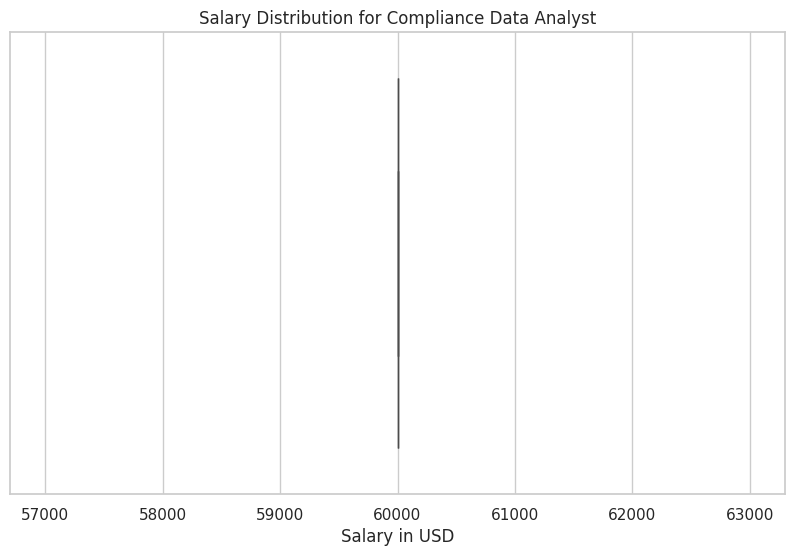

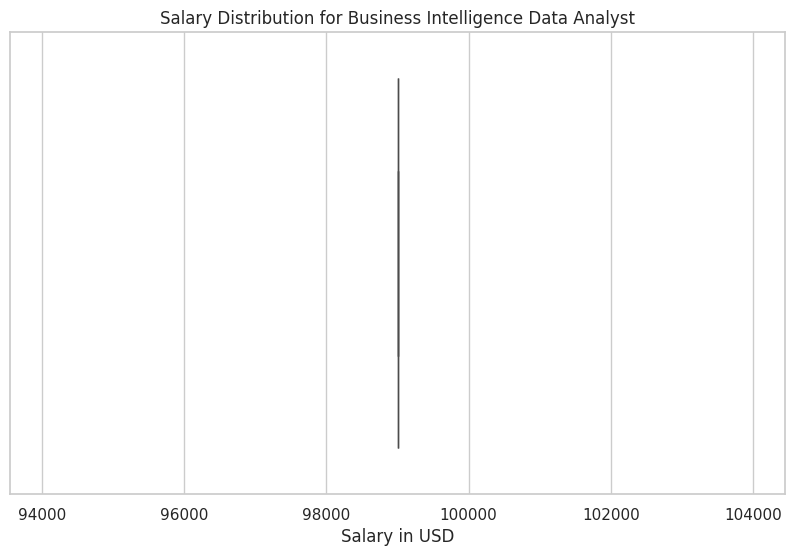

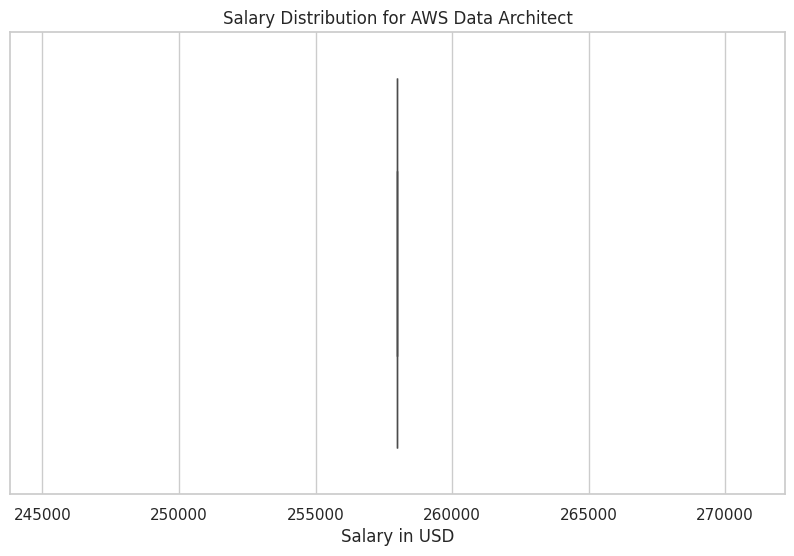

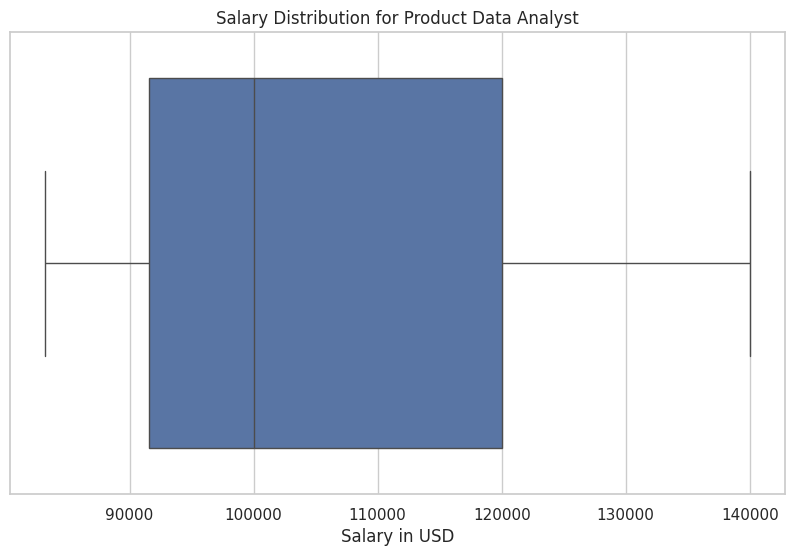

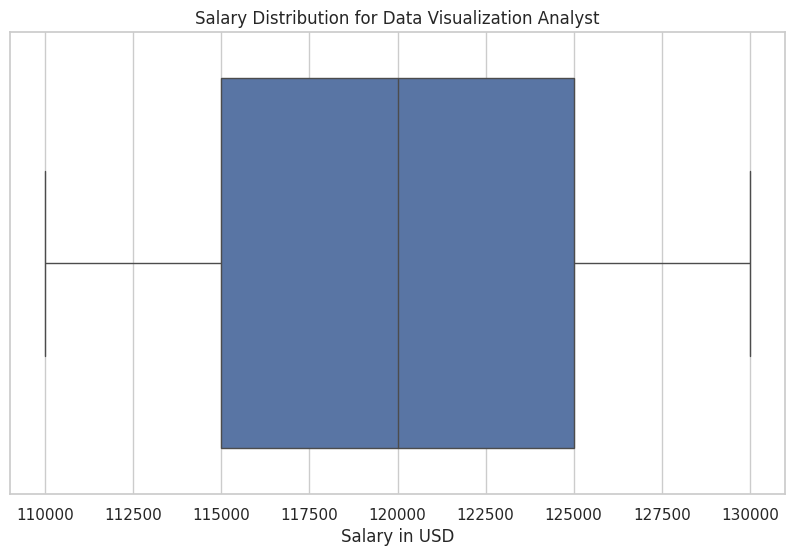

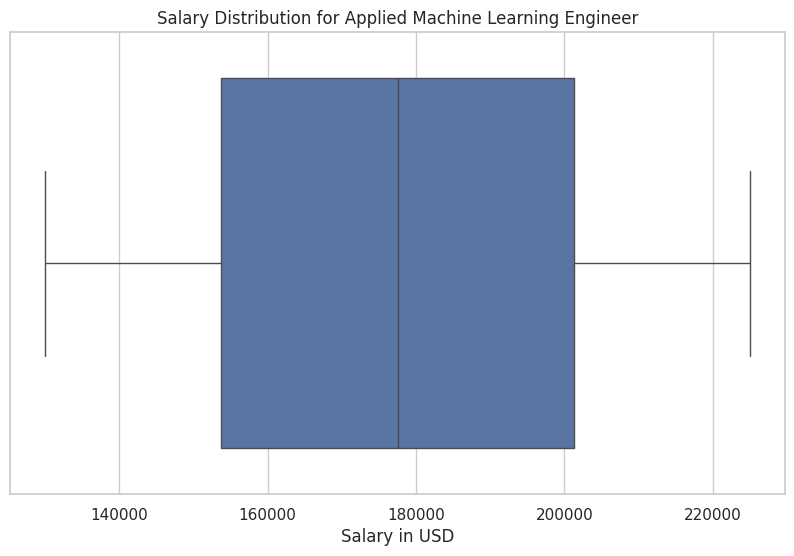

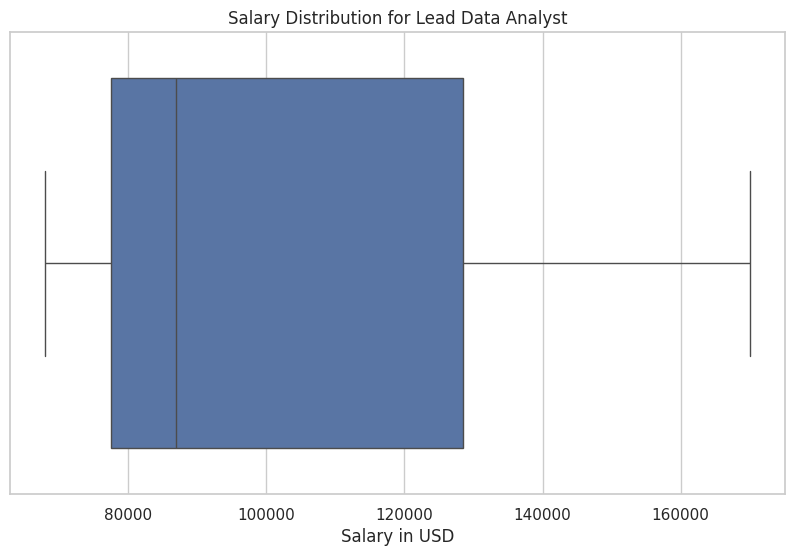

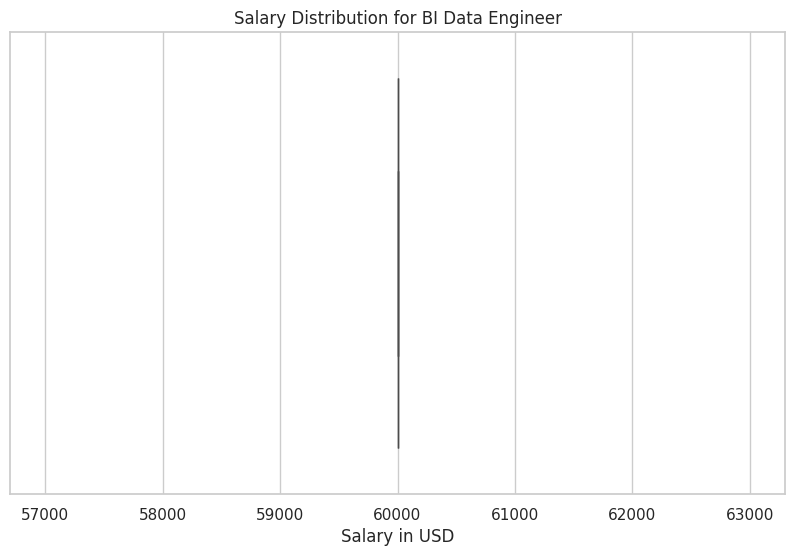

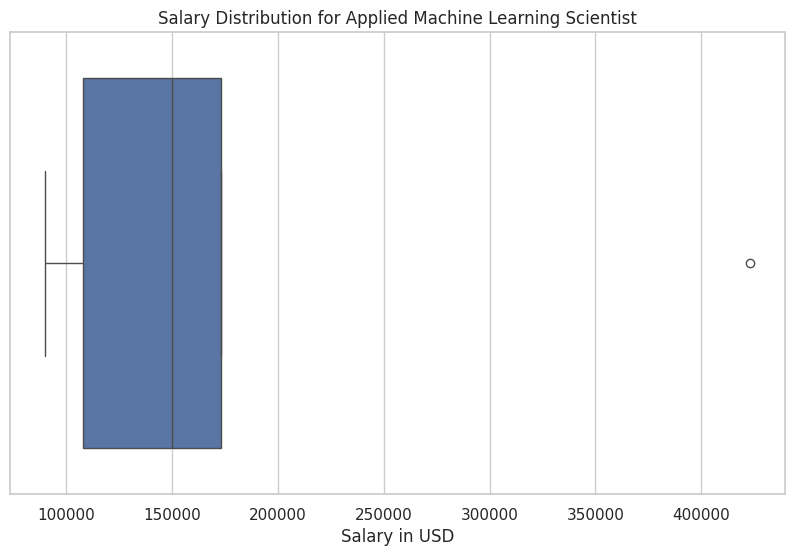

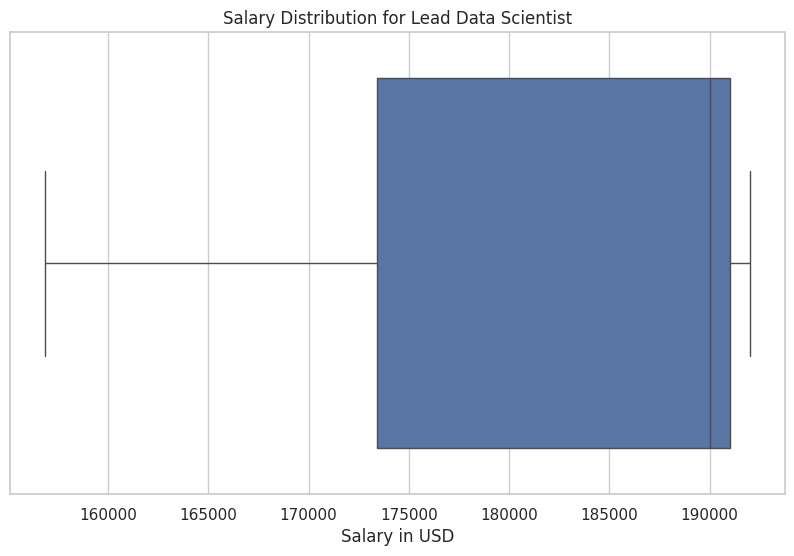

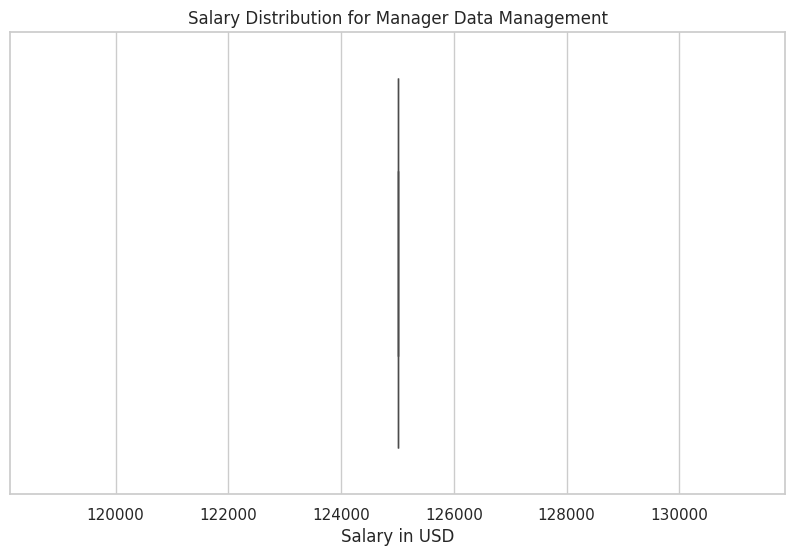

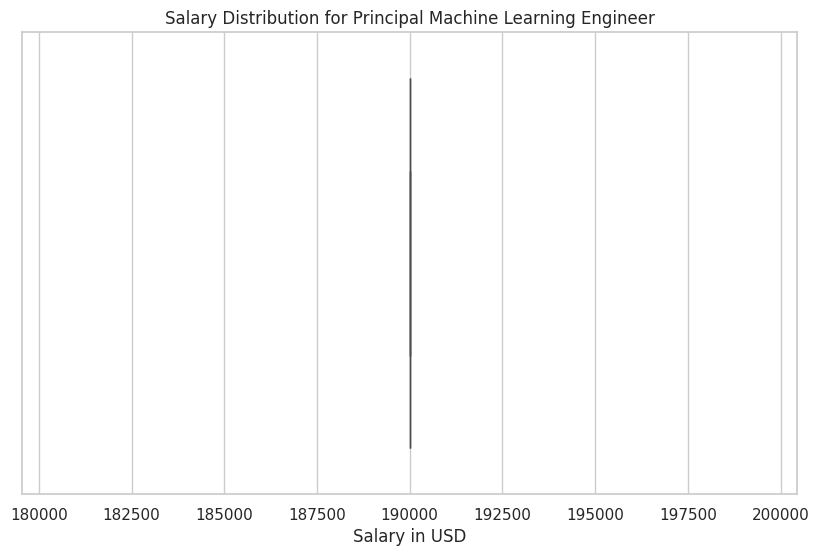

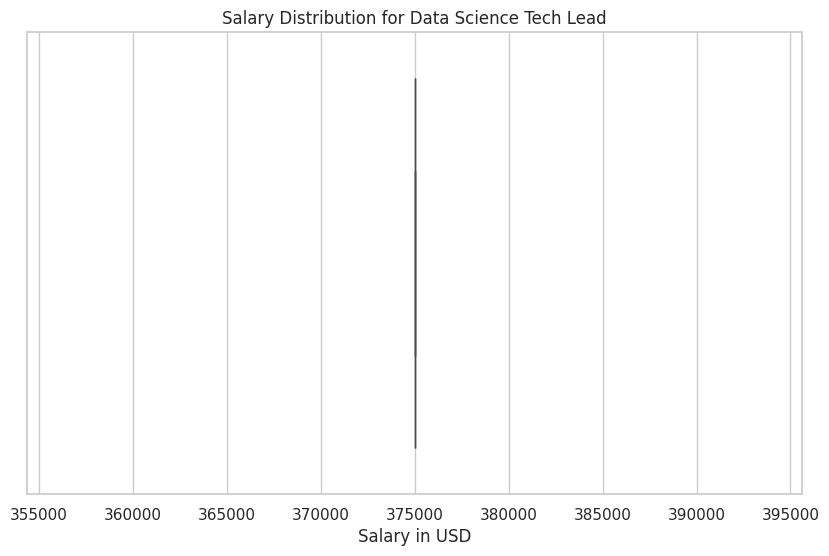

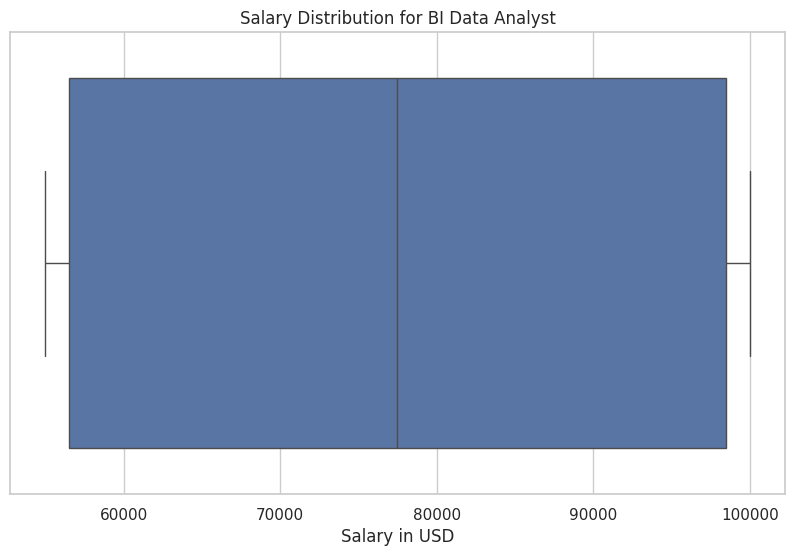

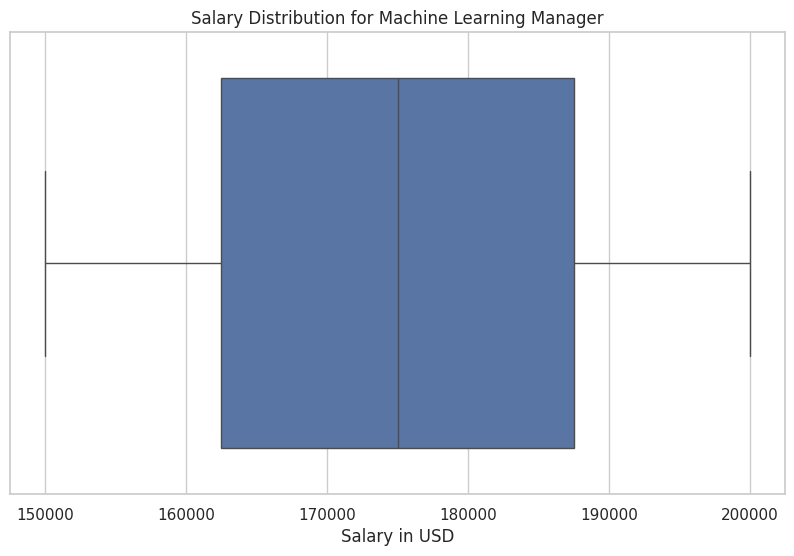

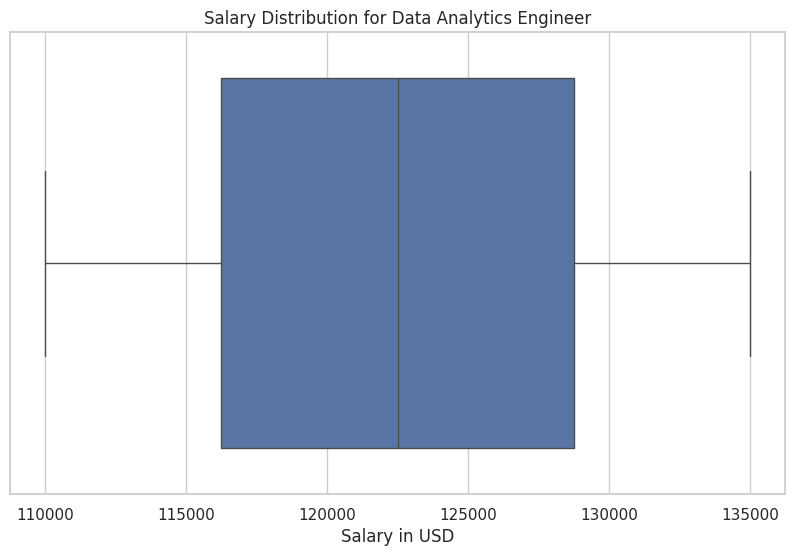

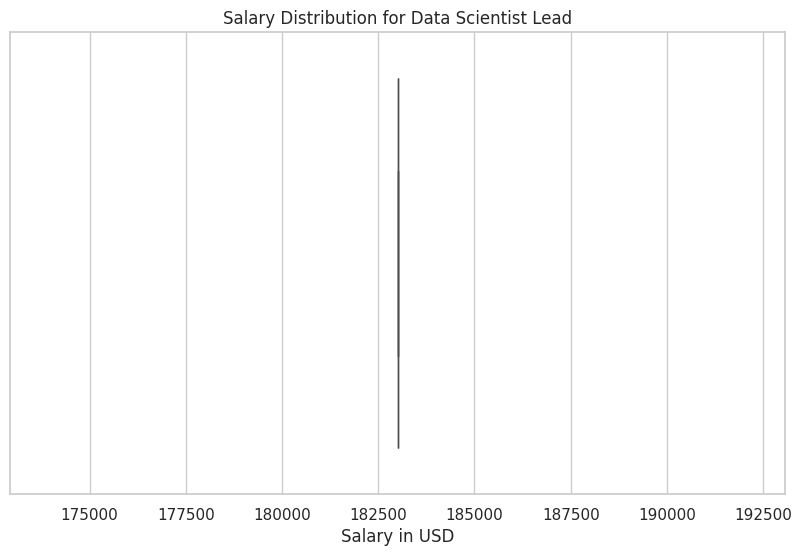

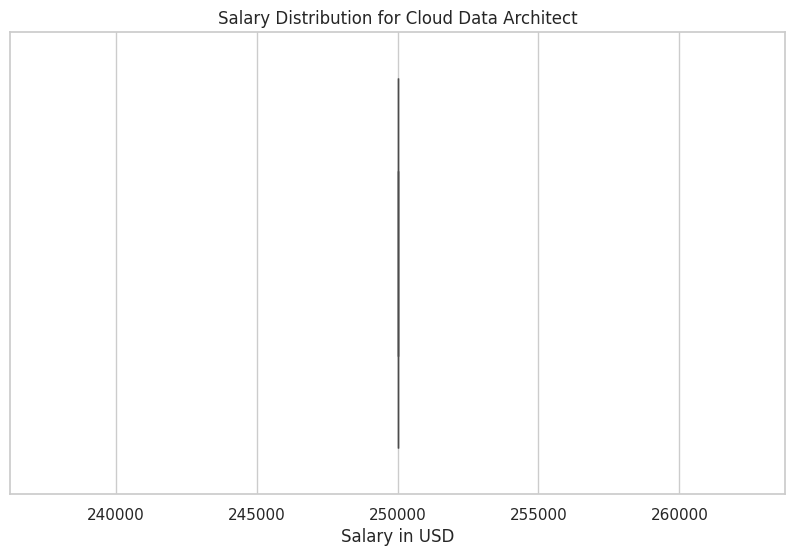

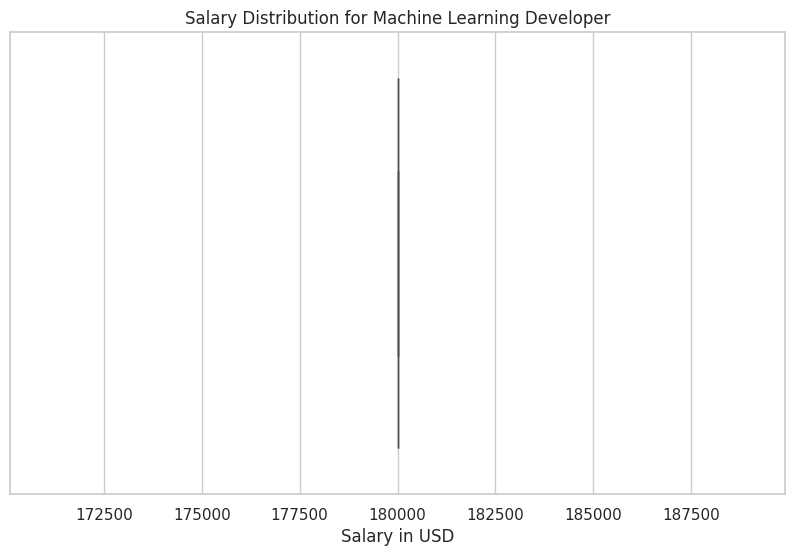

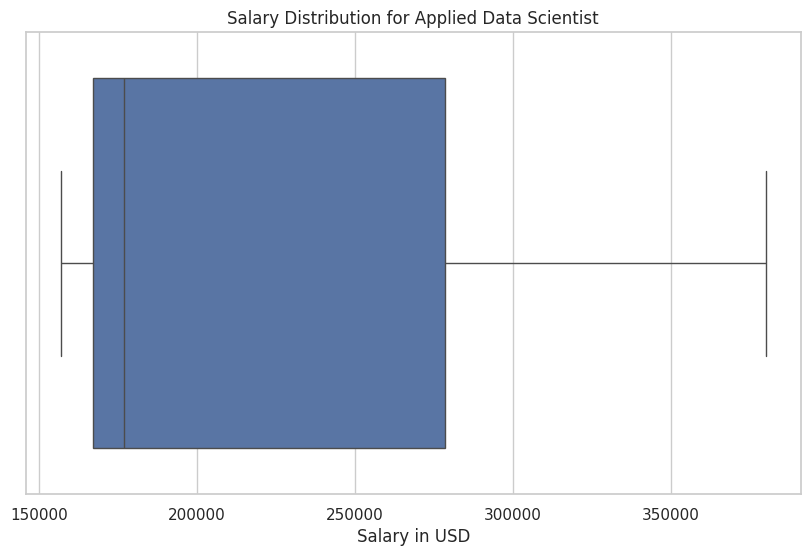

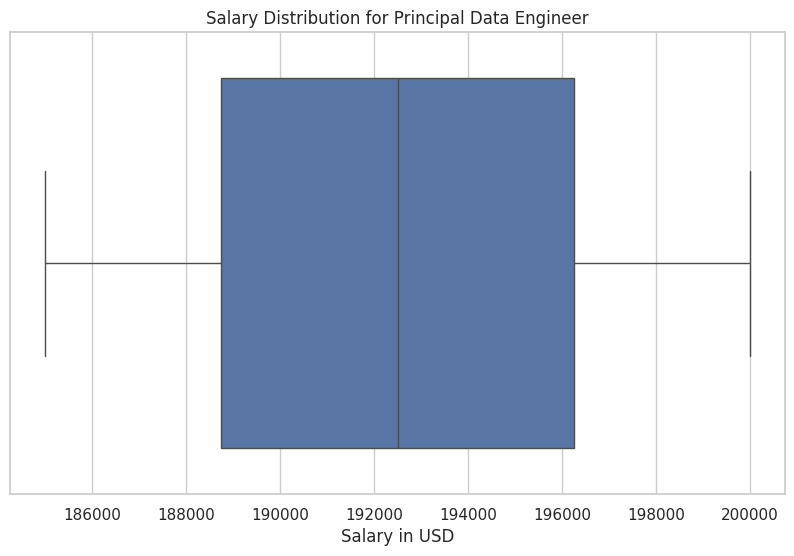

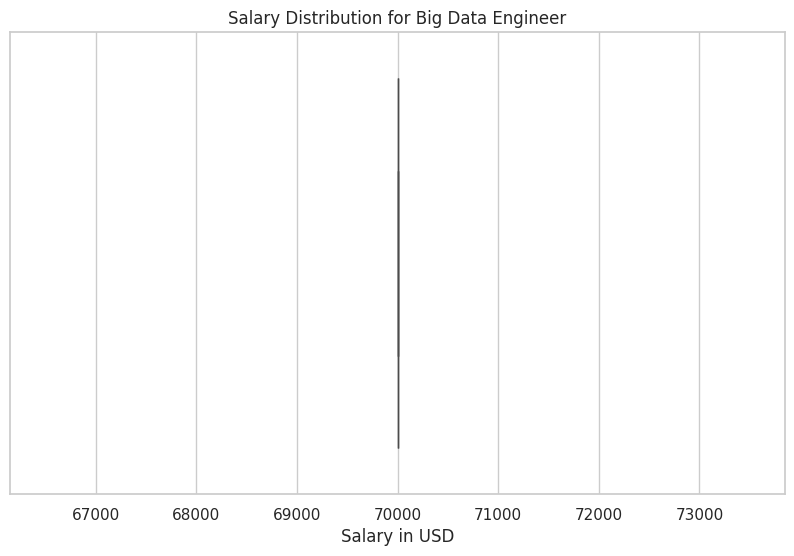

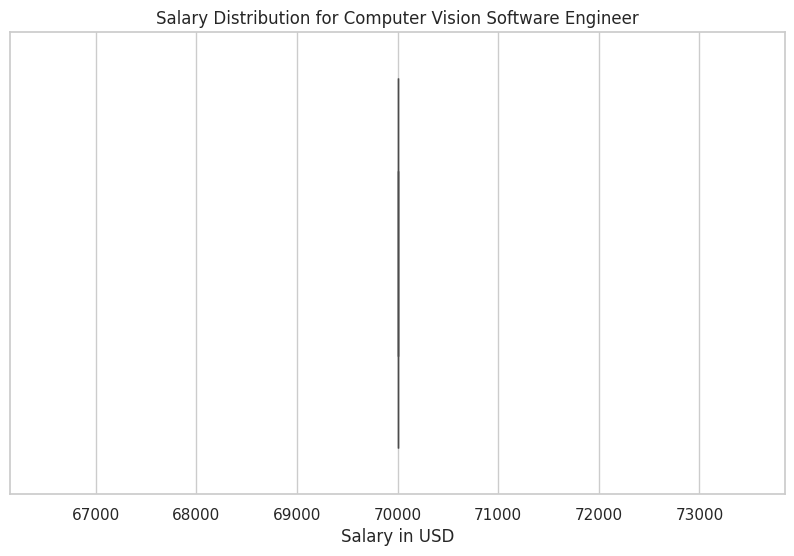

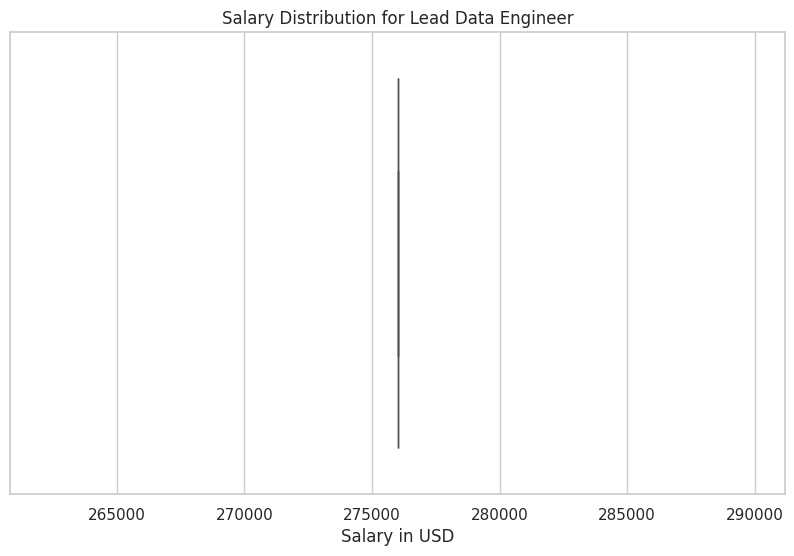

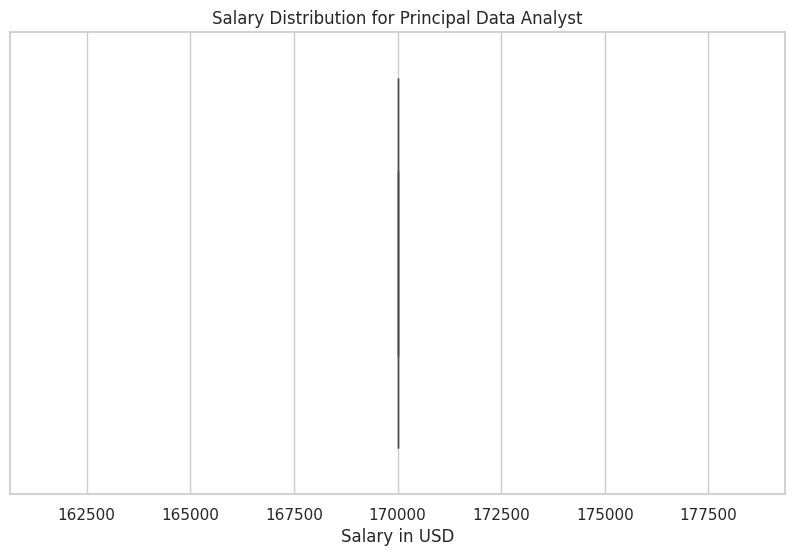

Box plots for each unique job title generated successfully.


In [ ]:
plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")

for i, title in enumerate(unique_job_titles):
    plt.figure(figsize=(10, 6)) # Create a new figure for each box plot
    sns.boxplot(x=df_cleaned[df_cleaned['job_title'] == title]['salary_in_usd'])
    plt.title(f'Salary Distribution for {title}')
    plt.xlabel('Salary in USD')
    plt.show()
print("Box plots for each unique job title generated successfully.")

**Reasoning**:
To fulfill the main task's requirement of finding the EDA mean, median, mode, and range of salaries for each job title, I will calculate these statistics using the `groupby()` method on `job_title` and `agg()` function on `salary_in_usd` from the `df_cleaned` DataFrame. The 'range' will be calculated by subtracting the minimum from the maximum salary.



In [ ]:
salary_statistics = df_cleaned.groupby('job_title')['salary_in_usd'].agg(
    mean='mean',
    median='median',
    min_salary='min',
    max_salary='max'
)
salary_statistics['range'] = salary_statistics['max_salary'] - salary_statistics['min_salary']

def get_mode(series):
    modes = series.mode()
    if len(modes) == 1:
        return modes[0]
    return list(modes)

mode_salaries = df_cleaned.groupby('job_title')['salary_in_usd'].apply(get_mode)
salary_statistics['mode'] = mode_salaries

print("EDA Statistics for Salary by Job Title:")
print(salary_statistics.to_string())


EDA Statistics for Salary by Job Title:
                                                   mean    median  min_salary  max_salary   range                                                                                          mode
job_title                                                                                                                                                                                      
AI Architect                              235694.230769  204000.0       99750      449000  349250                                                                              [204000, 330000]
AI Developer                              182285.714286  192000.0      124000      260000  136000                                      [124000, 130000, 140000, 192000, 200000, 230000, 260000]
AI Engineer                               172832.900990  170000.0       65000      400000  335000                                                                               [93300, 212000]


## Summary:

### Data Analysis Key Findings
*   A total of 131 unique job titles were identified within the `df_cleaned` DataFrame.
*   Box plots were successfully generated for each of the 131 unique job titles, illustrating the distribution of `salary_in_usd` for each role.
*   Detailed salary statistics for each job title were computed and presented, including the mean, median, mode, minimum, maximum, and range of `salary_in_usd`.

### Insights or Next Steps
*   The large number of unique job titles indicates a diverse dataset, suggesting that further categorization or grouping of similar job titles might be beneficial for a higher-level analysis of salary trends.
*   Leverage the generated box plots and statistical summaries to identify specific job titles with notably high or low average salaries, significant salary ranges, or unusual distributions (e.g., presence of outliers), which could warrant deeper investigation.


We didn't realise how many different job titles there were, so generating individual box and whisker plots is not really an appropriate way to analyse the data. Instead, we will find out the density of each of these job titles. Ai prompt == "Please generate a table of each job_title and count the number of data cells associated with each title".

In [ ]:
job_title_counts = df_cleaned['job_title'].value_counts()
print("Count of each Job Title:")
print(job_title_counts.to_string())

Count of each Job Title:
job_title
Data Engineer                               3081
Data Scientist                              2865
Data Analyst                                2151
Machine Learning Engineer                   1507
Research Scientist                           499
Applied Scientist                            431
Data Architect                               395
Analytics Engineer                           369
Research Engineer                            279
Data Science                                 250
Business Intelligence Engineer               238
Data Manager                                 194
ML Engineer                                  182
Business Intelligence Analyst                160
Machine Learning Scientist                   116
Data Science Manager                         113
Research Analyst                             111
AI Engineer                                  101
Business Intelligence                         96
BI Developer                      

To find out which job titles will not be very statsitically significant in modelling the data, we will find out the IQR and remove the outliers resulting from th is caluclation. AI prompt: "Please find the IQR of the count of the job titles that has just been outputted, and remove the job titles that are outside the 25-75% range".

# Task
Calculate the Interquartile Range (IQR) for the `job_title_counts` Series, identify job titles whose counts fall within this IQR, and then filter the `df_cleaned` DataFrame to include only these selected job titles.

## Calculate IQR for Job Title Counts

### Subtask:
Calculate the first quartile (Q1), third quartile (Q3), and the Interquartile Range (IQR) of the `job_title_counts` Series.


**Reasoning**:
To calculate Q1, Q3, and IQR, I will use the `.quantile()` method on the `job_title_counts` Series for the quartiles and then subtract them to find the IQR. The results will be printed to verify the calculation.



In [ ]:
Q1 = job_title_counts.quantile(0.25)
Q3 = job_title_counts.quantile(0.75)
IQR = Q3 - Q1

print(f"First Quartile (Q1): {Q1}")
print(f"Third Quartile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")

First Quartile (Q1): 2.0
Third Quartile (Q3): 24.5
Interquartile Range (IQR): 22.5


## Filter Job Titles by IQR

### Subtask:
Identify job titles whose counts fall within the calculated IQR range (between Q1 and Q3) and filter the `df_cleaned` DataFrame to include only these selected job titles.

#### Instructions
1. Create a list of job titles whose counts (from `job_title_counts`) are greater than or equal to `Q1` and less than or equal to `Q3`.
2. Filter the `df_cleaned` DataFrame to retain only the rows where the `job_title` is in the list of selected job titles.
3. Display the head of the new filtered DataFrame.

**Reasoning**:
To filter job titles by IQR, I will first identify the job titles whose counts fall within the calculated Q1 and Q3 range, then filter the `df_cleaned` DataFrame based on these selected titles, and finally display the head of the resulting DataFrame.



In [ ]:
selected_job_titles = job_title_counts[(job_title_counts >= Q1) & (job_title_counts <= Q3)].index.tolist()
df_filtered_by_iqr = df_cleaned[df_cleaned['job_title'].isin(selected_job_titles)]

print(f"Number of job titles within IQR: {len(selected_job_titles)}")
print("First 5 rows of the DataFrame filtered by IQR:")
print(df_filtered_by_iqr.head())

Number of job titles within IQR: 75
First 5 rows of the DataFrame filtered by IQR:
    work_year experience_level employment_type                    job_title  \
12       2024               EX              FT                 NLP Engineer   
13       2024               EX              FT                 NLP Engineer   
26       2024               MI              FT      Data Operations Manager   
27       2024               MI              FT      Data Operations Manager   
68       2024               MI              FT  Data Integration Specialist   

    salary_in_usd  remote_ratio company_location company_size  
12         200000             0               US            M  
13         150000             0               US            M  
26         150000             0               US            M  
27         125000             0               US            M  
68         115000           100               US            M  


## Calculate and Display EDA Statistics for Filtered Job Titles

### Subtask:
Calculate the mean, median, mode, minimum, maximum, and range of 'salary_in_usd' for each unique job title in the 'df_filtered_by_iqr' DataFrame and display the results.


**Reasoning**:
To calculate the specified EDA statistics for each job title, I will group the `df_filtered_by_iqr` DataFrame by 'job_title', use the `agg` function to compute mean, median, min, and max salaries, calculate the range, and define a custom function for mode(s) to include in the statistics.



In [ ]:
filtered_salary_statistics = df_filtered_by_iqr.groupby('job_title')['salary_in_usd'].agg(
    mean='mean',
    median='median',
    min_salary='min',
    max_salary='max'
)
filtered_salary_statistics['range'] = filtered_salary_statistics['max_salary'] - filtered_salary_statistics['min_salary']

def get_mode(series):
    modes = series.mode()
    if len(modes) == 1:
        return modes[0]
    return list(modes)

filtered_mode_salaries = df_filtered_by_iqr.groupby('job_title')['salary_in_usd'].apply(get_mode)
filtered_salary_statistics['mode'] = filtered_mode_salaries

print("EDA Statistics for Salary by Filtered Job Title:")
print(filtered_salary_statistics.to_string())

EDA Statistics for Salary by Filtered Job Title:
                                                 mean    median  min_salary  max_salary   range                                                                                          mode
job_title                                                                                                                                                                                    
AI Developer                            182285.714286  192000.0      124000      260000  136000                                      [124000, 130000, 140000, 192000, 200000, 230000, 260000]
AI Product Manager                      152650.000000  152650.0       93300      212000  118700                                                                               [93300, 212000]
AI Scientist                            156778.100000  163000.0       50000      219000  169000                                                                                        200000
A

We also want the count next to each of the job titles to make sure that we've cleaned the data properly. AI prompt == "Please generate the same filtered job title table but also include a column to count the number of cells for each job tiutl respectively".

In [ ]:
filtered_job_title_counts = df_filtered_by_iqr['job_title'].value_counts()
filtered_salary_statistics['count'] = filtered_job_title_counts

print("EDA Statistics for Salary by Filtered Job Title (with counts):")
print(filtered_salary_statistics.to_string())

EDA Statistics for Salary by Filtered Job Title (with counts):
                                                 mean    median  min_salary  max_salary   range                                                                                          mode  count
job_title                                                                                                                                                                                           
AI Developer                            182285.714286  192000.0      124000      260000  136000                                      [124000, 130000, 140000, 192000, 200000, 230000, 260000]      7
AI Product Manager                      152650.000000  152650.0       93300      212000  118700                                                                               [93300, 212000]      2
AI Scientist                            156778.100000  163000.0       50000      219000  169000                                                      

So since we double-checked the counts, we realised that the data is definitely skewed towards the bottom, and clearly these low numbers are not generalisable so instead we're going to change the range to 100 to 500 counts manually and focus on performing EDA on the job titles that correspond to this range. AI prompt: "Please go back to the original job titles corresponmding to people with employee_residence == US AND salary_currency == USD and create a new dataframe with these data values. Please output the dataframe".

## Calculate Job Title Counts

### Subtask:
Calculate the count of each unique job title in the `df_reverted` DataFrame.


**Reasoning**:
To calculate the count of each unique job title in the `df_reverted` DataFrame, I will use the `.value_counts()` method on the 'job_title' column, store the result in `job_title_counts_reverted`, and then print it.



In [ ]:
job_title_counts_reverted = df_reverted['job_title'].value_counts()
print("Count of each Job Title in df_reverted:")
print(job_title_counts_reverted.to_string())

Count of each Job Title in df_reverted:
job_title
Data Engineer                               3081
Data Scientist                              2865
Data Analyst                                2151
Machine Learning Engineer                   1507
Research Scientist                           499
Applied Scientist                            431
Data Architect                               395
Analytics Engineer                           369
Research Engineer                            279
Data Science                                 250
Business Intelligence Engineer               238
Data Manager                                 194
ML Engineer                                  182
Business Intelligence Analyst                160
Machine Learning Scientist                   116
Data Science Manager                         113
Research Analyst                             111
AI Engineer                                  101
Business Intelligence                         96
BI Developer       

**Reasoning**:
The previous task was to calculate the count of each job title in `df_reverted`. Now, following the updated instruction to filter job titles within the count range of 100 to 500, I will identify those job titles and create a new DataFrame containing only entries for these selected titles. This is necessary to focus the analysis on statistically significant job titles, as individual box plots are not appropriate for a large number of unique job titles.



In [ ]:
min_count = 100
max_count = 500

selected_job_titles_range = job_title_counts_reverted[(job_title_counts_reverted >= min_count) & (job_title_counts_reverted <= max_count)].index.tolist()
df_filtered_by_count = df_reverted[df_reverted['job_title'].isin(selected_job_titles_range)]

print(f"Number of job titles with counts between {min_count} and {max_count}: {len(selected_job_titles_range)}")
print("First 5 rows of the DataFrame filtered by job title count:")
print(df_filtered_by_count.head())

Number of job titles with counts between 100 and 500: 14
First 5 rows of the DataFrame filtered by job title count:
    work_year experience_level employment_type          job_title  salary  \
0        2024               SE              FT        AI Engineer  202730   
1        2024               SE              FT        AI Engineer   92118   
6        2024               MI              FT        ML Engineer  400000   
7        2024               MI              FT        ML Engineer   65000   
18       2024               SE              FT  Applied Scientist  222200   

   salary_currency  salary_in_usd employee_residence  remote_ratio  \
0              USD         202730                 US             0   
1              USD          92118                 US             0   
6              USD         400000                 US             0   
7              USD          65000                 US             0   
18             USD         222200                 US             0   



**Reasoning**:
To visualize the salary distribution for each of the selected job titles (those with counts between 100 and 500), I will generate a box plot for each unique job title in the `df_filtered_by_count` DataFrame using `seaborn` and `matplotlib`.



<Figure size 1500x800 with 0 Axes>

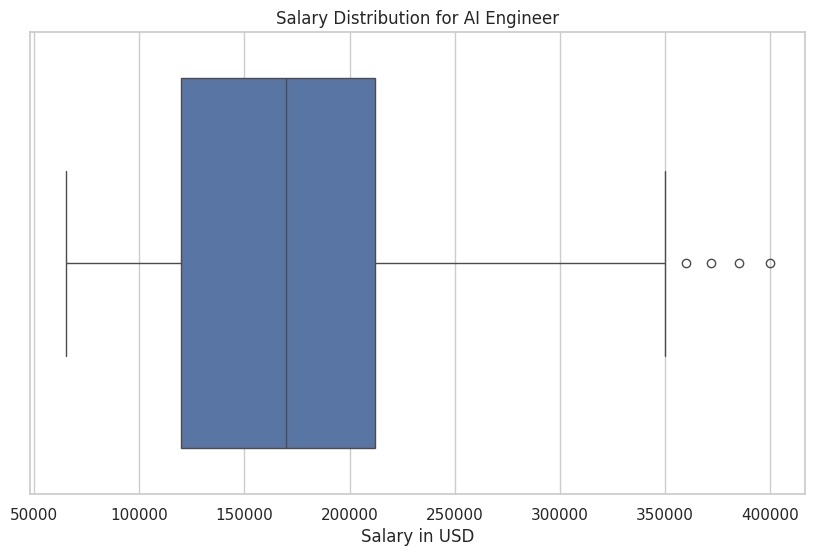

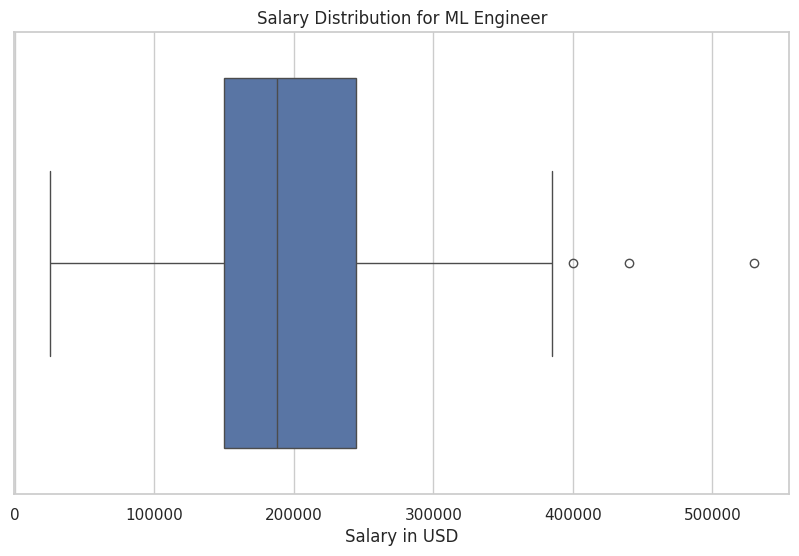

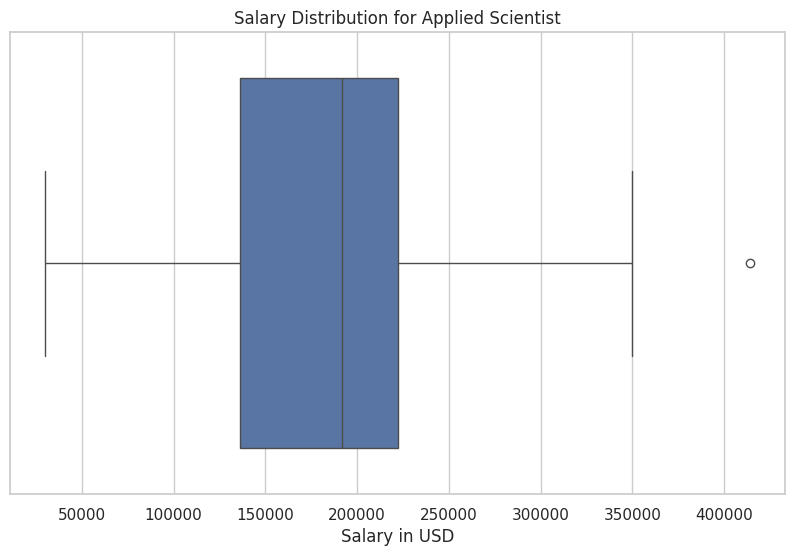

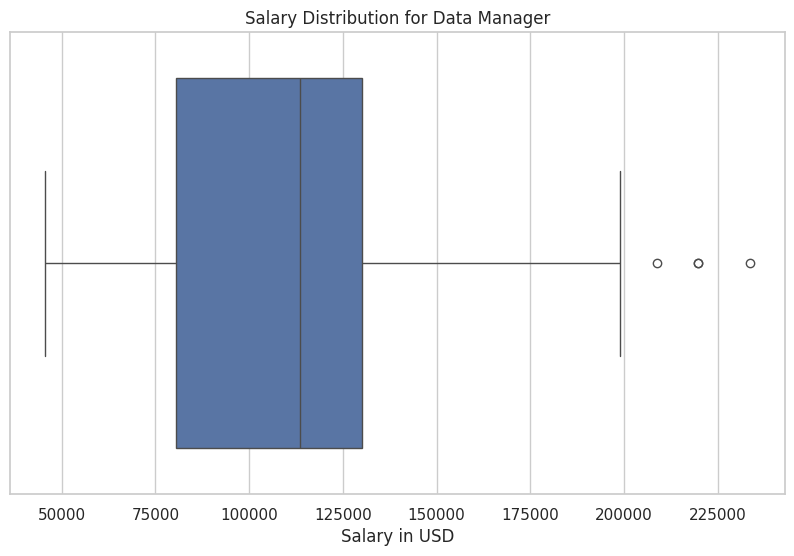

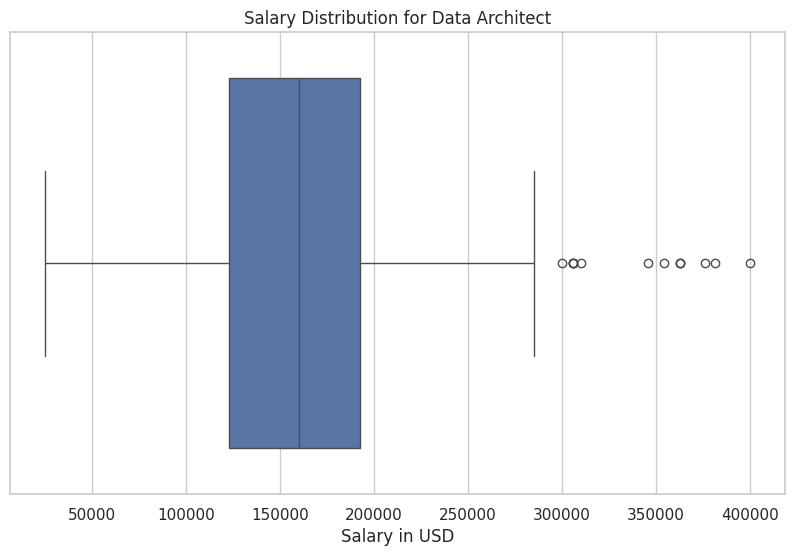

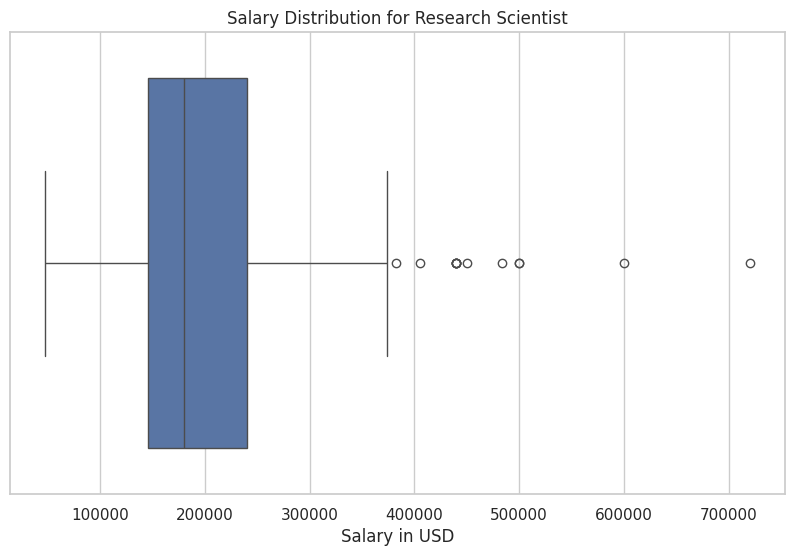

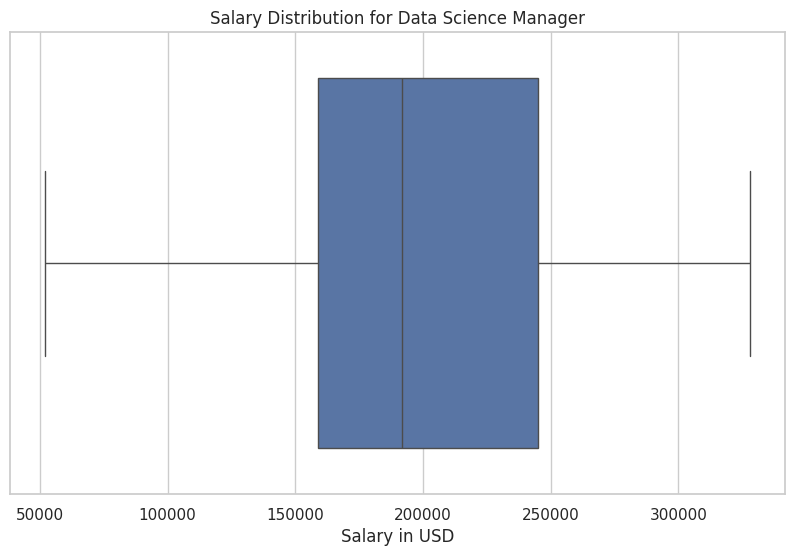

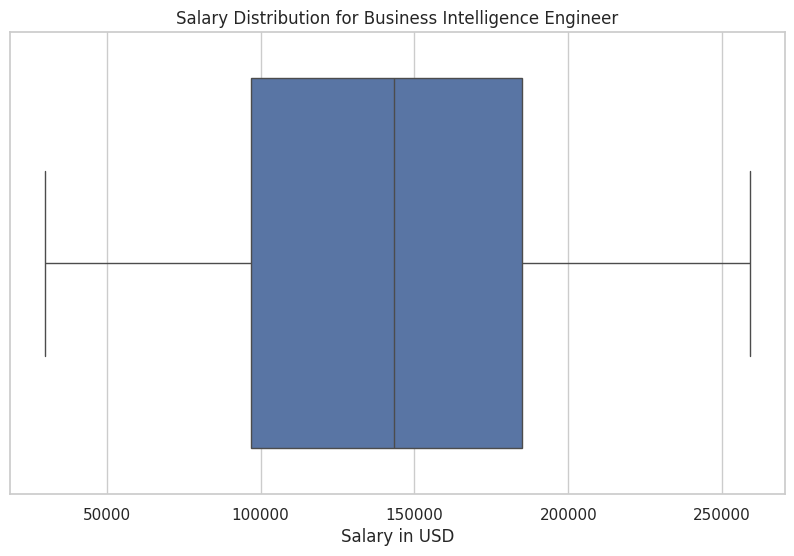

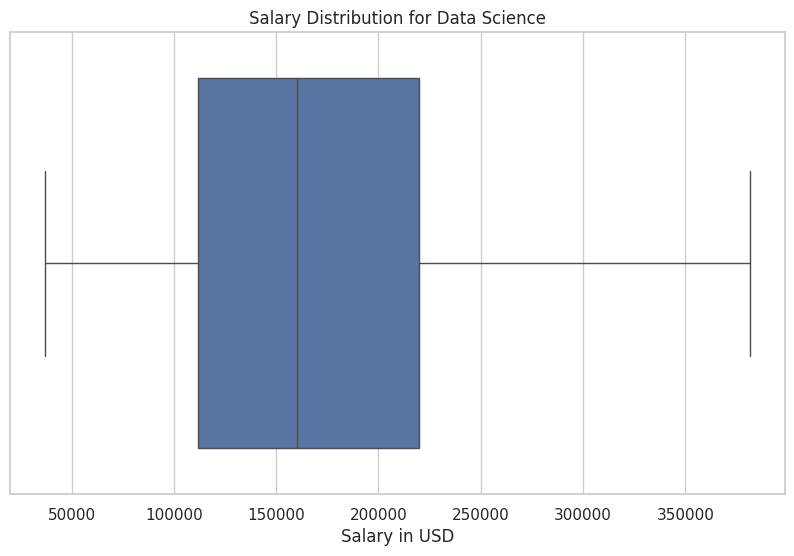

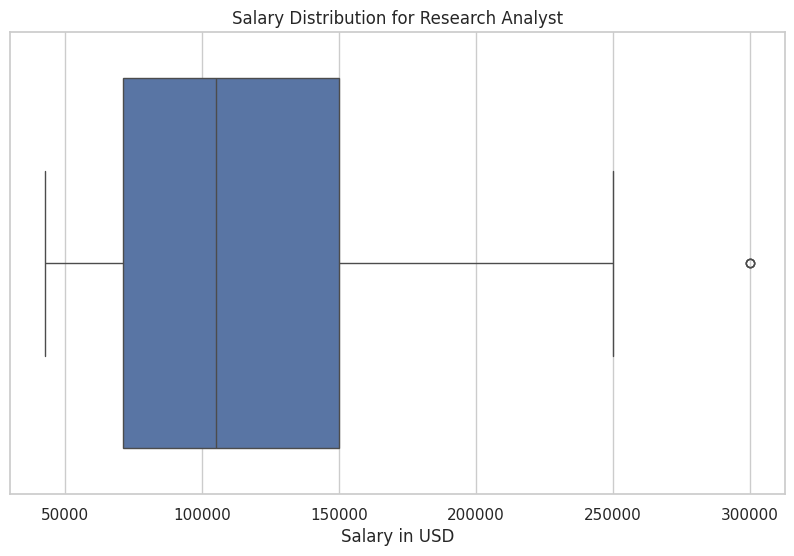

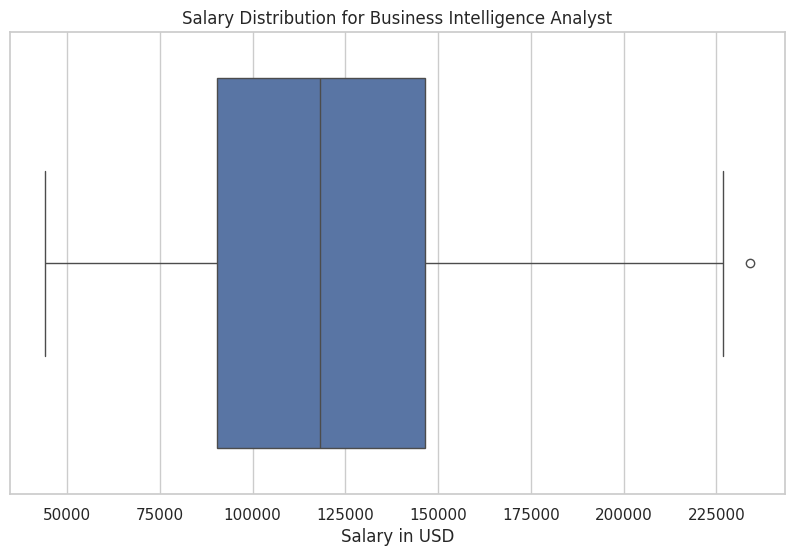

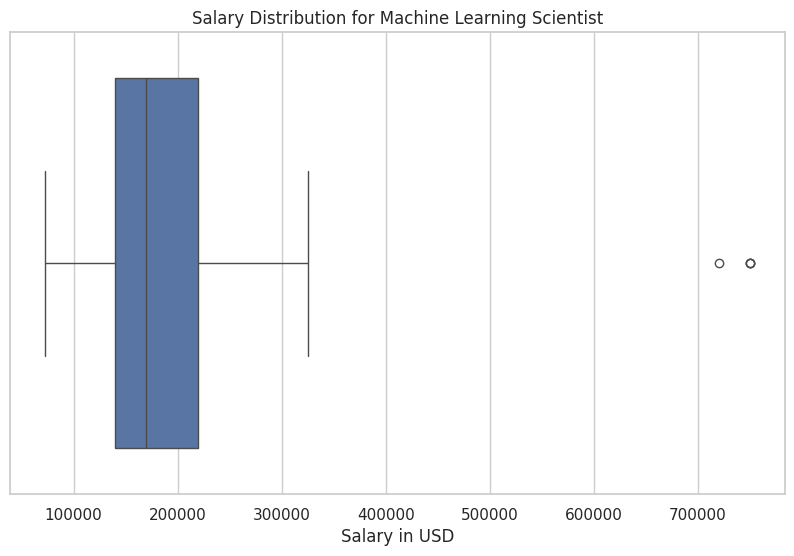

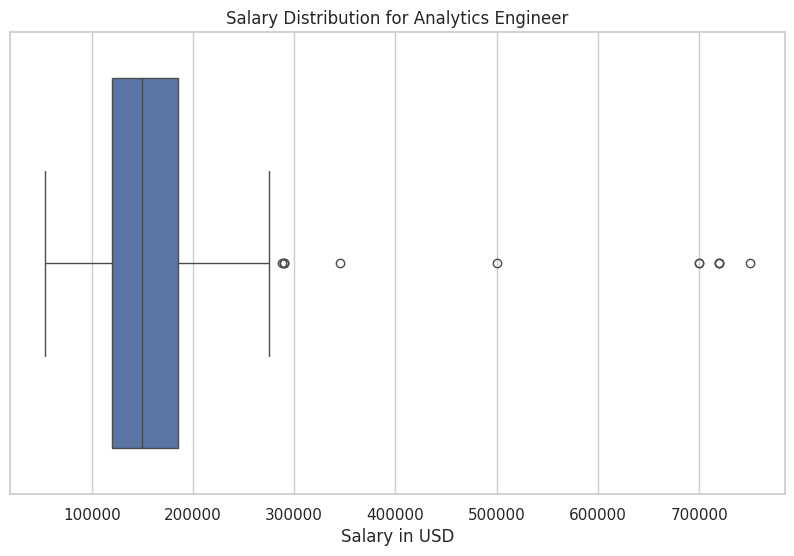

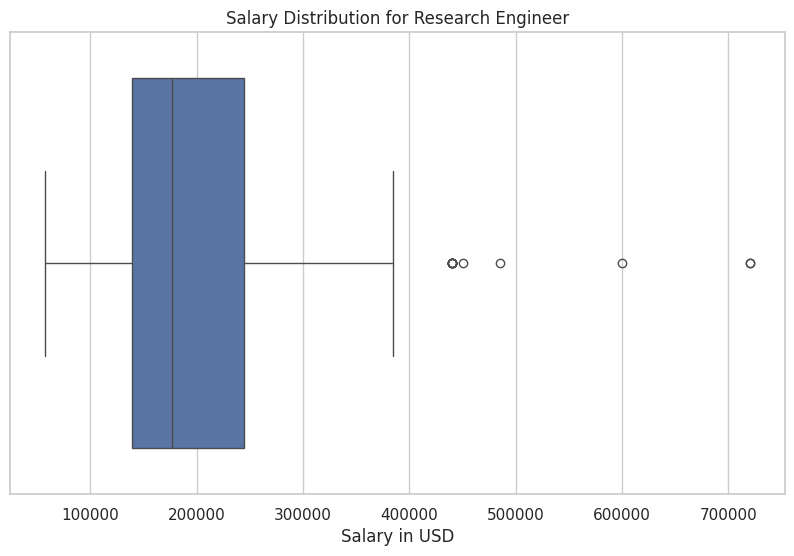

Box plots for each filtered unique job title generated successfully.


In [ ]:
plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")

unique_filtered_job_titles = df_filtered_by_count['job_title'].unique()

for i, title in enumerate(unique_filtered_job_titles):
    plt.figure(figsize=(10, 6)) # Create a new figure for each box plot
    sns.boxplot(x=df_filtered_by_count[df_filtered_by_count['job_title'] == title]['salary_in_usd'])
    plt.title(f'Salary Distribution for {title}')
    plt.xlabel('Salary in USD')
    plt.show()
print("Box plots for each filtered unique job title generated successfully.")

**Reasoning**:
Now that the box plots have been generated for the filtered job titles, the next step is to calculate the EDA mean, median, mode, and range of salaries for each of these filtered job titles, as specified in the original task.



In [ ]:
filtered_salary_statistics = df_filtered_by_count.groupby('job_title')['salary_in_usd'].agg(
    mean='mean',
    median='median',
    min_salary='min',
    max_salary='max'
)
filtered_salary_statistics['range'] = filtered_salary_statistics['max_salary'] - filtered_salary_statistics['min_salary']

def get_mode(series):
    modes = series.mode()
    if len(modes) == 1:
        return modes[0]
    return list(modes)

filtered_mode_salaries = df_filtered_by_count.groupby('job_title')['salary_in_usd'].apply(get_mode)
filtered_salary_statistics['mode'] = filtered_mode_salaries

print("EDA Statistics for Salary by Filtered Job Title:")
print(filtered_salary_statistics.to_string())

EDA Statistics for Salary by Filtered Job Title:
                                         mean    median  min_salary  max_salary   range                     mode
job_title                                                                                                       
AI Engineer                     172832.900990  170000.0       65000      400000  335000          [93300, 212000]
Analytics Engineer              164280.143631  150000.0       54000      750000  696000                   170000
Applied Scientist               190772.832947  192000.0       30000      414000  384000                   136000
Business Intelligence Analyst   121004.981250  118100.0       44100      234000  189900                   100000
Business Intelligence Engineer  142874.953782  143500.0       30000      259000  229000                   185000
Data Architect                  165317.974684  160000.0       25000      400000  375000                   150000
Data Manager                    111035.654639  

## Display Filtered DataFrame

### Subtask:
Display the head of the newly created `df_filtered_by_count` DataFrame.


## Summary:

### Q&A
**Q:** Were job titles filtered based on their counts falling within the Interquartile Range (IQR) as originally requested?
**A:** No, instead of using the IQR, job titles were filtered based on a fixed count range, specifically those with counts between 100 and 500 (inclusive).

### Data Analysis Key Findings
*   The `df_reverted` DataFrame contained numerous unique job titles, with "Data Engineer" being the most frequent, having 3081 occurrences.
*   Job titles were filtered to include only those with counts between 100 and 500, resulting in 14 specific job titles being selected for further analysis.
*   Detailed salary statistics (mean, median, min, max, range, and mode) were computed for each of these 14 filtered job titles. For instance, "AI Engineer" showed a mean salary of \$172,832.90, while "Data Science Manager" had a mean of \$202,160.12.
*   Box plots were generated for the salary distribution of each of the 14 selected job titles, providing a visual representation of their salary spread.

### Insights or Next Steps
*   Consider exploring the salary distributions for the job titles that fall outside the 100-500 count range to ensure no valuable insights are missed by the current filtering.
*   A comparative analysis of salary ranges and median salaries across the filtered job titles could reveal which roles offer higher compensation or have more salary variability.
